## 2 - Export Data Assessment (Blinks)

##### Imports

In [1]:
import os
import pandas as pd
import numpy as np
import scipy as su
# from typing import Dict
# from scipy.signal import
# from scikit-learn import

import matplotlib.pyplot as plt
import seaborn as sns

import dask.dataframe as dd

##### Data Loading

In [3]:
# Load ddfs into dictionary (exception for 'all_surf_pos', df)
root_dir = './aggregated_data'
def load_data(root_dir, exception=False):    # Get csv file reads into one dictionary
    data = {}
    for subdir, _, files in os.walk(root_dir):
        for file in files:
            file_path = os.path.join(subdir, file)
            file_name = os.path.splitext(file)[0]   #file name without '.csv'
            if file.endswith('.csv') and file != 'all_surf_positions_HiDrive_Studie2.csv':
                data[file_name] = dd.read_csv(file_path)    #read and attach to dict
            elif exception and file == 'all_surf_positions_HiDrive_Studie2.csv':
                data [file_name] = pd.read_csv(file_path, converters=converters)    #read as normal and attach to dict
    return data
def parse(filedata): # Manually read the column
    output = []
    for line in filedata.split('\n'): # split into lines
        line = line.strip().rstrip(']').lstrip('[') #remove whitespace and brackets
        if not line:
            continue    #skip empty lines
        line = line.split() #split into cell
        row = []
        for cell in line:
            cell = cell.strip()     #remove whitespace
            if not cell.strip():
                continue    #skip empty cells
            row.append(float(cell)) #convert to float and add
        output.append(row)
    return output
converters = {
    "img_to_surf_trans": parse,
    "surf_to_img_trans": parse,
    "dist_img_to_surf_trans": parse,
    "surf_to_dist_img_trans": parse,
}

data = load_data(root_dir)

In [4]:
participant_ids = [1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
ddf = data['all_blinks'].iloc[:, 1:]
df = ddf.compute()

### 1. Inspection
Head & Tail,  Basic statistics,  Missing values

##### Head & tail

In [ ]:
for pid in participant_ids:
    participant_ddf = ddf[ddf['participant_id'] == pid]
    display(f"Participant {pid}")
    display(participant_ddf.iloc[:, 1:].head())
    display(participant_ddf.iloc[:, 1:].tail())

'Participant 1'

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
0   1   -672839.469037  0.247916 -672839.221121                 93     96   
1   2   -672825.921111  0.264075 -672825.657036                484    487   
2   3   -672824.491118  0.569989 -672823.921129                526    534   
3   4   -672814.665124  0.243734 -672814.421390                803    806   
4   5   -672811.529058  0.204014 -672811.325044                884    887   

   end_frame_index  confidence  \
0              100    0.652110   
1              491    0.471345   
2              543    0.268321   
3              809    0.636428   
4              890    0.505138   

                                     filter_response  \
0  0.543644181950052 0.5880886263944963 0.6325330...   
1  0.5328988110790137 0.5773432555234581 0.621787...   
2  0.5450027240248031 0.5005582795803586 0.522338...   
3  0.5131102095020842 0.5575546539465286 0.601999...   
4  0.5051881264661553 0.4680740413746704 0.508370...   

                                           base_data  
0  -672839.469037 -672839.461 -672839.460985 -672...  
1  -672825.921111 -672825.9210890001 -672825.9131...  
2  -672824.491118 -672824.485088 -672824.484739 -...  
3  -672814.665124 -672814.665115 -672814.657122 -...  
4  -672811.529058 -672811.524979 -672811.521075 -...

id  start_timestamp  duration  end_timestamp  start_frame_index   index  \
459  460   -668819.280100  0.179958 -668819.100142             116366  116369   
460  461   -668814.952136  0.140044 -668814.812092             116496  116498   
461  462   -668809.136089  0.216100 -668808.919989             116669  116672   
462  463   -668805.872111  0.215939 -668805.656172             116767  116770   
463  464   -668803.308160  0.352037 -668802.956123             116843  116848   

     end_frame_index  confidence  \
459           116372    0.577538   
460           116500    0.422375   
461           116676    0.507249   
462           116773    0.617311   
463           116854    0.511837   

                                       filter_response  \
459  0.522088100971683 0.5665325454161274 0.6109769...   
460  0.5113076257598305 0.5256998207390227 0.526144...   
461  0.516457485981577 0.5609019304260214 0.6053463...   
462  0.5298857784800572 0.5431833185535779 0.587668...   
463  0.5130803822333021 0.5575248266777466 0.601969...   

                                             base_data  
459  -668819.2801 -668819.276149 -668819.272117 -66...  
460  -668814.952136 -668814.948079 -668814.944111 -...  
461  -668809.136089 -668809.132085 -668809.128078 -...  
462  -668805.872111 -668805.868137 -668805.864131 -...  
463  -668803.30816 -668803.304119 -668803.300136 -6...

'Participant 2'

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
464   1   -664547.198946  0.187961 -664547.010985                 63     65   
465   2   -664541.354579  0.239651 -664541.114928                237    240   
466   3   -664537.586966  0.160088 -664537.426878                349    351   
467   4   -664536.254902  0.236003 -664536.018899                389    392   
468   5   -664516.811005  0.179973 -664516.631032                959    961   

     end_frame_index  confidence  \
464               68    0.575699   
465              244    0.625405   
466              354    0.472100   
467              396    0.589142   
468              964    0.572099   

                                       filter_response  \
464  0.5064465863199228 0.5213903997697901 0.565834...   
465  0.5264158359103732 0.5293956551387073 0.573840...   
466  0.5354531088935004 0.5550609866248237 0.555505...   
467  0.5141512818336486 0.5279981543178813 0.572442...   
468  0.5025059223595139 0.5469503668039583 0.599517...   

                                             base_data  
464  -664547.198946 -664547.194948 -664547.190968 -...  
465  -664541.354579 -664541.34707 -664541.347038 -6...  
466  -664537.586966 -664537.579013 -664537.578995 -...  
467  -664536.254902 -664536.254894 -664536.247033 -...  
468  -664516.811005 -664516.807043 -664516.802613 -...

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
1064  601   -661557.710249  0.218323 -661557.491926              87892  87895   
1065  602   -661490.966275  0.155972 -661490.810303              89856  89858   
1066  603   -661490.736372  0.218090 -661490.518282              89863  89866   
1067  604   -661489.750231  0.191991 -661489.558240              89892  89895   
1068  605   -661487.772437  0.994235 -661486.778202              89951  89966   

      end_frame_index  confidence  \
1064            87898    0.491398   
1065            89861    0.502990   
1066            89869    0.660636   
1067            89898    0.543530   
1068            89981    0.208489   

                                        filter_response  \
1064  0.5342786728815327 0.5787231173259775 0.623167...   
1065  0.5364219475322302 0.5841449255943298 0.584589...   
1066  0.5366292460980774 0.5777639246804416 0.607347...   
1067  0.5252414624105195 0.525685906854964 0.5721458...   
1068  0.5072654738377278 0.5283609396037867 0.532555...   

                                              base_data  
1064  -661557.710249 -661557.702285 -661557.702268 -...  
1065  -661490.966275 -661490.962302 -661490.958259 -...  
1066  -661490.7363720001 -661490.733036 -661490.7302...  
1067  -661489.750231 -661489.746227 -661489.741104 -...  
1068  -661487.7724370001 -661487.770094 -661487.7662...

'Participant 4'

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
1069   1   -587756.760102  0.216030 -587756.544072                133    136   
1070   2   -587754.260114  0.564088 -587753.696026                202    209   
1071   3   -587753.515315  0.175367 -587753.339948                221    223   
1072   4   -587742.431994  0.191547 -587742.240447                507    509   
1073   5   -587734.319439  0.183389 -587734.136050                721    723   

      end_frame_index  confidence  \
1069              139    0.542385   
1070              217    0.244649   
1071              226    0.551036   
1072              512    0.519884   
1073              726    0.472839   

                                        filter_response  \
1069  0.5062041316551754 0.542995521532221 0.5720023...   
1070  0.5206475666796275 0.5363042682929829 0.581527...   
1071  0.5219676484303413 0.5667804623834583 0.606977...   
1072  0.5127416513145269 0.5219992052696121 0.559037...   
1073  0.5028485162470678 0.550776691135714 0.5736874...   

                                              base_data  
1069  -587756.760102 -587756.759003 -587756.752 -587...  
1070  -587754.2601140001 -587754.260101 -587754.2516...  
1071  -587753.515315 -587753.508061 -587753.50793 -5...  
1072  -587742.431994 -587742.427912 -587742.423012 -...  
1073  -587734.319439 -587734.312055 -587734.311902 -...

id  start_timestamp  duration  end_timestamp  start_frame_index  \
2129  1061   -584630.423564  0.155380 -584630.268184              80773   
2130  1062   -584628.599483  0.168081 -584628.431402              80825   
2131  1063   -584626.767599  0.184271 -584626.583328              80876   
2132  1064   -584623.543593  0.164072 -584623.379521              80965   
2133  1065   -584621.475436  0.198828 -584621.276608              81024   

      index  end_frame_index  confidence  \
2129  80775            80777    0.451664   
2130  80827            80830    0.500763   
2131  80879            80882    0.556720   
2132  80967            80970    0.370692   
2133  81027            81031    0.524615   

                                        filter_response  \
2129  0.5246588076579645 0.5679530718685596 0.614249...   
2130  0.5140126344003487 0.5453062650003243 0.560292...   
2131  0.5086532039574634 0.5549495002537598 0.603105...   
2132  0.5161081682073224 0.5314462924206589 0.580612...   
2133  0.5121881118733874 0.5361800390437295 0.551281...   

                                              base_data  
2129  -584630.423564 -584630.4235190001 -584630.4155...  
2130  -584628.599483 -584628.599479 -584628.59157300...  
2131  -584626.767599 -584626.7675750001 -584626.7595...  
2132  -584623.543593 -584623.5394 -584623.535531 -58...  
2133  -584621.475436 -584621.471437 -584621.467557 -...

'Participant 5'

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
2134   1   -578911.050596  0.145201 -578910.905395                 55     56   
2135   2   -578910.138557  0.236091 -578909.902466                 80     83   
2136   3   -578907.982499  0.224008 -578907.758491                141    143   
2137   4   -578906.482529  0.160062 -578906.322467                183    185   
2138   5   -578904.118442  0.167948 -578903.950494                249    251   

      end_frame_index  confidence  \
2134               58    0.404354   
2135               86    0.683936   
2136              146    0.610903   
2137              188    0.472188   
2138              253    0.562789   

                                        filter_response  \
2134  0.5127799538096184 0.5234710935949843 0.538963...   
2135  0.524319769276513 0.5687642137209574 0.6132086...   
2136  0.5094254389018924 0.5554895349288428 0.599933...   
2137  0.5299897268326305 0.5394219052161006 0.540310...   
2138  0.5152902141280528 0.5597346585724973 0.604179...   

                                              base_data  
2134  -578911.050596 -578911.0425880001 -578911.0425...  
2135  -578910.138557 -578910.138551 -578910.130549 -...  
2136  -578907.982499 -578907.974532 -578907.974478 -...  
2137  -578906.482529 -578906.482501 -578906.474482 -...  
2138  -578904.118442 -578904.118402 -578904.110581 -...

id  start_timestamp  duration  end_timestamp  start_frame_index  \
3195  1062   -575212.637863  2.204032 -575210.433831             100615   
3196  1063   -575209.773643  0.225649 -575209.547994             100696   
3197  1064   -575208.449886  0.243930 -575208.205956             100733   
3198  1065   -575205.601914  0.195974 -575205.405940             100813   
3199  1066   -575204.609880  0.222998 -575204.386882             100842   

       index  end_frame_index  confidence  \
3195  100646           100677    0.162121   
3196  100699           100702    0.574219   
3197  100736           100739    0.621675   
3198  100816           100819    0.631329   
3199  100845           100848    0.617805   

                                        filter_response  \
3195  0.5004339722896756 0.5408714428317355 0.590039...   
3196  0.5411518951389208 0.5831422680086242 0.627586...   
3197  0.5177489641831792 0.5621934086276235 0.606637...   
3198  0.5341256002401156 0.5785700446845599 0.623014...   
3199  0.5203671429136381 0.5634952465937191 0.610863...   

                                              base_data  
3195  -575212.637863 -575212.6298390001 -575212.6298...  
3196  -575209.773643 -575209.773642 -575209.765913 -...  
3197  -575208.449886 -575208.441946 -575208.441926 -...  
3198  -575205.601914 -575205.60188 -575205.593929 -5...  
3199  -575204.60988 -575204.60984 -575204.601879 -57...

'Participant 6'

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
3200   1     82163.163262  0.164080   82163.327342                 28     30   
3201   2     82165.863244  0.151968   82166.015212                109    111   
3202   3     82166.807246  0.207938   82167.015184                137    140   
3203   4     82187.295269  0.184120   82187.479389                748    751   
3204   5     82189.479297  0.252050   82189.731347                813    817   

      end_frame_index  confidence  \
3200               33    0.439474   
3201              113    0.466154   
3202              143    0.628802   
3203              754    0.560867   
3204              821    0.686329   

                                        filter_response  \
3200  0.5139234077064364 0.4346269073288266 0.457357...   
3201  0.5422641439452335 0.5607650411270516 0.605209...   
3202  0.5265272463031749 0.5709716907476196 0.615416...   
3203  0.5007060338251956 0.5451504782696399 0.589594...   
3204  0.5072545966991967 0.5508101522547523 0.594496...   

                                              base_data  
3200  82163.163262 82163.167284 82163.171269 82163.1...  
3201  82165.86324400001 82165.86725 82165.871335 821...  
3202  82166.807246 82166.811223 82166.815246 82166.8...  
3203  82187.295269 82187.29930500001 82187.303276 82...  
3204  82189.479297 82189.479306 82189.487279 82189.4...

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
3498  299     85406.649316  0.179955   85406.829271              96515  96517   
3499  300     85408.337803  0.211575   85408.549378              96565  96568   
3500  301     85411.089275  0.200046   85411.289321              96647  96650   
3501  302     85412.442405  0.455053   85412.897458              96688  96694   
3502  303     85414.737331  0.189626   85414.926957              96756  96759   

      end_frame_index  confidence  \
3498            96520    0.471998   
3499            96571    0.658600   
3500            96653    0.551934   
3501            96701    0.229893   
3502            96762    0.508428   

                                        filter_response  \
3498  0.5192798555196081 0.5360201944621492 0.579575...   
3499  0.5175669010302483 0.5620113454746928 0.606455...   
3500  0.5042854001757675 0.5487298446202119 0.555519...   
3501  0.5281806476718013 0.5726250921162457 0.592468...   
3502  0.5080088659550324 0.551564421510588 0.5951199...   

                                              base_data  
3498  85406.649316 85406.649319 85406.65747 85406.66...  
3499  85408.337803 85408.338208 85408.345314 85408.3...  
3500  85411.089275 85411.097315 85411.097341 85411.1...  
3501  85412.442405 85412.442407 85412.447206 85412.4...  
3502  85414.737331 85414.737355 85414.745397 85414.7...

'Participant 7'

id  start_timestamp   duration  end_timestamp  start_frame_index  index  \
3503   1    349980.843234   1.008064  349981.851298                  1      7   
3504   2    349989.583320   7.799947  349997.383267                244    359   
3505   3    349999.959220   1.760140  350001.719360                551    577   
3506   4    350002.595234   3.728820  350006.324054                630    685   
3507   5    350010.311182  18.464072  350028.775254                860   1135   

      end_frame_index  confidence  \
3503               13    0.126151   
3504              474    0.107225   
3505              604    0.158590   
3506              741    0.097571   
3507             1411    0.037017   

                                        filter_response  \
3503  0.5363516605165269 0.5799072160720825 0.580224...   
3504  0.5039686407215843 0.5345654347440385 0.574688...   
3505  0.5361591226527311 0.46159698754618883 0.50515...   
3506  0.5065487794876099 0.5070047594706217 0.550560...   
3507  0.5445044717173103 0.5413159887009156 0.547799...   

                                              base_data  
3503  349980.84323399997 349980.851251 349980.851251...  
3504  349989.58332 349989.58332 349989.587724 349989...  
3505  349999.95921999996 349999.959234 349999.967299...  
3506  350002.595234 350002.599252 350002.603252 3500...  
3507  350010.311182 350010.319195 350010.319217 3500...

id  start_timestamp   duration  end_timestamp  start_frame_index  \
3723  221    353056.226270  58.051376  353114.277646              91704   
3724  222    353161.358156   0.164078  353161.522234              94841   
3725  223    353161.770186   0.984041  353162.754227              94853   
3726  224    353163.366189   1.743974  353165.110163              94901   
3727  225    353165.610231   0.942687  353166.552918              94968   

      index  end_frame_index  confidence  \
3723  92570            93436    0.022515   
3724  94843            94846    0.426570   
3725  94868            94883    0.294258   
3726  94927            94953    0.147574   
3727  94982            94996    0.208448   

                                        filter_response  \
3723  0.5250196746927122 0.534366244601702 0.5761951...   
3724  0.5365366970001157 0.5813536386852626 0.586927...   
3725  0.5079129402604289 0.5529564882086304 0.559969...   
3726  0.5257395315052014 0.5701839759496456 0.616950...   
3727  0.5091865828974212 0.5455920084989565 0.576485...   

                                              base_data  
3723  353056.22627 353056.234219 353056.23425599997 ...  
3724  353161.358156 353161.358174 353161.366185 3531...  
3725  353161.770186 353161.778253 353161.778289 3531...  
3726  353163.36618899996 353163.37020899996 353163.3...  
3727  353165.610231 353165.610232 353165.618202 3531...

'Participant 8'

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
3728   1      4132.742644  0.211981    4132.954625                 11     14   
3729   2      4136.730641  3.995975    4140.726616                130    189   
3730   3      4148.390692  0.183947    4148.574639                478    480   
3731   4      4149.414706  0.267974    4149.682680                508    512   
3732   5      4163.614708  0.235974    4163.850682                932    935   

      end_frame_index  confidence  \
3728               17    0.524407   
3729              249    0.081340   
3730              483    0.359245   
3731              516    0.391593   
3732              939    0.595389   

                                        filter_response  \
3728  0.5251813820816087 0.5316436213351768 0.562122...   
3729  0.5349847762381258 0.5703280238901796 0.580863...   
3730  0.5259001619192402 0.5404060674944624 0.560499...   
3731  0.5200616186340503 0.5497864231943936 0.594880...   
3732  0.5348762278347632 0.5793206722792076 0.623765...   

                                              base_data  
3728  4132.742644 4132.746620999999 4132.750617 4132...  
3729  4136.730641 4136.738552999999 4136.738576 4136...  
3730  4148.390692 4148.3986079999995 4148.3986179999...  
3731  4149.414706 4149.414729 4149.422669 4149.42266...  
3732  4163.614708 4163.6187279999995 4163.622679 416...

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
4091  364      7335.961937  0.196011    7336.157948              95571  95573   
4092  365      7337.565937  0.164167    7337.730104              95618  95620   
4093  366      7338.105994  0.144036    7338.250030              95635  95637   
4094  367      7338.569952  2.656260    7341.226212              95648  95688   
4095  368      7341.994195  0.227937    7342.222132              95751  95754   

      end_frame_index  confidence  \
4091            95576    0.310336   
4092            95623    0.489662   
4093            95639    0.327737   
4094            95728    0.147615   
4095            95757    0.608887   

                                        filter_response  \
4091  0.5030905175404357 0.4580023434264151 0.445129...   
4092  0.5396988619720909 0.5816908322462745 0.626135...   
4093  0.5026893211171739 0.4582448766727294 0.458244...   
4094  0.5342806481627024 0.5363452780353423 0.579900...   
4095  0.5086161546769233 0.5530605991213677 0.596014...   

                                              base_data  
4091  7335.961937 7335.966033 7335.970082999999 7335...  
4092  7337.565936999999 7337.569966999999 7337.57397...  
4093  7338.105994 7338.110006999999 7338.11395 7338....  
4094  7338.569952 7338.573936 7338.578001999999 7338...  
4095  7341.994194999999 7341.994828999999 7342.00264...

'Participant 9'

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
4096   1     22199.204487  0.154457   22199.358944                 72     74   
4097   2     22200.087019  0.171919   22200.258938                 98    100   
4098   3     22201.150910  0.188030   22201.338940                130    132   
4099   4     22202.691019  0.147952   22202.838971                176    178   
4100   5     22204.551609  0.131385   22204.682994                231    233   

      end_frame_index  confidence  \
4096               76    0.479602   
4097              103    0.498633   
4098              135    0.584410   
4099              180    0.413926   
4100              235    0.400028   

                                        filter_response  \
4096  0.5038180163403094 0.5180346829437962 0.537262...   
4097  0.515183848511799 0.5596282929562435 0.5813936...   
4098  0.5147316332852941 0.5469756798144282 0.548402...   
4099  0.5131564056941788 0.5198469214880794 0.520291...   
4100  0.5425809479788684 0.5495091542175344 0.549953...   

                                              base_data  
4096  22199.204487 22199.204653 22199.210942 22199.2...  
4097  22200.087019000002 22200.090943 22200.094903 2...  
4098  22201.15091 22201.15491 22201.158929 22201.162...  
4099  22202.691019 22202.694976 22202.698959 22202.7...  
4100  22204.551609000002 22204.556198000002 22204.55...

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
4602  507     25440.370272  0.176005   25440.546277              96739  96741   
4603  508     25442.046276  0.203953   25442.250229              96789  96792   
4604  509     25444.146342  0.183906   25444.330248              96852  96854   
4605  510     25445.082306  0.215953   25445.298259              96880  96883   
4606  511     25446.662332  0.193055   25446.855387              96927  96930   

      end_frame_index  confidence  \
4602            96744    0.491830   
4603            96795    0.541718   
4604            96857    0.529928   
4605            96886    0.629763   
4606            96933    0.549266   

                                        filter_response  \
4602  0.5192128533158437 0.5416353827950549 0.586079...   
4603  0.5174512015073786 0.561895645951823 0.6063400...   
4604  0.5131974130893057 0.55764185753375 0.59797023...   
4605  0.5087774979675685 0.5532219424120132 0.597666...   
4606  0.509548450157705 0.5298900385100732 0.5743344...   

                                              base_data  
4602  25440.370272 25440.370314 25440.378419 25440.3...  
4603  25442.046276 25442.046289 25442.056105 25442.0...  
4604  25444.146342 25444.146343 25444.155461000002 2...  
4605  25445.082306 25445.090632 25445.090648 25445.0...  
4606  25446.662332 25446.662349000002 25446.670321 2...

'Participant 10'

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
4607   1      5424.614556  0.203973    5424.818529                 35     38   
4608   2      5432.562810  0.195738    5432.758548                272    275   
4609   3      5440.286549  0.229261    5440.515810                502    505   
4610   4      5443.522614  0.161601    5443.684215                599    601   
4611   5      5450.178541  0.348051    5450.526592                797    802   

      end_frame_index  confidence  \
4607               41    0.466704   
4608              278    0.554211   
4609              509    0.579770   
4610              604    0.477806   
4611              808    0.501598   

                                        filter_response  \
4607  0.5070894708948406 0.5598262724661568 0.566284...   
4608  0.5081211222836557 0.5287020796341841 0.573146...   
4609  0.5394096586439345 0.583854103088379 0.5944714...   
4610  0.5069869038679146 0.5481219664035185 0.595159...   
4611  0.5018453405614538 0.513127175028375 0.5256420...   

                                              base_data  
4607  5424.6145559999995 5424.6149479999995 5424.622...  
4608  5432.562809999999 5432.570565 5432.570573 5432...  
4609  5440.2865489999995 5440.286599 5440.294567 544...  
4610  5443.5226139999995 5443.530596 5443.530624 544...  
4611  5450.178540999999 5450.178556 5450.18653899999...

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
5105  499      8694.645622  0.208355    8694.853977              97553  97556   
5106  500      8702.261602  0.199990    8702.461592              97780  97783   
5107  501      8709.825651  0.163926    8709.989577              98002  98004   
5108  502      8712.925582  0.240247    8713.165829              98095  98098   
5109  503      8716.561613  0.167965    8716.729578              98203  98205   

      end_frame_index  confidence  \
5105            97559    0.512214   
5106            97786    0.497190   
5107            98007    0.463527   
5108            98102    0.372893   
5109            98208    0.511922   

                                        filter_response  \
5105  0.5217290331513433 0.5661734775957877 0.610617...   
5106  0.5044273517457826 0.5488717961902272 0.560195...   
5107  0.5339653447723919 0.5784097892168364 0.578854...   
5108  0.5305328038768705 0.5749772483213149 0.619421...   
5109  0.5171053521839823 0.5469265891122863 0.591371...   

                                              base_data  
5105  8694.645622 8694.649631 8694.653585 8694.65756...  
5106  8702.261602 8702.26574 8702.269597 8702.273628...  
5107  8709.825651000001 8709.829629 8709.83361400000...  
5108  8712.925582 8712.933581000001 8712.933583 8712...  
5109  8716.561613 8716.565804 8716.569622 8716.57450...

'Participant 11'

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
5110   1     16542.307377  0.183900   16542.491277                 14     16   
5111   2     16544.047369  0.132022   16544.179391                 66     67   
5112   3     16548.455258  0.148036   16548.603294                197    199   
5113   4     16551.319282  0.176028   16551.495310                283    285   
5114   5     16559.703266  0.176061   16559.879327                533    535   

      end_frame_index  confidence  \
5110               19    0.575075   
5111               69    0.393704   
5112              202    0.443245   
5113              288    0.542491   
5114              538    0.551471   

                                        filter_response  \
5110  0.5156534406448174 0.5600978850892618 0.604542...   
5111  0.5151145574567557 0.5165243159186019 0.526635...   
5112  0.5390513392429036 0.5431851515144341 0.543629...   
5113  0.5143085756013215 0.5533998553729144 0.597844...   
5114  0.500400917025111 0.5448453614695553 0.5832866...   

                                              base_data  
5110  16542.307377 16542.311323 16542.315311000002 1...  
5111  16544.047369 16544.051322 16544.055323 16544.0...  
5112  16548.455258 16548.455267 16548.463293 16548.4...  
5113  16551.319282 16551.323356 16551.327416 16551.3...  
5114  16559.703266 16559.70328 16559.711282 16559.71...

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
5405  296     19776.614303  0.252016   19776.866319              96474  96478   
5406  297     19777.606340  0.239994   19777.846334              96504  96507   
5407  298     19778.518403  0.247928   19778.766331              96531  96534   
5408  299     19779.810356  0.231969   19780.042325              96569  96572   
5409  300     19780.610314  0.152077   19780.762391              96593  96595   

      end_frame_index  confidence  \
5405            96482    0.557799   
5406            96511    0.622061   
5407            96538    0.529028   
5408            96576    0.628284   
5409            96598    0.432368   

                                        filter_response  \
5405  0.5347287991753215 0.5791732436197659 0.620344...   
5406  0.5380146015504601 0.578873845155332 0.6228305...   
5407  0.5023609889966744 0.546878612050331 0.5766663...   
5408  0.5169944865580709 0.549441366368828 0.5747864...   
5409  0.5401970183076429 0.5846414627520873 0.584197...   

                                              base_data  
5405  19776.614303000002 19776.622326 19776.62234100...  
5406  19777.606340000002 19777.614335000002 19777.61...  
5407  19778.518403000002 19778.518404000002 19778.52...  
5408  19779.810356 19779.818388 19779.818392 19779.8...  
5409  19780.610314 19780.614361 19780.61833 19780.62...

'Participant 12'

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
5410   1     84204.358478  0.267888   84204.626366                  1      1   
5411   2     84206.562472  0.247912   84206.810384                 55     59   
5412   3     84209.742460  0.216103   84209.958563                150    153   
5413   4     84217.278413  0.264996   84217.543409                373    377   
5414   5     84220.890419  0.220030   84221.110449                481    484   

      end_frame_index  confidence  \
5410                2    0.535705   
5411               63    0.402578   
5412              157    0.495896   
5413              381    0.564032   
5414              487    0.596556   

                                        filter_response  \
5410  0.5421605336068543 0.5940975176690491 0.631533...   
5411  0.5236485610515748 0.5680930054960192 0.588288...   
5412  0.5248879807790121 0.5693324252234565 0.613776...   
5413  0.5321952762677151 0.5766397207121595 0.590135...   
5414  0.5200656975699984 0.5676071066386359 0.612051...   

                                              base_data  
5410  84204.358478 84204.366379 84204.36645 84204.37...  
5411  84206.562472 84206.570366 84206.570385 84206.5...  
5412  84209.74246 84209.746485 84209.750446 84209.75...  
5413  84217.27841300001 84217.286477 84217.286479 84...  
5414  84220.890419 84220.894445 84220.89842 84220.90...

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
5854  445     87435.744002  0.203932   87435.947934              96382  96385   
5855  446     87437.791979  0.300058   87438.092037              96443  96447   
5856  447     87438.664210  0.267775   87438.931985              96469  96472   
5857  448     87439.599985  0.235958   87439.835943              96495  96498   
5858  449     87440.824018  0.227949   87441.051967              96531  96534   

      end_frame_index  confidence  \
5854            96388    0.528784   
5855            96452    0.576702   
5856            96475    0.557157   
5857            96502    0.663593   
5858            96538    0.487997   

                                        filter_response  \
5854  0.5330681800602033 0.5588522381012462 0.614170...   
5855  0.5117009829415217 0.5532457011540731 0.600512...   
5856  0.5193842732855556 0.56382871773 0.58413449167...   
5857  0.5210296137890972 0.5638355556887144 0.608280...   
5858  0.5144900334985629 0.5589344779430073 0.603378...   

                                              base_data  
5854  87435.744002 87435.748005 87435.752031 87435.7...  
5855  87437.791979 87437.795996 87437.799978 87437.8...  
5856  87438.66421 87438.668089 87438.67204800001 874...  
5857  87439.599985 87439.604049 87439.607956 87439.6...  
5858  87440.824018 87440.827934 87440.83203 87440.83...

'Participant 13'

id  start_timestamp   duration  end_timestamp  start_frame_index  index  \
5859   1     93633.910867   0.132018   93634.042885                206    208   
5860   2     93638.494841   0.216028   93638.710869                343    346   
5861   3     93639.811004  63.295901   93703.106905                382   1326   
5862   4     93790.606946   0.212048   93790.818994               4882   4885   
5863   5     93845.927025   0.099895   93846.026920               6533   6534   

      end_frame_index  confidence  \
5859              210    0.399235   
5860              349    0.643383   
5861             2271    0.004867   
5862             4889    0.535888   
5863             6536    0.249032   

                                        filter_response  \
5859  0.5397313241428797 0.5397313241428796 0.564886...   
5860  0.5330281535397666 0.5774824155314795 0.623918...   
5861  0.5214009083145089 0.5116657902962527 0.527453...   
5862  0.5163917452206953 0.5599473007762509 0.603502...   
5863  0.5185865716538103 0.42969768276492143 0.43014...   

                                              base_data  
5859  93633.910867 93633.914836 93633.918854 93633.9...  
5860  93638.494841 93638.498846 93638.50289 93638.50...  
5861  93639.811004 93639.814944 93639.818886 93639.8...  
5862  93790.606946 93790.610946 93790.616267 93790.6...  
5863  93845.927025 93845.931033 93845.935005 93845.9...

id  start_timestamp  duration  end_timestamp  start_frame_index  \
6172  314     97183.264571  0.207981   97183.472552             106067   
6173  315     97184.272540  0.199989   97184.472529             106097   
6174  316     97292.734535  0.106141   97292.840676             109334   
6175  317     97293.576577  0.368018   97293.944595             109359   
6176  318     97296.432618  0.159953   97296.592571             109444   

       index  end_frame_index  confidence  \
6172  106070           106073    0.609521   
6173  106100           106103    0.603326   
6174  109335           109337    0.356032   
6175  109364           109370    0.343674   
6176  109446           109449    0.481275   

                                        filter_response  \
6172  0.512260965073073 0.5567054095175173 0.6002609...   
6173  0.503950112643678 0.5489036708237454 0.5933481...   
6174  0.5046259175495047 0.5169606475918561 0.516099...   
6175  0.5323142870144209 0.5483700408645074 0.592814...   
6176  0.5185239112695914 0.5700685336093381 0.591939...   

                                              base_data  
6172  97183.264571 97183.272541 97183.272547 97183.2...  
6173  97184.27254 97184.280586 97184.280587 97184.28...  
6174  97292.734535 97292.736858 97292.739779 97292.7...  
6175  97293.576577 97293.576599 97293.584593 97293.5...  
6176  97296.432618 97296.432626 97296.440608 97296.4...

'Participant 14'

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
6177   1     99788.837857  0.195982   99789.033839                121    124   
6178   2     99789.750208  0.207570   99789.957778                149    152   
6179   3     99794.813831  0.175992   99794.989823                300    302   
6180   4     99798.217801  0.215979   99798.433780                401    404   
6181   5     99798.905803  0.200048   99799.105851                422    425   

      end_frame_index  confidence  \
6177              127    0.518833   
6178              155    0.664771   
6179              305    0.559529   
6180              408    0.581780   
6181              428    0.598812   

                                        filter_response  \
6177  0.5032094451666362 0.5476538896110809 0.592098...   
6178  0.5165217877234045 0.5609662321678489 0.605410...   
6179  0.527456149163946 0.5769340707558106 0.6213785...   
6180  0.5388639238352854 0.5667314079279977 0.612091...   
6181  0.5232200168276129 0.5712032049269443 0.601023...   

                                              base_data  
6177  99788.837857 99788.841865 99788.845865 99788.8...  
6178  99789.750208 99789.750419 99789.757808 99789.7...  
6179  99794.813831 99794.813831 99794.818048 99794.8...  
6180  99798.217801 99798.221825 99798.225857 99798.2...  
6181  99798.905803 99798.9098 99798.913797 99798.917...

id  start_timestamp  duration  end_timestamp  start_frame_index  \
6565  389    103062.239363  0.176035  103062.415398              97727   
6566  390    103064.579332  0.192033  103064.771365              97796   
6567  391    103235.295493  0.164011  103235.459504             102888   
6568  392    103236.250044  0.669407  103236.919451             102916   
6569  393    103241.551547  0.191888  103241.743435             103074   

       index  end_frame_index  confidence  \
6565   97729            97732    0.545131   
6566   97799            97802    0.553878   
6567  102890           102893    0.464800   
6568  102926           102936    0.340384   
6569  103077           103080    0.503595   

                                        filter_response  \
6565  0.5211133586035834 0.5655578030480279 0.590754...   
6566  0.5441024433349997 0.5885468877794441 0.632991...   
6567  0.5348354887970791 0.5792799332415235 0.584677...   
6568  0.5275153810397651 0.5710709365953206 0.613864...   
6569  0.5376470403710296 0.5593522400628722 0.603796...   

                                              base_data  
6565  103062.239363 103062.239376 103062.24741 10306...  
6566  103064.579332 103064.579345 103064.587362 1030...  
6567  103235.295493 103235.303434 103235.303465 1032...  
6568  103236.250044 103236.255492 103236.25554 10323...  
6569  103241.551547 103241.559439 103241.559461 1032...

'Participant 15'

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
6570   1      3162.896335  0.288027    3163.184362                405    409   
6571   2      3165.192379  0.188654    3165.381033                473    476   
6572   3      3168.156363  4.020034    3172.176397                562    622   
6573   4      3175.332428  6.860013    3182.192441                776    878   
6574   5      3185.404457  0.227944    3185.632401               1077   1080   

      end_frame_index  confidence  \
6570              414    0.495665   
6571              479    0.465219   
6572              682    0.122201   
6573              981    0.097033   
6574             1083    0.503347   

                                        filter_response  \
6570  0.5032647472965202 0.5224695641540039 0.538597...   
6571  0.5380081367234134 0.5885381862593767 0.650264...   
6572  0.515992651396249 0.5604370958406933 0.6048815...   
6573  0.518884969398808 0.5385683825864707 0.4534103...   
6574  0.533358963147988 0.4889145187035435 0.5422109...   

                                              base_data  
6570  3162.896335 3162.8963400000002 3162.904359 316...  
6571  3165.192379 3165.196375 3165.200439 3165.20441...  
6572  3168.156363 3168.160353 3168.1643710000003 316...  
6573  3175.332428 3175.336435 3175.3404170000003 317...  
6574  3185.404457 3185.408425 3185.414068 3185.41648...

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
7174  605      6427.694033  0.268024    6427.962057              97775  97779   
7175  606      6435.654206  0.157187    6435.811393              98013  98015   
7176  607      6437.870086  0.156040    6438.026126              98079  98081   
7177  608      6440.146064  0.128005    6440.274069              98147  98149   
7178  609      6442.162042  0.648040    6442.810082              98207  98216   

      end_frame_index  confidence  \
7174            97783    0.511255   
7175            98018    0.457984   
7176            98084    0.493581   
7177            98151    0.387173   
7178            98226    0.283417   

                                        filter_response  \
7174  0.5178797225045405 0.5645618895577632 0.608254...   
7175  0.542313724208388 0.5867581686528325 0.6062176...   
7176  0.5117389878269536 0.556183432271398 0.6042816...   
7177  0.5378246762780517 0.5858030236325168 0.629358...   
7178  0.5407296469097735 0.5277174447528591 0.573975...   

                                              base_data  
7174  6427.694033 6427.6940509999995 6427.702052 642...  
7175  6435.654205999999 6435.6580779999995 6435.6620...  
7176  6437.870086 6437.878057 6437.878078 6437.88608...  
7177  6440.146064 6440.146081 6440.154039 6440.15407...  
7178  6442.162042 6442.170029999999 6442.170048 6442...

'Participant 16'

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
7179   1     87736.230065  0.244030   87736.474095                289    292   
7180   2     87746.882127  0.207946   87747.090073                607    610   
7181   3     87748.334113  0.308970   87748.643083                650    655   
7182   4     87755.958076  0.396006   87756.354082                878    884   
7183   5     87828.394167  0.187932   87828.582099               3039   3042   

      end_frame_index  confidence  \
7179              296    0.627135   
7180              613    0.507227   
7181              660    0.374408   
7182              890    0.493121   
7183             3045    0.544412   

                                        filter_response  \
7179  0.5177963367038304 0.5723132429122925 0.604883...   
7180  0.5475540545969741 0.551246451078806 0.5183352...   
7181  0.5086483986549442 0.5300012248793772 0.574445...   
7182  0.5171402010028912 0.5615846454473354 0.606029...   
7183  0.5041836091483834 0.5486280535928278 0.593072...   

                                              base_data  
7179  87736.230065 87736.230089 87736.238075 87736.2...  
7180  87746.882127 87746.882875 87746.890108 87746.8...  
7181  87748.334113 87748.342071 87748.34209 87748.35...  
7182  87755.958076 87755.95809 87755.966042 87755.96...  
7183  87828.394167 87828.402121 87828.402145 87828.4...

id  start_timestamp  duration  end_timestamp  start_frame_index  \
7445  267     91231.770604  0.192096   91231.962700             104567   
7446  268     91256.186537  0.212008   91256.398545             105277   
7447  269     91335.774537  0.208039   91335.982576             107651   
7448  270     91404.546521  0.208111   91404.754632             109703   
7449  271     91469.478548  0.223997   91469.702545             111641   

       index  end_frame_index  confidence  \
7445  104570           104573    0.534085   
7446  105280           105283    0.572146   
7447  107654           107657    0.619911   
7448  109706           109709    0.691656   
7449  111644           111647    0.702495   

                                        filter_response  \
7445  0.5441162950247563 0.5617916719125904 0.606236...   
7446  0.5301011866533794 0.5745456310978239 0.618990...   
7447  0.5380859611316028 0.5825304055760472 0.626974...   
7448  0.5343481814066569 0.5787926258511013 0.623237...   
7449  0.5217155143597006 0.5661599588041453 0.610604...   

                                              base_data  
7445  91231.770604 91231.778535 91231.778545 91231.7...  
7446  91256.186537 91256.190526 91256.194644 91256.1...  
7447  91335.774537 91335.77863 91335.78258300001 913...  
7448  91404.546521 91404.54654 91404.554513 91404.55...  
7449  91469.478548 91469.482612 91469.486588 91469.4...

'Participant 17'

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
7450   1      2667.230961  0.219971    2667.450932                191    194   
7451   2      2670.498890  0.244029    2670.742919                278    281   
7452   3      2673.106900  0.256007    2673.362907                356    359   
7453   4      2674.274998  0.255937    2674.530935                390    394   
7454   5      2677.278915  0.200036    2677.478951                480    483   

      end_frame_index  confidence  \
7450              198    0.547607   
7451              285    0.617048   
7452              363    0.645345   
7453              398    0.673772   
7454              486    0.547982   

                                        filter_response  \
7450  0.5123563740320026 0.5083950778974364 0.565276...   
7451  0.5219596960077267 0.5664041404521712 0.610848...   
7452  0.5433156026337608 0.5877600470782053 0.632456...   
7453  0.533791815448416 0.5749992561425892 0.6221444...   
7454  0.5119887708028157 0.5564332152472601 0.603723...   

                                              base_data  
7450  2667.230961 2667.238917 2667.2389940000003 266...  
7451  2670.4988900000003 2670.506938 2670.506942 267...  
7452  2673.1069 2673.110944 2673.114977 2673.119 267...  
7453  2674.2749980000003 2674.275009 2674.282974 267...  
7454  2677.2789150000003 2677.282933 2677.2869220000...

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
7542  93      5538.063490  0.208005    5538.271495              85766  85769   
7543  94      5624.799515  0.172002    5624.971517              88349  88352   
7544  95      5636.303537  0.179982    5636.483519              88693  88695   
7545  96      5717.887549  0.179981    5718.067530              91121  91124   
7546  97      5784.355549  0.207946    5784.563495              93105  93108   

      end_frame_index  confidence  \
7542            85772    0.597220   
7543            88355    0.534732   
7544            88698    0.558899   
7545            91127    0.461610   
7546            93111    0.544026   

                                        filter_response  \
7542  0.5299974765809571 0.5736422121291884 0.618086...   
7543  0.5209686024428699 0.5654130468873143 0.609857...   
7544  0.5272322521209718 0.5449087062590663 0.588159...   
7545  0.5173389949896992 0.5143046332265935 0.561105...   
7546  0.5145799546350429 0.5567662678403378 0.576939...   

                                              base_data  
7542  5538.06349 5538.067467 5538.071499 5538.075492...  
7543  5624.799515 5624.803521999999 5624.80750899999...  
7544  5636.303537 5636.303540999999 5636.311521 5636...  
7545  5717.887549 5717.891514 5717.895471 5717.89950...  
7546  5784.355549 5784.359547999999 5784.36353499999...

'Participant 18'

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
7547   1      4069.824863  0.183918    4070.008781                180    182   
7548   2      4072.908843  0.207891    4073.116734                272    275   
7549   3      4074.200791  0.164275    4074.365066                310    312   
7550   4      4080.188820  0.183946    4080.372766                489    491   
7551   5      4082.280799  0.284037    4082.564836                551    555   

      end_frame_index  confidence  \
7547              185    0.570148   
7548              278    0.635940   
7549              315    0.461322   
7550              494    0.477015   
7551              560    0.521799   

                                        filter_response  \
7547  0.51995425929615 0.5643987037405944 0.60884314...   
7548  0.5037007554721028 0.5472563110276584 0.590811...   
7549  0.5436345606839371 0.5590343350211691 0.569197...   
7550  0.5056270244444103 0.5060714688888548 0.517966...   
7551  0.5061070324341524 0.555708129011267 0.5780243...   

                                              base_data  
7547  4069.8248630000003 4069.828902 4069.832754 406...  
7548  4072.908843 4072.9127780000003 4072.916787 407...  
7549  4074.200791 4074.204808 4074.208815 4074.21284...  
7550  4080.1888200000003 4080.192797 4080.196801 408...  
7551  4082.280799 4082.288813 4082.288869 4082.29678...

id  start_timestamp  duration  end_timestamp  start_frame_index  \
7958  412      7578.577088  0.159932    7578.737020             104771   
7959  413      7652.381012  0.188035    7652.569047             106973   
7960  414      7654.113003  0.146812    7654.259815             107025   
7961  415      7654.933007  0.183991    7655.116998             107050   
7962  416      7659.441105  0.196031    7659.637136             107184   

       index  end_frame_index  confidence  \
7958  104773           104776    0.315267   
7959  106976           106979    0.534118   
7960  107027           107030    0.399896   
7961  107052           107055    0.481024   
7962  107187           107190    0.591124   

                                        filter_response  \
7958  0.5346666666666667 0.5337777777777779 0.577333...   
7959  0.5221211635801527 0.5665656080245971 0.611010...   
7960  0.5045336665785272 0.5040892221340828 0.506610...   
7961  0.5184069927658588 0.5612703829466584 0.579599...   
7962  0.5240412694554474 0.5684857138998919 0.612930...   

                                              base_data  
7958  7578.577088 7578.581131 7578.585349 7578.59849...  
7959  7652.381012 7652.385050999999 7652.389002 7652...  
7960  7654.1130029999995 7654.117061999999 7654.1210...  
7961  7654.933007 7654.933075 7654.9416 7654.941608 ...  
7962  7659.441105 7659.44507 7659.449079 7659.453039...

'Participant 19'

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
7963   1     71602.934421  0.183871   71603.118292                406    408   
7964   2     71610.670332  0.139978   71610.810310                637    639   
7965   3     71670.542337  0.171898   71670.714235               2423   2425   
7966   4     71770.666390  0.127985   71770.794375               5410   5412   
7967   5     71821.694313  0.127975   71821.822288               6933   6935   

      end_frame_index  confidence  \
7963              411    0.535201   
7964              641    0.409836   
7965             2428    0.490854   
7966             5414    0.348744   
7967             6937    0.359710   

                                        filter_response  \
7963  0.5028421833583049 0.5487123179238702 0.592267...   
7964  0.5308470342345208 0.5308470342345208 0.575291...   
7965  0.5241496180396137 0.5431174588418312 0.555176...   
7966  0.5086960670847964 0.5091405115292409 0.511965...   
7967  0.510577911385569 0.5096890224966799 0.5138044...   

                                              base_data  
7963  71602.934421 71602.942367 71602.942372 71602.9...  
7964  71610.670332 71610.674284 71610.678286 71610.6...  
7965  71670.542337 71670.546255 71670.554259 71670.5...  
7966  71770.66639 71770.66643900001 71770.674372 717...  
7967  71821.694313 71821.694327 71821.70224500001 71...

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
8286  324     74919.018988  0.187797   74919.206785              99258  99260   
8287  325     74920.566727  0.196048   74920.762775              99304  99307   
8288  326     74923.515993  0.366712   74923.882705              99392  99397   
8289  327     74924.850683  0.204029   74925.054712              99432  99435   
8290  328     74928.530788  0.155927   74928.686715              99542  99544   

      end_frame_index  confidence  \
8286            99263    0.564872   
8287            99310    0.520357   
8288            99403    0.484606   
8289            99438    0.637569   
8290            99546    0.566011   

                                        filter_response  \
8286  0.5030577474990148 0.5435414659472297 0.588795...   
8287  0.5114925452222542 0.5559369896666982 0.600381...   
8288  0.5366862694422402 0.5824993530909217 0.626943...   
8289  0.5113258734171529 0.5557703178615973 0.600214...   
8290  0.5179055438041684 0.5623499882486128 0.608798...   

                                              base_data  
8286  74919.018988 74919.026707 74919.026726 74919.0...  
8287  74920.566727 74920.570717 74920.574745 74920.5...  
8288  74923.515993 74923.516023 74923.522741 74923.5...  
8289  74924.850683 74924.854691 74924.858726 74924.8...  
8290  74928.530788 74928.534716 74928.538839 74928.5...

'Participant 20'

id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
8291   1     80487.143580  0.219909   80487.363489                 42     45   
8292   2     80494.615541  0.172028   80494.787569                265    267   
8293   3     80499.191522  0.188024   80499.379546                402    404   
8294   4     80502.919498  0.260068   80503.179566                513    517   
8295   5     80503.567487  0.168022   80503.735509                532    534   

      end_frame_index  confidence  \
8291               49    0.567553   
8292              270    0.508070   
8293              407    0.539567   
8294              521    0.611837   
8295              537    0.497727   

                                        filter_response  \
8291  0.5262162460571218 0.5706606905015663 0.615105...   
8292  0.5152463336863977 0.5596907781308422 0.575928...   
8293  0.5199518256981548 0.5322324087591978 0.576676...   
8294  0.5236595572430867 0.5534907912456986 0.597935...   
8295  0.5214387939209133 0.5658832383653577 0.610327...   

                                              base_data  
8291  80487.14358 80487.151516 80487.151548 80487.15...  
8292  80494.615541 80494.623565 80494.623579 80494.6...  
8293  80499.191522 80499.191569 80499.199518 80499.1...  
8294  80502.919498 80502.919527 80502.927512 80502.9...  
8295  80503.56748700001 80503.571504 80503.575502 80...

id  start_timestamp  duration  end_timestamp  start_frame_index  \
8733  443     83976.256124  0.231999   83976.488123             104090   
8734  444     83985.548106  0.183981   83985.732087             104368   
8735  445     83987.056032  0.219982   83987.276014             104413   
8736  446     83988.800644  0.200728   83989.001372             104465   
8737  447     83991.352147  0.170663   83991.522810             104541   

       index  end_frame_index  confidence  \
8733  104093           104097    0.583915   
8734  104370           104373    0.517453   
8735  104416           104419    0.483514   
8736  104468           104471    0.549790   
8737  104543           104546    0.491935   

                                        filter_response  \
8733  0.5130768746981136 0.5296755839267555 0.574120...   
8734  0.5227198262572722 0.5328028020623808 0.577247...   
8735  0.5340675818012834 0.5544121731947437 0.598856...   
8736  0.53777290795364 0.5770608777548011 0.62256000...   
8737  0.5433475146139224 0.5586458637231815 0.603090...   

                                              base_data  
8733  83976.256124 83976.260573 83976.264146 83976.2...  
8734  83985.548106 83985.55205500001 83985.556062 83...  
8735  83987.05603200001 83987.06007 83987.064067 839...  
8736  83988.800644 83988.804084 83988.808043 83988.8...  
8737  83991.352147 83991.3562 83991.36033 83991.3640...

##### Basic statistics
- Duration outliers (ex: 26s blink), some low-confidence participants (ex: P08 with an average of 0.27 and mean duration of 4.7s)

In [ ]:
for pid in participant_ids:
    participant_df = df[df['participant_id'] == pid]
    display(f"Participant {pid}")
    display(participant_df.iloc[:, 1:].describe())

'Participant 1'

id  start_timestamp    duration  end_timestamp  \
count  464.000000       464.000000  464.000000     464.000000   
mean   232.500000   -670723.656978    0.274343 -670723.382635   
std    134.089522      1190.286956    0.669746    1190.274591   
min      1.000000   -672839.469037    0.099925 -672839.221121   
25%    116.750000   -671718.745819    0.172239 -671718.536806   
50%    232.500000   -670755.396477    0.191801 -670755.236497   
75%    348.250000   -669715.246351    0.215990 -669715.064369   
max    464.000000   -668803.308160    8.479983 -668802.956123   

       start_frame_index          index  end_frame_index  confidence  
count         464.000000     464.000000       464.000000  464.000000  
mean        60810.411638   60814.122845     60818.342672    0.558813  
std         34373.998747   34373.882476     34373.751728    0.101278  
min            93.000000      96.000000       100.000000    0.025790  
25%         32115.250000   32117.500000     32120.750000    0.510976  
50%         59635.000000   59637.000000     59639.500000    0.577053  
75%         89653.750000   89655.750000     89658.750000    0.629852  
max        116843.000000  116848.000000    116854.000000    0.708240

'Participant 2'

id  start_timestamp    duration  end_timestamp  \
count  605.000000       605.000000  605.000000     605.000000   
mean   303.000000   -663004.698283    0.576442 -663004.121841   
std    174.792734       852.036176    1.916414     852.027076   
min      1.000000   -664547.198946    0.111984 -664547.010985   
25%    152.000000   -663737.782646    0.187851 -663737.594795   
50%    303.000000   -663108.574628    0.216009 -663108.058690   
75%    454.000000   -662220.002429    0.259932 -662213.006390   
max    605.000000   -661487.772437   26.069641 -661486.778202   

       start_frame_index         index  end_frame_index  confidence  
count         605.000000    605.000000       605.000000  605.000000  
mean        45405.200000  45413.423140     45422.130579    0.500964  
std         24999.937963  24999.776451     24999.614507    0.132761  
min            63.000000     65.000000        68.000000    0.027441  
25%         23939.000000  23941.000000     23944.000000    0.465631  
50%         42414.000000  42422.000000     42430.000000    0.531236  
75%         68372.000000  68475.000000     68579.000000    0.590249  
max         89951.000000  89966.000000     89981.000000    0.695322

'Participant 4'

id  start_timestamp     duration  end_timestamp  \
count  1065.000000      1065.000000  1065.000000    1065.000000   
mean    533.000000   -586085.474405     0.318621 -586085.155784   
std     307.583322       873.979177     0.824154     873.966372   
min       1.000000   -587756.760102     0.118484 -587756.544072   
25%     267.000000   -586872.939880     0.179365 -586872.715727   
50%     533.000000   -586058.911776     0.198213 -586058.711857   
75%     799.000000   -585369.327213     0.217975 -585369.127688   
max    1065.000000   -584621.475436    19.387749 -584621.276608   

       start_frame_index         index  end_frame_index   confidence  
count        1065.000000   1065.000000      1065.000000  1065.000000  
mean        43394.378404  43398.230047     43402.580282     0.495856  
std         22343.294379  22343.108919     22342.925266     0.099972  
min           133.000000    136.000000       139.000000     0.027748  
25%         23440.000000  23443.000000     23446.000000     0.464416  
50%         44146.000000  44148.000000     44151.000000     0.514673  
75%         61544.000000  61546.000000     61549.000000     0.553455  
max         81024.000000  81027.000000     81031.000000     0.674871

'Participant 5'

id  start_timestamp     duration  end_timestamp  \
count  1066.000000      1066.000000  1066.000000    1066.000000   
mean    533.500000   -576921.092701     0.250790 -576920.841911   
std     307.871997      1100.702217     0.784591    1100.715459   
min       1.000000   -578911.050596     0.104074 -578910.905395   
25%     267.250000   -577838.572341     0.172000 -577838.383348   
50%     533.500000   -576870.276176     0.188322 -576870.078213   
75%     799.750000   -575925.939929     0.211972 -575925.754010   
max    1066.000000   -575204.609880    22.695812 -575204.386882   

       start_frame_index          index  end_frame_index   confidence  
count        1066.000000    1066.000000      1066.000000  1066.000000  
mean        53914.693246   53917.787054     53921.418386     0.549109  
std         29860.651274   29860.849761     29861.057686     0.102988  
min            55.000000      56.000000        58.000000     0.012351  
25%         28995.000000   28997.000000     28999.750000     0.502911  
50%         55285.000000   55287.000000     55290.000000     0.570654  
75%         80823.250000   80825.500000     80828.500000     0.622910  
max        100842.000000  100845.000000    100848.000000     0.714806

'Participant 6'

id  start_timestamp    duration  end_timestamp  \
count  303.000000       303.000000  303.000000     303.000000   
mean   152.000000     83834.839553    0.239225   83835.078778   
std     87.612784       897.336127    0.262893     897.306827   
min      1.000000     82163.163262    0.100045   82163.327342   
25%     76.500000     83179.374696    0.171980   83179.558637   
50%    152.000000     83790.006021    0.192080   83790.146270   
75%    227.500000     84633.019809    0.219982   84633.201735   
max    303.000000     85414.737331    3.007930   85414.926957   

       start_frame_index         index  end_frame_index  confidence  
count         303.000000    303.000000       303.000000  303.000000  
mean        49787.026403  49790.310231     49794.128713    0.525139  
std         26690.595668  26690.170164     26689.733948    0.110858  
min            28.000000     30.000000        33.000000    0.077706  
25%         30296.500000  30299.000000     30302.000000    0.471024  
50%         48476.000000  48478.000000     48481.000000    0.548677  
75%         73545.000000  73547.500000     73550.500000    0.599437  
max         96756.000000  96759.000000     96762.000000    0.689824

'Participant 7'

id  start_timestamp    duration  end_timestamp  \
count  225.000000       225.000000  225.000000     225.000000   
mean   113.000000    351608.532076    2.470489  351611.002564   
std     65.096083       894.386865    7.734605     894.290006   
min      1.000000    349980.843234    0.108274  349981.851298   
25%     57.000000    350823.451268    0.171958  350824.022923   
50%    113.000000    351620.794732    0.194449  351620.986666   
75%    169.000000    352362.558438    0.243775  352362.750526   
max    225.000000    353165.610231   66.114074  353166.552918   

       start_frame_index         index  end_frame_index  confidence  
count         225.000000    225.000000       225.000000  225.000000  
mean        48533.275556  48569.897778     48606.942222    0.408410  
std         26672.303266  26670.708338     26669.571320    0.176906  
min             1.000000      7.000000        13.000000    0.009567  
25%         25121.000000  25129.000000     25138.000000    0.357503  
50%         48901.000000  48904.000000     48907.000000    0.458701  
75%         71013.000000  71015.000000     71018.000000    0.537302  
max         94968.000000  94982.000000     94996.000000    0.654894

'Participant 8'

id  start_timestamp    duration  end_timestamp  \
count  368.000000       368.000000  368.000000     368.000000   
mean   184.500000      5823.736885    4.751558    5828.488443   
std    106.376689       989.417831    8.002185     989.066741   
min      1.000000      4132.742644    0.120032    4132.954625   
25%     92.750000      4976.385453    0.215663    4981.056480   
50%    184.500000      5819.684251    0.317964    5829.973367   
75%    276.250000      6726.335136    5.752020    6732.455149   
max    368.000000      7341.994195   47.371908    7342.222132   

       start_frame_index         index  end_frame_index  confidence  
count         368.000000    368.000000       368.000000  368.000000  
mean        50457.600543  50528.247283     50599.347826    0.267239  
std         29515.442750  29509.940958     29504.939103    0.177957  
min            11.000000     14.000000        17.000000    0.022929  
25%         25179.500000  25249.250000     25319.000000    0.079393  
50%         50336.500000  50490.000000     50644.000000    0.298177  
75%         77383.500000  77474.250000     77565.750000    0.428326  
max         95751.000000  95754.000000     95757.000000    0.608887

'Participant 9'

id  start_timestamp    duration  end_timestamp  \
count  511.000000       511.000000  511.000000     511.000000   
mean   256.000000     23788.440318    0.283116   23788.723433   
std    147.657261       955.042168    1.157190     955.017227   
min      1.000000     22199.204487    0.104051   22199.358944   
25%    128.500000     22993.076770    0.155990   22993.237426   
50%    256.000000     23816.086714    0.168104   23816.254697   
75%    383.500000     24555.400480    0.184116   24555.556436   
max    511.000000     25446.662332   24.832010   25446.855387   

       start_frame_index         index  end_frame_index  confidence  
count         511.000000    511.000000       511.000000  511.000000  
mean        47468.951076  47472.913894     47477.414873    0.476520  
std         28483.089479  28482.735143     28482.369672    0.101583  
min            72.000000     74.000000        76.000000    0.006875  
25%         23749.000000  23751.500000     23754.000000    0.436317  
50%         48287.000000  48289.000000     48292.000000    0.491168  
75%         70339.000000  70341.000000     70344.000000    0.539196  
max         96927.000000  96930.000000     96933.000000    0.678343

'Participant 10'

id  start_timestamp    duration  end_timestamp  \
count  503.000000       503.000000  503.000000     503.000000   
mean   252.000000      7028.817186    0.694440    7029.511625   
std    145.347859       976.113412    2.023559     976.253657   
min      1.000000      5424.614556    0.107898    5424.818529   
25%    126.500000      6105.354402    0.168361    6105.490354   
50%    252.000000      7045.898077    0.196000    7046.122054   
75%    377.500000      7896.337825    0.240352    7896.652295   
max    503.000000      8716.561613   24.444092    8716.729578   

       start_frame_index         index  end_frame_index  confidence  
count         503.000000    503.000000       503.000000  503.000000  
mean        47870.946322  47881.065606     47891.671968    0.444712  
std         29109.183670  29111.265861     29113.377539    0.146877  
min            35.000000     38.000000        41.000000    0.013001  
25%         20334.000000  20336.000000     20338.000000    0.405568  
50%         48378.000000  48381.000000     48385.000000    0.483244  
75%         73744.500000  73749.000000     73753.500000    0.542958  
max         98203.000000  98205.000000     98208.000000    0.677079

'Participant 11'

id  start_timestamp    duration  end_timestamp  \
count  300.000000       300.000000  300.000000     300.000000   
mean   150.500000     18229.080070    0.219411   18229.299481   
std     86.746758       796.442029    0.302922     796.426056   
min      1.000000     16542.307377    0.119955   16542.491277   
25%     75.750000     17475.239614    0.156537   17475.404661   
50%    150.500000     18259.044932    0.176053   18259.208266   
75%    225.250000     18839.566612    0.208022   18839.746621   
max    300.000000     19780.610314    4.387945   19780.762391   

       start_frame_index         index  end_frame_index  confidence  
count         300.000000    300.000000       300.000000  300.000000  
mean        50325.256667  50328.276667     50331.810000    0.519579  
std         23752.632712  23752.431429     23752.196855    0.097961  
min            14.000000     16.000000        19.000000    0.047987  
25%         27844.750000  27847.000000     27850.000000    0.449042  
50%         51218.500000  51220.500000     51223.500000    0.533229  
75%         68532.000000  68534.750000     68537.750000    0.586467  
max         96593.000000  96595.000000     96598.000000    0.708202

'Participant 12'

id  start_timestamp    duration  end_timestamp  \
count  449.000000       449.000000  449.000000     449.000000   
mean   225.000000     86026.838106    0.507781   86027.345887   
std    129.759393       933.657826    2.583495     933.657674   
min      1.000000     84204.358478    0.115948   84204.626366   
25%    113.000000     85294.090973    0.216061   85294.293283   
50%    225.000000     85988.643198    0.243934   85988.939211   
75%    337.000000     86952.867744    0.272056   86953.011736   
max    449.000000     87440.824018   37.827909   87441.051967   

       start_frame_index         index  end_frame_index  confidence  
count         449.000000    449.000000       449.000000  449.000000  
mean        54353.625835  54360.913140     54368.714922    0.534132  
std         27850.351332  27850.331131     27850.349069    0.111679  
min             1.000000      1.000000         2.000000    0.012750  
25%         32500.000000  32503.000000     32506.000000    0.504245  
50%         53208.000000  53212.000000     53217.000000    0.564033  
75%         81978.000000  81980.000000     81982.000000    0.603451  
max         96531.000000  96534.000000     96538.000000    0.686102

'Participant 13'

id  start_timestamp    duration  end_timestamp  \
count  318.000000       318.000000  318.000000     318.000000   
mean   159.500000     95561.044159    0.925849   95561.970009   
std     91.942917       982.936383    5.256636     982.329244   
min      1.000000     93633.910867    0.099895   93634.042885   
25%     80.250000     94735.377370    0.174061   94735.672390   
50%    159.500000     95575.129786    0.202086   95575.310274   
75%    238.750000     96426.911235    0.251927   96427.091335   
max    318.000000     97296.432618   63.295901   97296.592571   

       start_frame_index          index  end_frame_index  confidence  
count         318.000000     318.000000       318.000000  318.000000  
mean        57678.452830   57692.006289     57706.072327    0.477029  
std         29317.074803   29307.910896     29298.958113    0.131222  
min           206.000000     208.000000       210.000000    0.004867  
25%         33058.250000   33062.750000     33067.500000    0.409976  
50%         58101.000000   58103.500000     58106.500000    0.507022  
75%         83505.500000   83508.250000     83511.000000    0.571109  
max        109444.000000  109446.000000    109449.000000    0.670240

'Participant 14'

id  start_timestamp    duration  end_timestamp  \
count  393.000000       393.000000  393.000000     393.000000   
mean   197.000000    101414.769947    0.374694  101415.144641   
std    113.593574      1020.230279    2.292379    1020.428645   
min      1.000000     99788.837857    0.099556   99789.033839   
25%     99.000000    100409.762109    0.171946  100409.962075   
50%    197.000000    101399.254662    0.188070  101399.418546   
75%    295.000000    102392.571100    0.204018  102392.751052   
max    393.000000    103241.551547   44.395986  103241.743435   

       start_frame_index          index  end_frame_index  confidence  
count         393.000000     393.000000       393.000000  393.000000  
mean        48606.030534   48611.399491     48617.234097    0.524538  
std         30425.663683   30428.597221     30431.582915    0.099864  
min           121.000000     124.000000       127.000000    0.008740  
25%         18625.000000   18628.000000     18631.000000    0.485990  
50%         48149.000000   48151.000000     48154.000000    0.540015  
75%         77766.000000   77768.000000     77771.000000    0.588457  
max        103074.000000  103077.000000    103080.000000    0.675223

'Participant 15'

id  start_timestamp    duration  end_timestamp  \
count  609.000000       609.000000  609.000000     609.000000   
mean   305.000000      4767.989060    0.974721    4768.963781   
std    175.947435       916.687708    2.880350     916.845805   
min      1.000000      3162.896335    0.100032    3163.184362   
25%    153.000000      4001.960795    0.191972    4002.208782   
50%    305.000000      4546.533169    0.224137    4546.717141   
75%    457.000000      5563.345626    0.299796    5573.169073   
max    609.000000      6442.162042   27.544061    6442.810082   

       start_frame_index         index  end_frame_index  confidence  
count         609.000000    609.000000       609.000000  609.000000  
mean        48279.512315  48293.799672     48308.566502    0.429017  
std         27339.725658  27342.050796     27344.467218    0.153491  
min           405.000000    409.000000       414.000000    0.020925  
25%         25432.000000  25435.000000     25439.000000    0.371424  
50%         41675.000000  41677.000000     41680.000000    0.476908  
75%         72003.000000  72149.000000     72295.000000    0.538508  
max         98207.000000  98216.000000     98226.000000    0.652810

'Participant 16'

id  start_timestamp    duration  end_timestamp  \
count  271.000000       271.000000  271.000000     271.000000   
mean   136.000000     89440.865472    0.558568   89441.424040   
std     78.375166      1125.325810    1.491463    1125.568318   
min      1.000000     87736.230065    0.117369   87736.474095   
25%     68.500000     88206.758272    0.187867   88207.038157   
50%    136.000000     89622.002368    0.211975   89622.186331   
75%    203.500000     90368.438570    0.248061   90372.442428   
max    271.000000     91469.478548   12.300264   91469.702545   

       start_frame_index          index  end_frame_index  confidence  
count         271.000000     271.000000       271.000000  271.000000  
mean        51141.243542   51149.309963     51157.874539    0.544197  
std         33569.307025   33572.936334     33576.550387    0.147910  
min           289.000000     292.000000       296.000000    0.047488  
25%         14329.000000   14333.000000     14338.000000    0.510371  
50%         56542.000000   56545.000000     56548.000000    0.584178  
75%         78810.000000   78869.500000     78929.500000    0.641341  
max        111641.000000  111644.000000    111647.000000    0.703855

'Participant 17'

id  start_timestamp   duration  end_timestamp  \
count  97.000000        97.000000  97.000000      97.000000   
mean   49.000000      3901.087720   1.023869    3902.111589   
std    28.145456       944.862190   5.758923     944.989211   
min     1.000000      2667.230961   0.123986    2667.450932   
25%    25.000000      3157.008535   0.188100    3157.223062   
50%    49.000000      3932.207996   0.212070    3961.823167   
75%    73.000000      4562.176155   0.232885    4562.387301   
max    97.000000      5784.355549  49.027999    5784.563495   

       start_frame_index         index  end_frame_index  confidence  
count          97.000000     97.000000        97.000000   97.000000  
mean        36962.556701  36977.567010     36993.092784    0.559251  
std         28166.583333  28168.364809     28170.342236    0.110121  
min           191.000000    194.000000       198.000000    0.009983  
25%         14781.000000  14784.000000     14787.000000    0.527457  
50%         37884.000000  38326.000000     38768.000000    0.580823  
75%         56676.000000  56679.000000     56682.000000    0.627051  
max         93105.000000  93108.000000     93111.000000    0.683695

'Participant 18'

id  start_timestamp    duration  end_timestamp  \
count  416.000000       416.000000  416.000000     416.000000   
mean   208.500000      6060.790075    0.291226    6061.081301   
std    120.233107      1030.134604    0.527879    1030.186958   
min      1.000000      4069.824863    0.108489    4070.008781   
25%    104.750000      5112.517887    0.184037    5112.718517   
50%    208.500000      6032.866999    0.208087    6033.047000   
75%    312.250000      6942.206959    0.232416    6942.485091   
max    416.000000      7659.441105    5.886409    7659.637136   

       start_frame_index          index  end_frame_index  confidence  
count         416.000000     416.000000       416.000000  416.000000  
mean        59533.151442   59537.266827     59541.848558    0.539644  
std         30709.823188   30710.609171     30711.396110    0.108696  
min           180.000000     182.000000       185.000000    0.066231  
25%         31259.000000   31262.000000     31265.250000    0.500530  
50%         58708.500000   58711.000000     58714.000000    0.566243  
75%         85812.750000   85816.500000     85821.000000    0.609109  
max        107184.000000  107187.000000    107190.000000    0.711684

'Participant 19'

id  start_timestamp    duration  end_timestamp  \
count  328.000000       328.000000  328.000000     328.000000   
mean   164.500000     73377.658401    0.672774   73378.331175   
std     94.829672       908.427083    3.346808     908.476645   
min      1.000000     71602.934421    0.103991   71603.118292   
25%     82.750000     72737.724371    0.167969   72737.931679   
50%    164.500000     73247.032555    0.192044   73247.228582   
75%    246.250000     74229.446626    0.231998   74229.644668   
max    328.000000     74928.530788   47.792014   74928.686715   

       start_frame_index         index  end_frame_index  confidence  
count         328.000000    328.000000       328.000000  328.000000  
mean        53327.381098  53337.140244     53347.390244    0.478213  
std         27079.899828  27080.533712     27081.271628    0.133841  
min           406.000000    408.000000       411.000000    0.010205  
25%         34256.750000  34259.750000     34262.750000    0.414956  
50%         49432.500000  49435.000000     49438.000000    0.514931  
75%         78716.750000  78719.750000     78722.750000    0.571777  
max         99542.000000  99544.000000     99546.000000    0.693513

'Participant 20'

id  start_timestamp    duration  end_timestamp  \
count  447.000000       447.000000  447.000000     447.000000   
mean   224.000000     82407.684753    0.346941   82408.031694   
std    129.182042       973.352929    2.099851     973.472299   
min      1.000000     80487.143580    0.111910   80487.363489   
25%    112.500000     81714.677694    0.163847   81714.853725   
50%    224.000000     82237.243872    0.179965   82237.467778   
75%    335.500000     83251.663969    0.199951   83251.849948   
max    447.000000     83991.352147   42.547882   83991.522810   

       start_frame_index          index  end_frame_index  confidence  
count         447.000000     447.000000       447.000000  447.000000  
mean        57316.577181   57321.469799     57326.894855    0.495398  
std         29027.309454   29029.100610     29030.876006    0.096592  
min            42.000000      45.000000        49.000000    0.009319  
25%         36654.000000   36656.000000     36659.000000    0.450801  
50%         52232.000000   52235.000000     52238.000000    0.507481  
75%         82485.500000   82488.000000     82491.000000    0.555440  
max        104541.000000  104543.000000    104546.000000    0.684733

##### Missing values
- No missing values

In [ ]:
def missing_values(df):     # Compute missing values (count, pct and location)
    missing_data = df.isnull().sum()
    missing_percentage = ((missing_data / len(df)) * 100).apply(lambda x: f"{x:.2f}")
    missing_positions = df.apply(lambda x: ', '.join(str(idx) for idx in x.index[x.isnull()]), axis=0)

    missing_df = pd.DataFrame({     #create df to display
        'null_count': missing_data,
        'null_pct': missing_percentage,
        'location': missing_positions
    }).transpose()  # Transpose to have columns as indexes and new parameters as row indexes

    return missing_df

In [ ]:
for pid in participant_ids:
    participant_df = df[df['participant_id'] == pid]
    display(f"Participant {pid}")
    display(missing_values(participant_df.iloc[:, 1:]))

'Participant 1'

id start_timestamp duration end_timestamp start_frame_index  \
null_count     0               0        0             0                 0   
null_pct    0.00            0.00     0.00          0.00              0.00   
location                                                                    

           index end_frame_index confidence filter_response base_data  
null_count     0               0          0               0         0  
null_pct    0.00            0.00       0.00            0.00      0.00  
location

'Participant 2'

id start_timestamp duration end_timestamp start_frame_index  \
null_count     0               0        0             0                 0   
null_pct    0.00            0.00     0.00          0.00              0.00   
location                                                                    

           index end_frame_index confidence filter_response base_data  
null_count     0               0          0               0         0  
null_pct    0.00            0.00       0.00            0.00      0.00  
location

'Participant 4'

id start_timestamp duration end_timestamp start_frame_index  \
null_count     0               0        0             0                 0   
null_pct    0.00            0.00     0.00          0.00              0.00   
location                                                                    

           index end_frame_index confidence filter_response base_data  
null_count     0               0          0               0         0  
null_pct    0.00            0.00       0.00            0.00      0.00  
location

'Participant 5'

id start_timestamp duration end_timestamp start_frame_index  \
null_count     0               0        0             0                 0   
null_pct    0.00            0.00     0.00          0.00              0.00   
location                                                                    

           index end_frame_index confidence filter_response base_data  
null_count     0               0          0               0         0  
null_pct    0.00            0.00       0.00            0.00      0.00  
location

'Participant 6'

id start_timestamp duration end_timestamp start_frame_index  \
null_count     0               0        0             0                 0   
null_pct    0.00            0.00     0.00          0.00              0.00   
location                                                                    

           index end_frame_index confidence filter_response base_data  
null_count     0               0          0               0         0  
null_pct    0.00            0.00       0.00            0.00      0.00  
location

'Participant 7'

id start_timestamp duration end_timestamp start_frame_index  \
null_count     0               0        0             0                 0   
null_pct    0.00            0.00     0.00          0.00              0.00   
location                                                                    

           index end_frame_index confidence filter_response base_data  
null_count     0               0          0               0         0  
null_pct    0.00            0.00       0.00            0.00      0.00  
location

'Participant 8'

id start_timestamp duration end_timestamp start_frame_index  \
null_count     0               0        0             0                 0   
null_pct    0.00            0.00     0.00          0.00              0.00   
location                                                                    

           index end_frame_index confidence filter_response base_data  
null_count     0               0          0               0         0  
null_pct    0.00            0.00       0.00            0.00      0.00  
location

'Participant 9'

id start_timestamp duration end_timestamp start_frame_index  \
null_count     0               0        0             0                 0   
null_pct    0.00            0.00     0.00          0.00              0.00   
location                                                                    

           index end_frame_index confidence filter_response base_data  
null_count     0               0          0               0         0  
null_pct    0.00            0.00       0.00            0.00      0.00  
location

'Participant 10'

id start_timestamp duration end_timestamp start_frame_index  \
null_count     0               0        0             0                 0   
null_pct    0.00            0.00     0.00          0.00              0.00   
location                                                                    

           index end_frame_index confidence filter_response base_data  
null_count     0               0          0               0         0  
null_pct    0.00            0.00       0.00            0.00      0.00  
location

'Participant 11'

id start_timestamp duration end_timestamp start_frame_index  \
null_count     0               0        0             0                 0   
null_pct    0.00            0.00     0.00          0.00              0.00   
location                                                                    

           index end_frame_index confidence filter_response base_data  
null_count     0               0          0               0         0  
null_pct    0.00            0.00       0.00            0.00      0.00  
location

'Participant 12'

id start_timestamp duration end_timestamp start_frame_index  \
null_count     0               0        0             0                 0   
null_pct    0.00            0.00     0.00          0.00              0.00   
location                                                                    

           index end_frame_index confidence filter_response base_data  
null_count     0               0          0               0         0  
null_pct    0.00            0.00       0.00            0.00      0.00  
location

'Participant 13'

id start_timestamp duration end_timestamp start_frame_index  \
null_count     0               0        0             0                 0   
null_pct    0.00            0.00     0.00          0.00              0.00   
location                                                                    

           index end_frame_index confidence filter_response base_data  
null_count     0               0          0               0         0  
null_pct    0.00            0.00       0.00            0.00      0.00  
location

'Participant 14'

id start_timestamp duration end_timestamp start_frame_index  \
null_count     0               0        0             0                 0   
null_pct    0.00            0.00     0.00          0.00              0.00   
location                                                                    

           index end_frame_index confidence filter_response base_data  
null_count     0               0          0               0         0  
null_pct    0.00            0.00       0.00            0.00      0.00  
location

'Participant 15'

id start_timestamp duration end_timestamp start_frame_index  \
null_count     0               0        0             0                 0   
null_pct    0.00            0.00     0.00          0.00              0.00   
location                                                                    

           index end_frame_index confidence filter_response base_data  
null_count     0               0          0               0         0  
null_pct    0.00            0.00       0.00            0.00      0.00  
location

'Participant 16'

id start_timestamp duration end_timestamp start_frame_index  \
null_count     0               0        0             0                 0   
null_pct    0.00            0.00     0.00          0.00              0.00   
location                                                                    

           index end_frame_index confidence filter_response base_data  
null_count     0               0          0               0         0  
null_pct    0.00            0.00       0.00            0.00      0.00  
location

'Participant 17'

id start_timestamp duration end_timestamp start_frame_index  \
null_count     0               0        0             0                 0   
null_pct    0.00            0.00     0.00          0.00              0.00   
location                                                                    

           index end_frame_index confidence filter_response base_data  
null_count     0               0          0               0         0  
null_pct    0.00            0.00       0.00            0.00      0.00  
location

'Participant 18'

id start_timestamp duration end_timestamp start_frame_index  \
null_count     0               0        0             0                 0   
null_pct    0.00            0.00     0.00          0.00              0.00   
location                                                                    

           index end_frame_index confidence filter_response base_data  
null_count     0               0          0               0         0  
null_pct    0.00            0.00       0.00            0.00      0.00  
location

'Participant 19'

id start_timestamp duration end_timestamp start_frame_index  \
null_count     0               0        0             0                 0   
null_pct    0.00            0.00     0.00          0.00              0.00   
location                                                                    

           index end_frame_index confidence filter_response base_data  
null_count     0               0          0               0         0  
null_pct    0.00            0.00       0.00            0.00      0.00  
location

'Participant 20'

id start_timestamp duration end_timestamp start_frame_index  \
null_count     0               0        0             0                 0   
null_pct    0.00            0.00     0.00          0.00              0.00   
location                                                                    

           index end_frame_index confidence filter_response base_data  
null_count     0               0          0               0         0  
null_pct    0.00            0.00       0.00            0.00      0.00  
location

### 2. Quality Assessment
Confidence, Duration distributions +correlations +boxplots

##### Confidence distribution

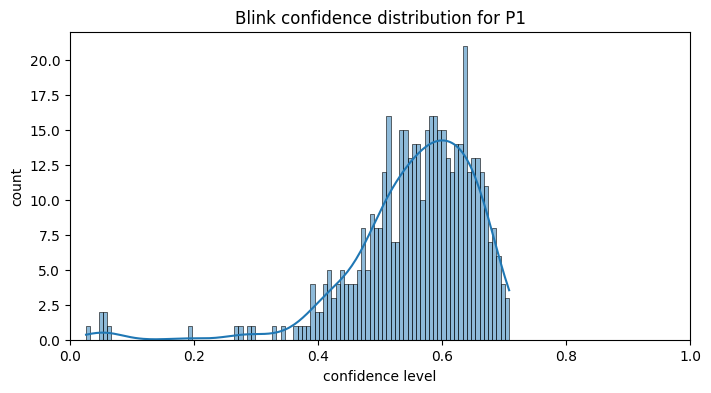

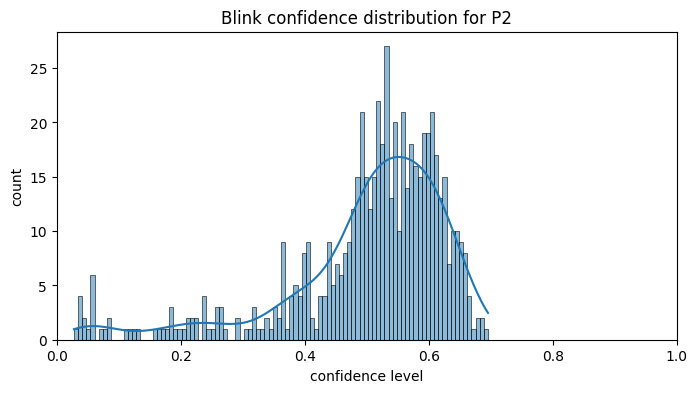

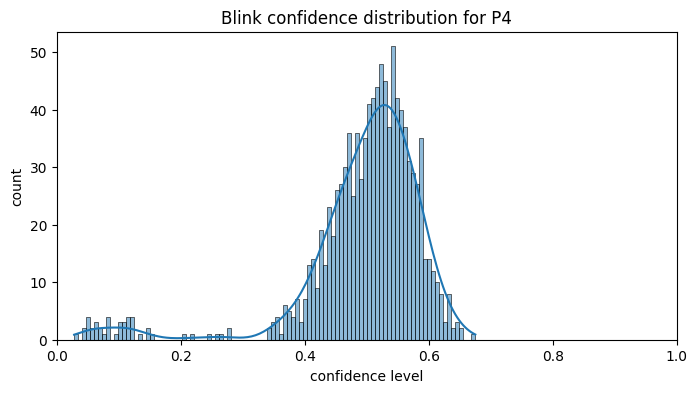

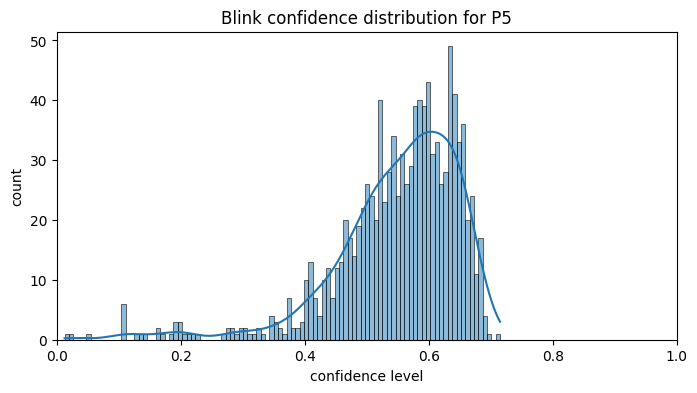

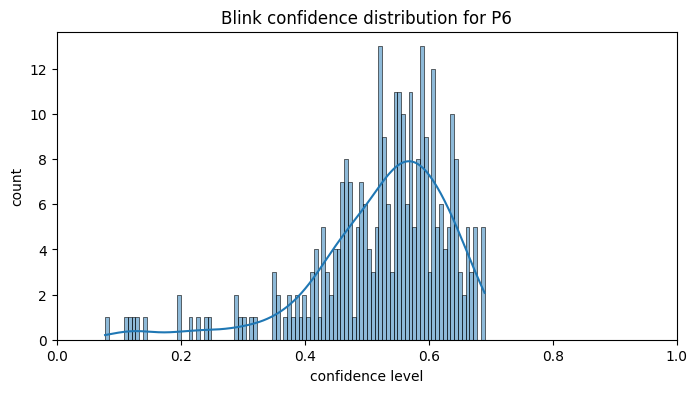

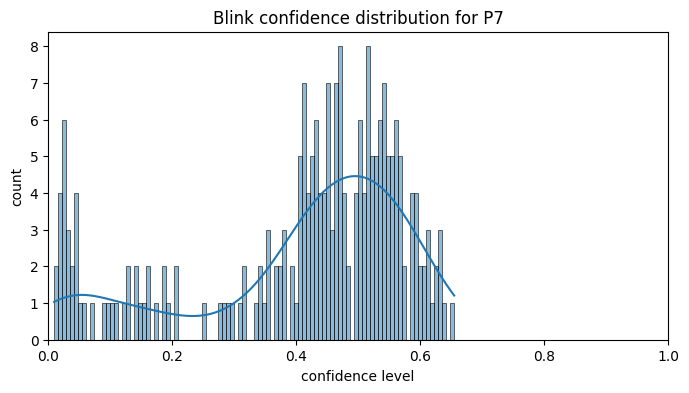

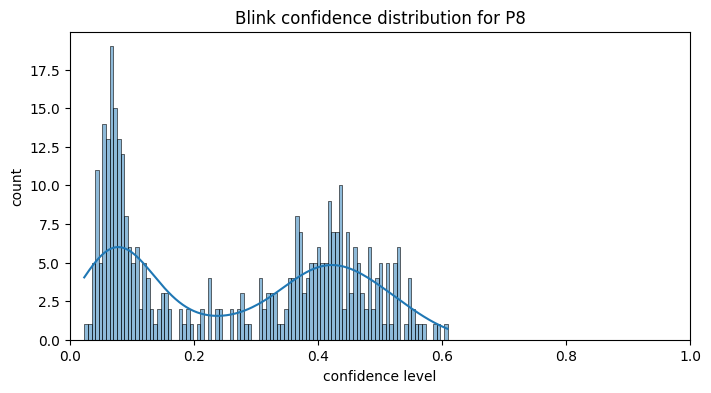

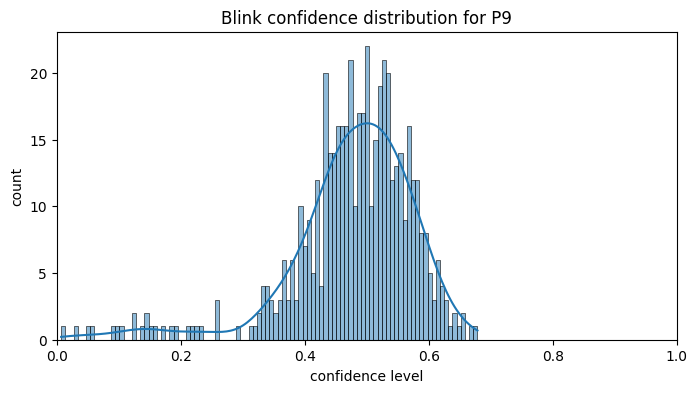

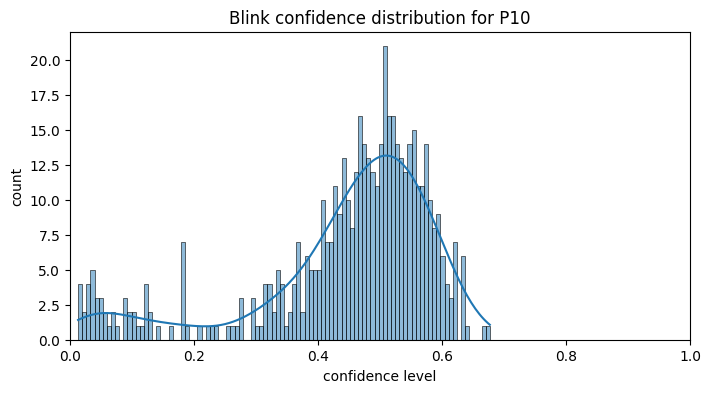

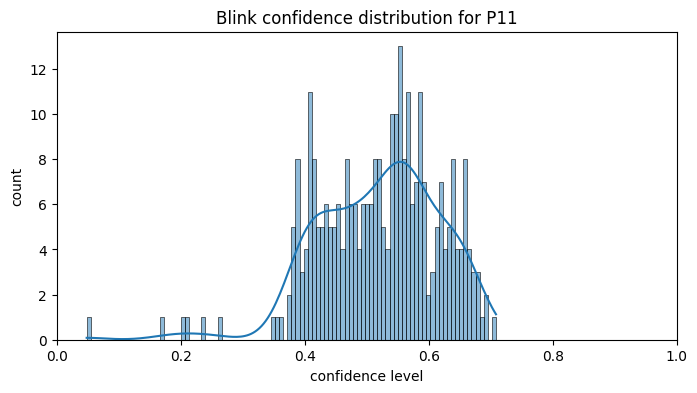

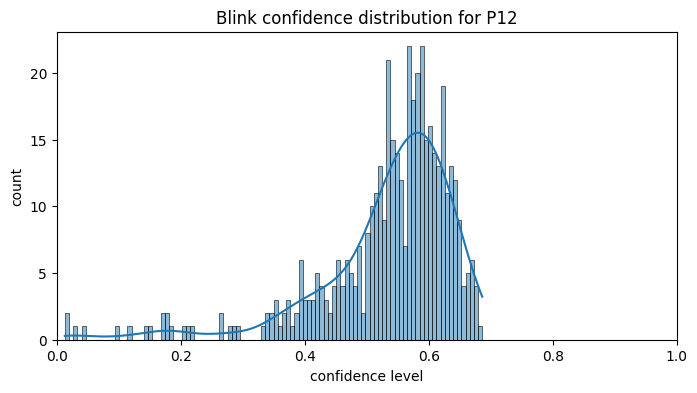

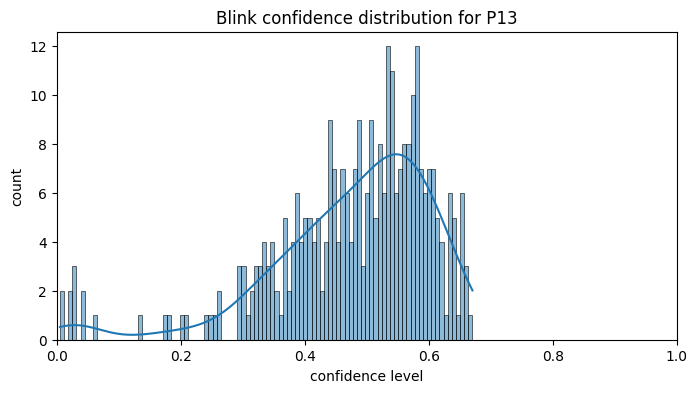

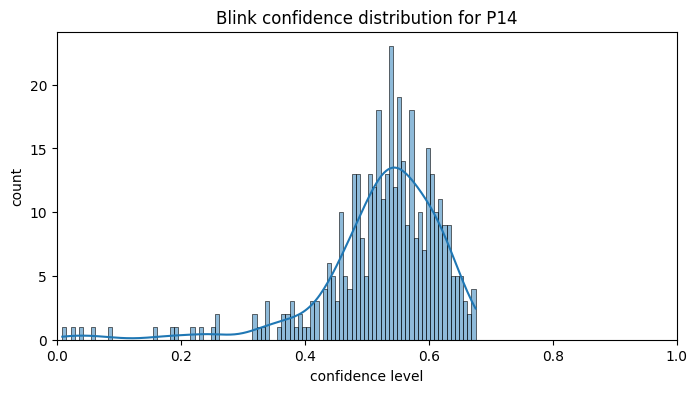

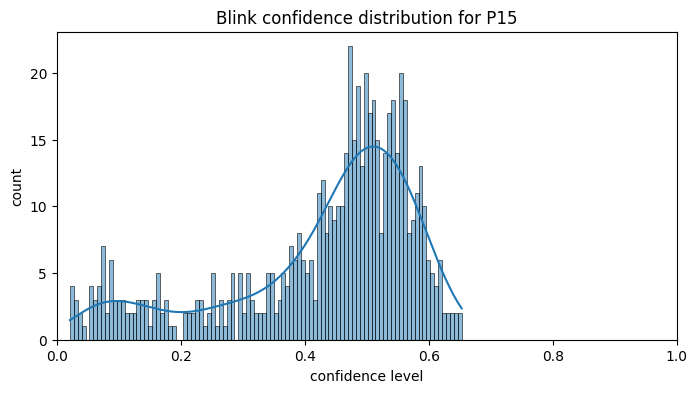

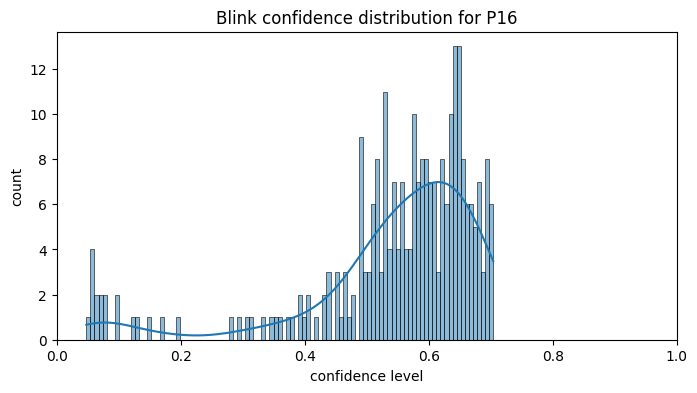

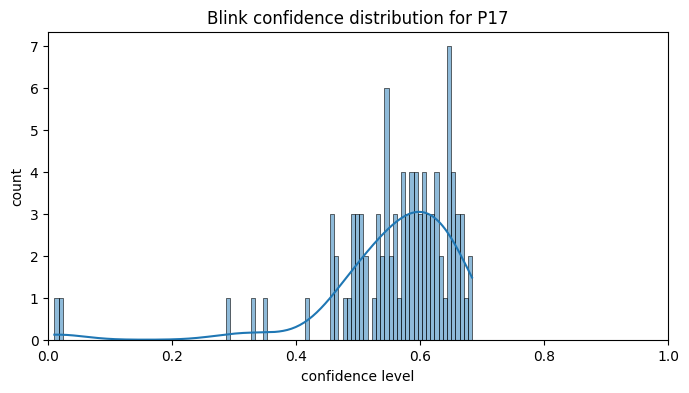

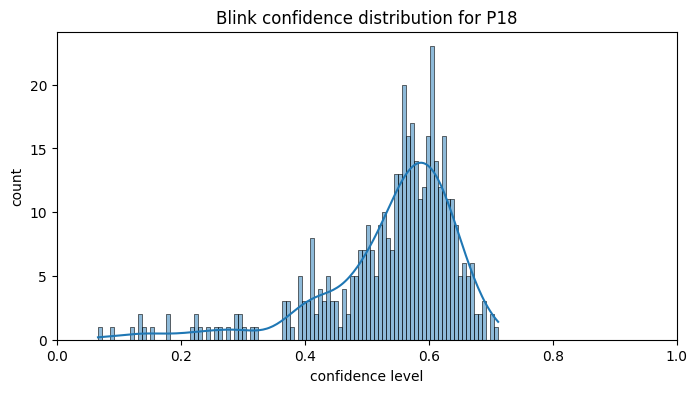

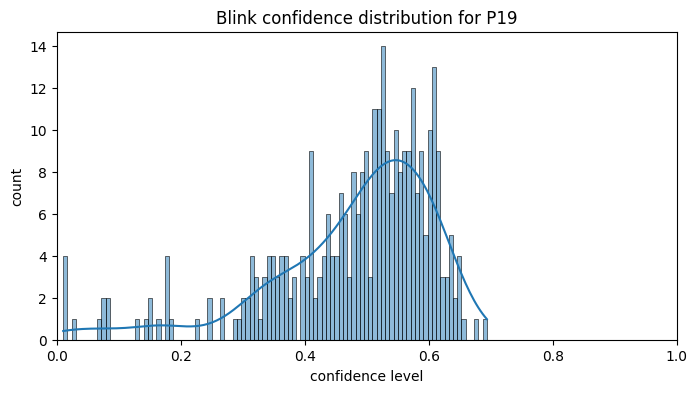

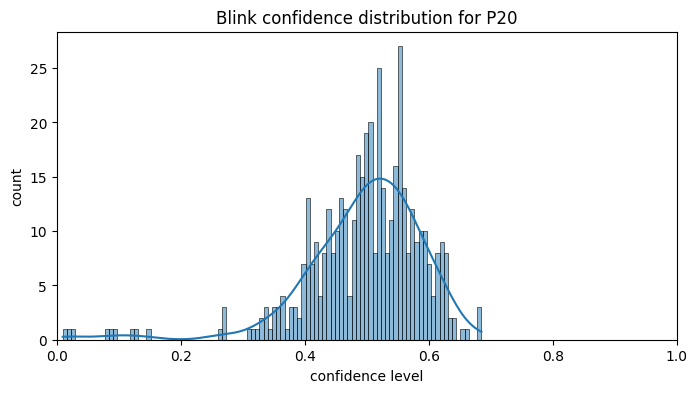

In [ ]:
for pid in participant_ids:
    participant_ddf = ddf[ddf['participant_id'] == pid]
    plt.figure(figsize=(8, 4))
    sns.histplot(participant_ddf['confidence'], bins=100, kde=True)
    plt.title(f'Blink confidence distribution for P{pid}')
    plt.xlabel('confidence level')
    plt.ylabel('count')
    plt.xlim(0,1)
    plt.show()

##### Duration distribution
- Many outliers -> cleaning

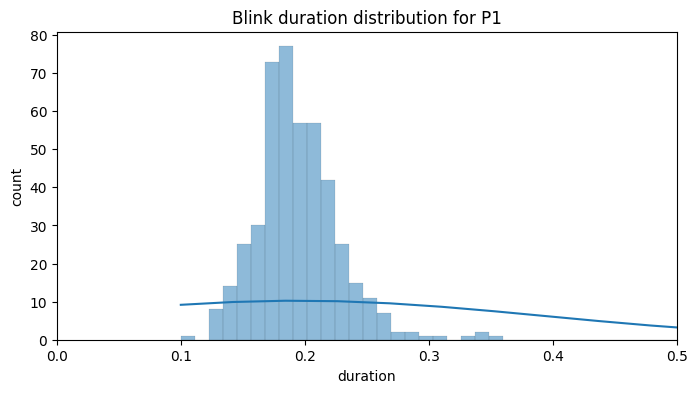

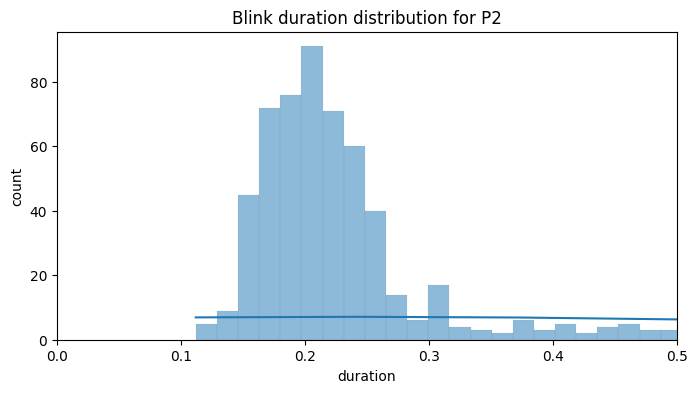

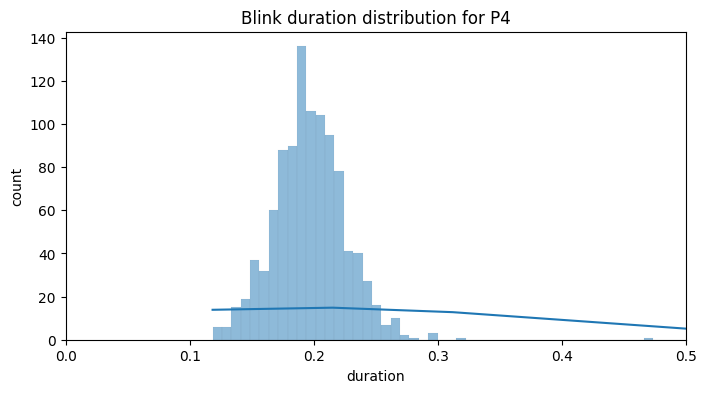

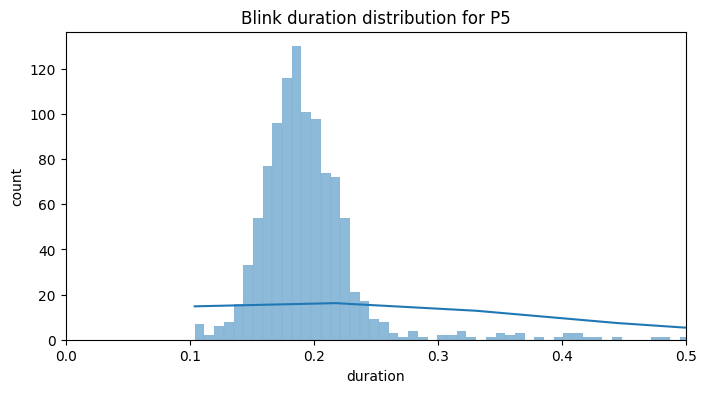

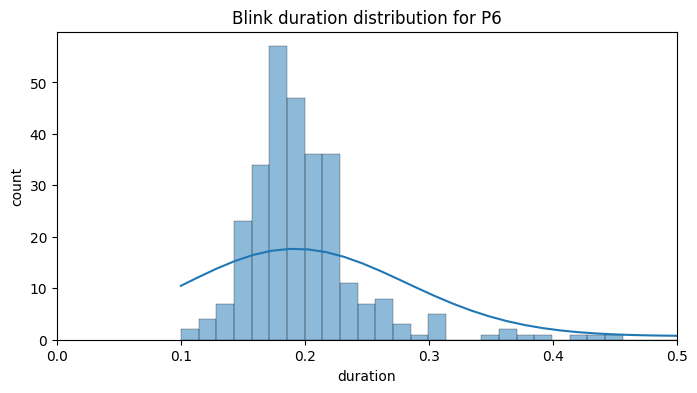

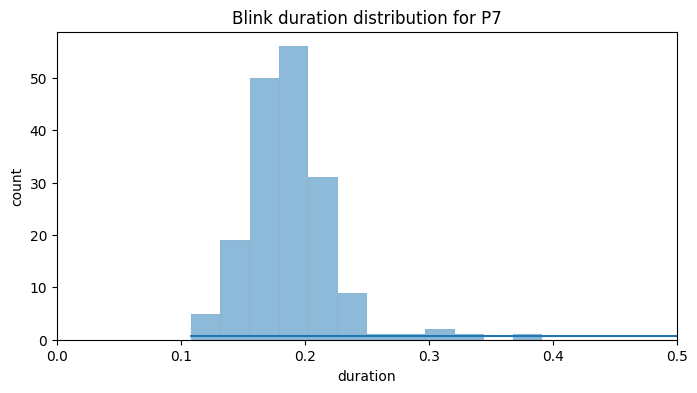

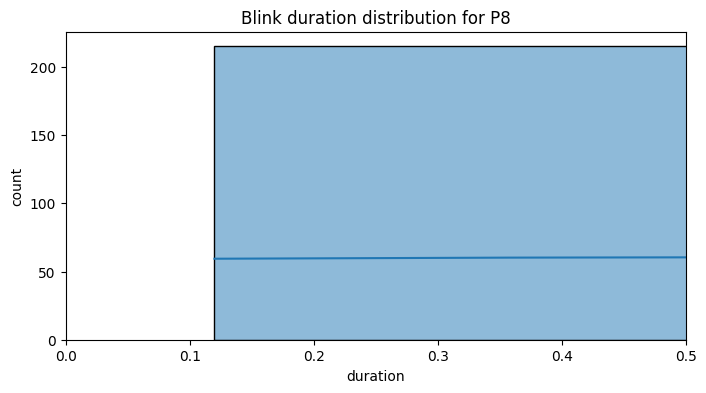

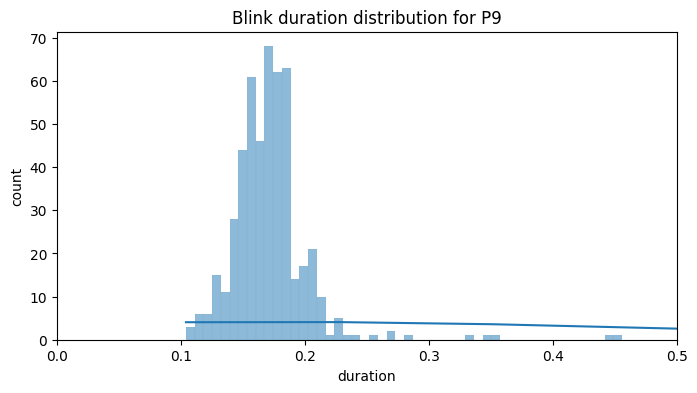

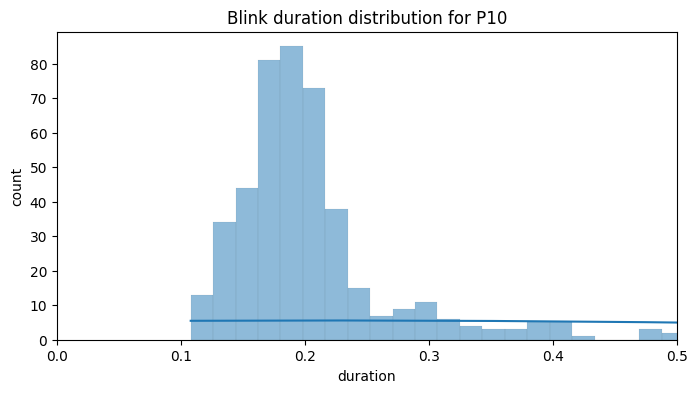

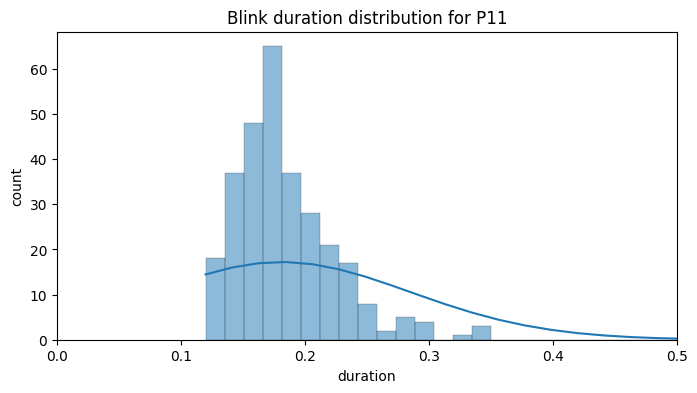

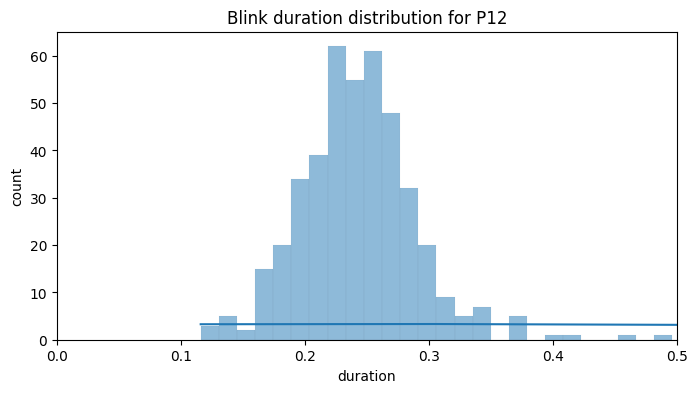

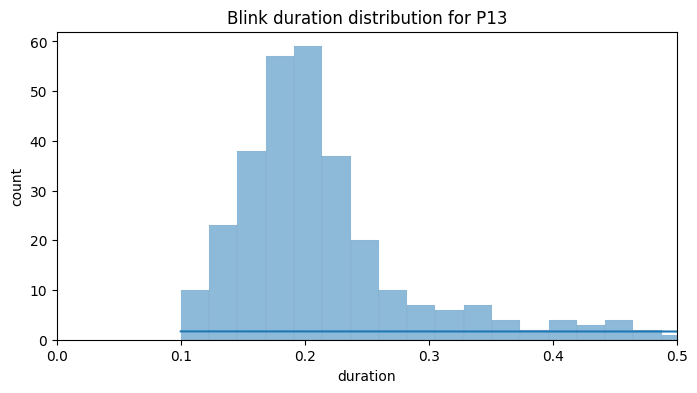

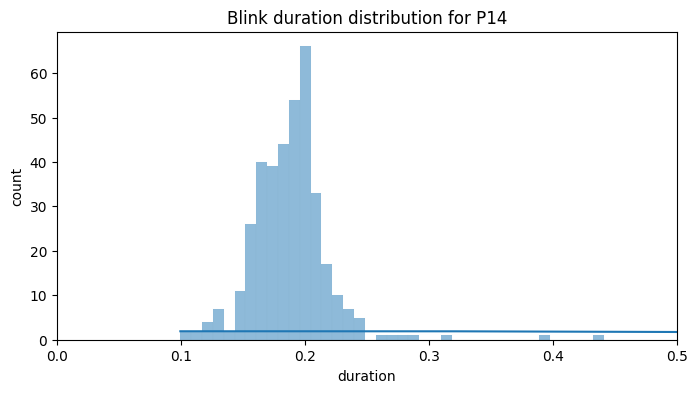

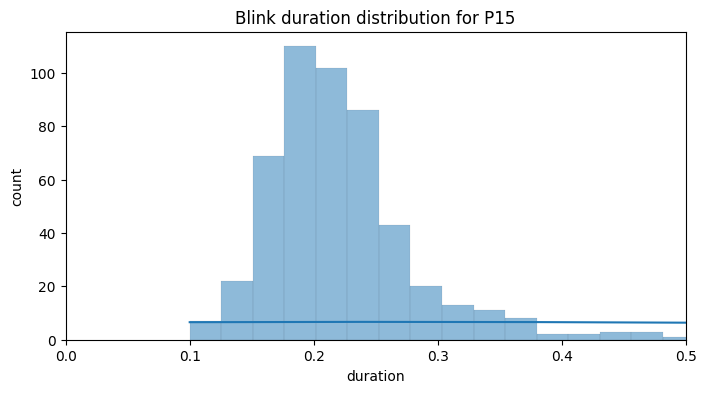

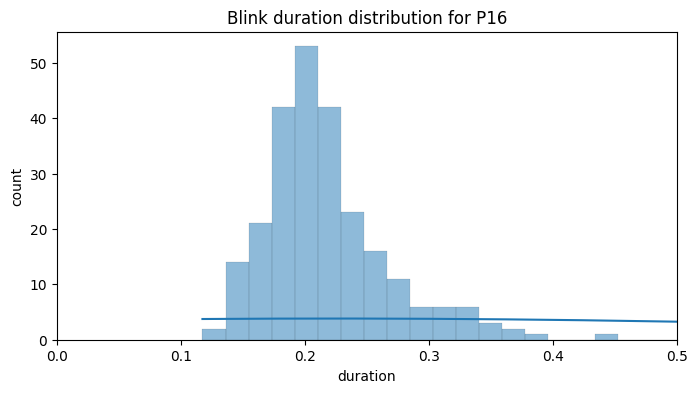

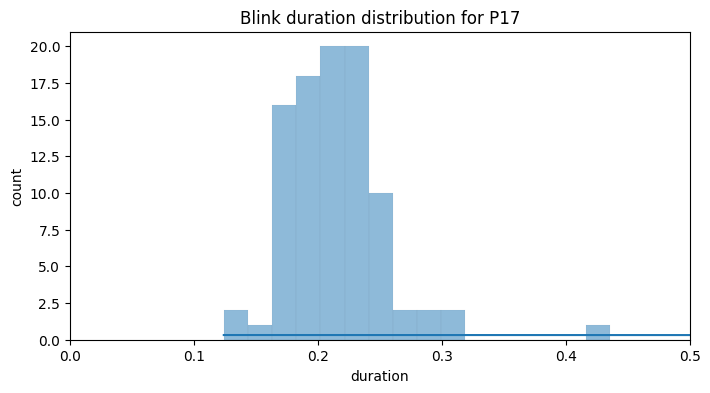

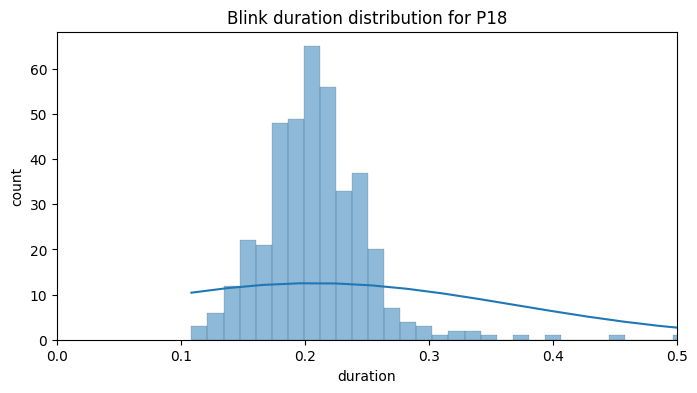

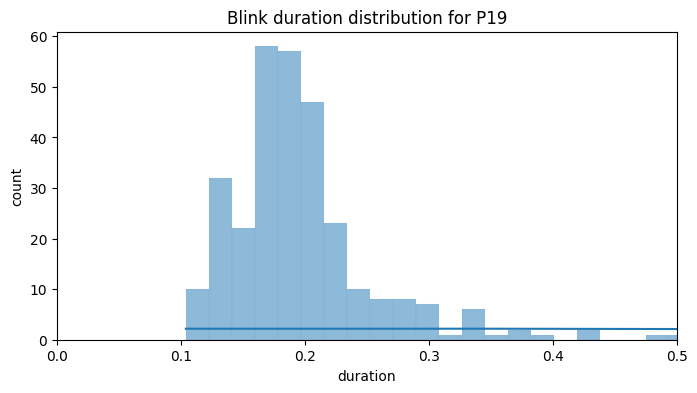

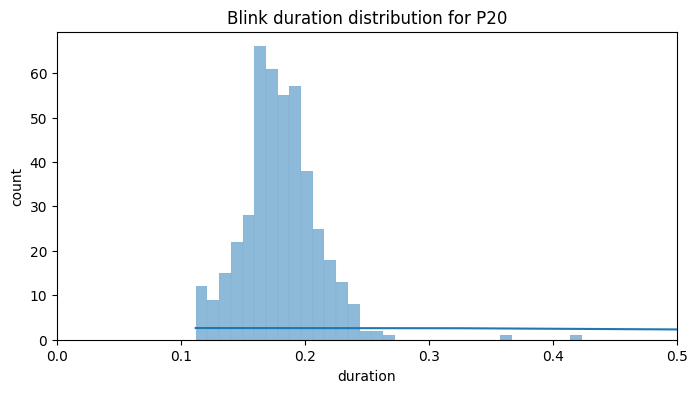

In [ ]:
for pid in participant_ids:
    participant_ddf = ddf[ddf['participant_id'] == pid]
    plt.figure(figsize=(8, 4))
    sns.histplot(participant_ddf['duration'], kde=True)
    plt.title(f'Blink duration distribution for P{pid}')
    plt.xlabel('duration')
    plt.ylabel('count')
    plt.xlim(0, 0.5)
    plt.show()

##### Confidence-duration correlation
- Negative exponential correlation

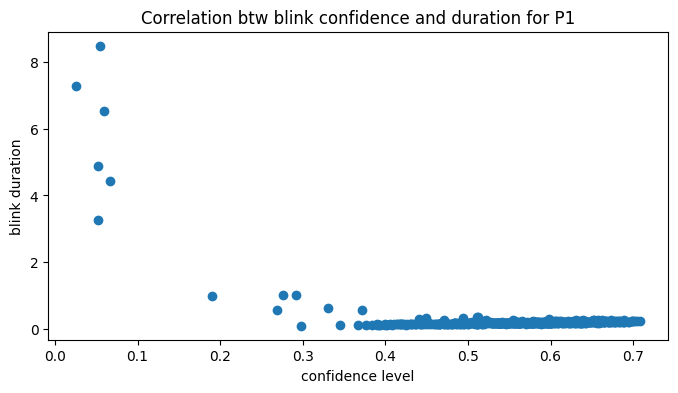

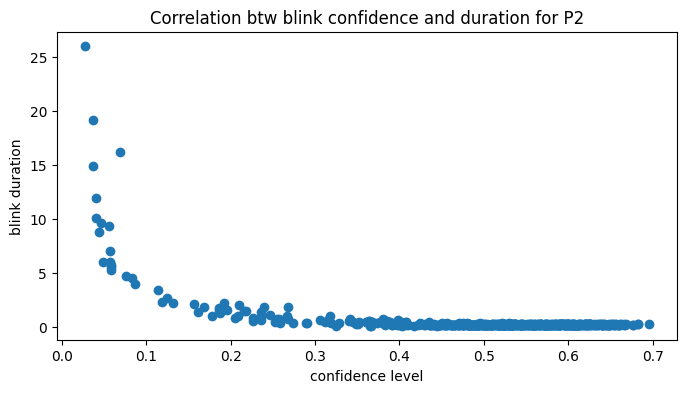

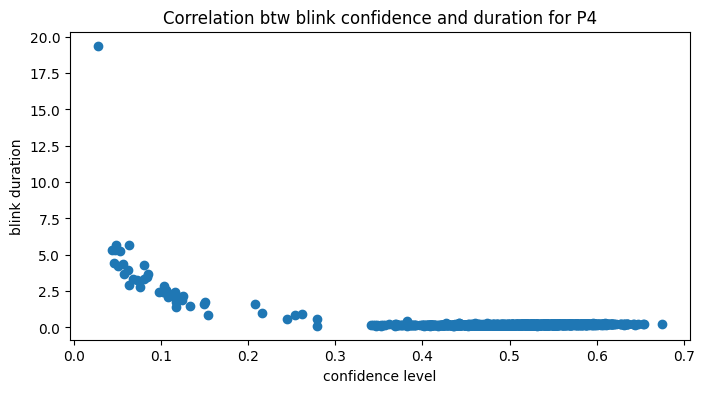

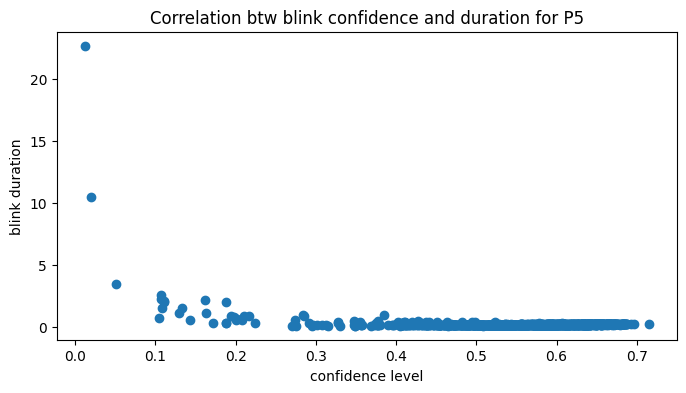

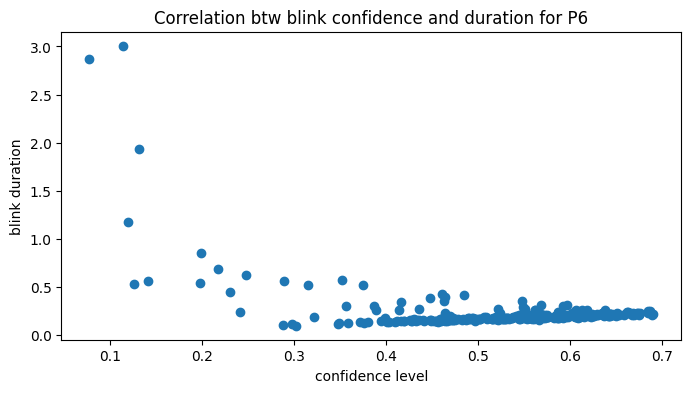

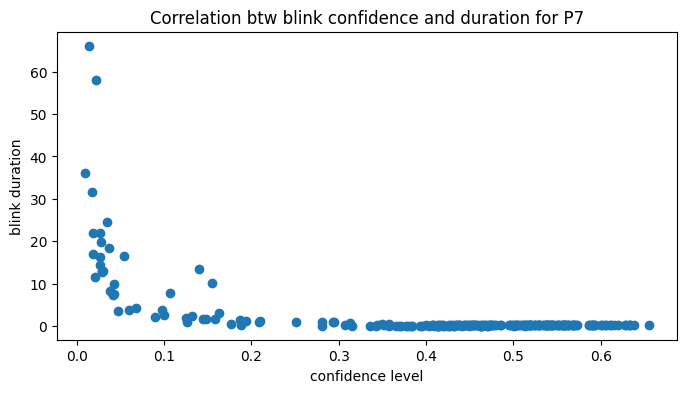

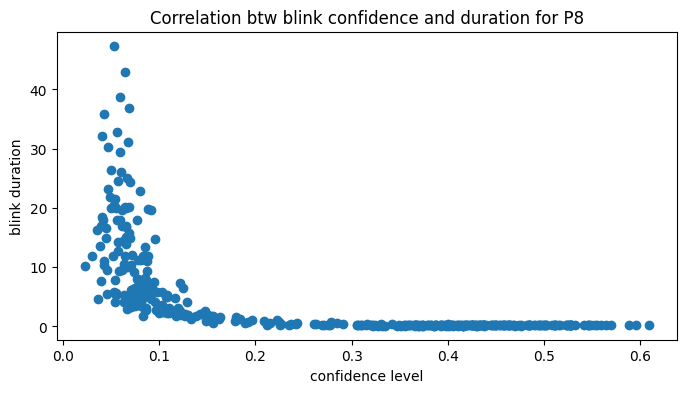

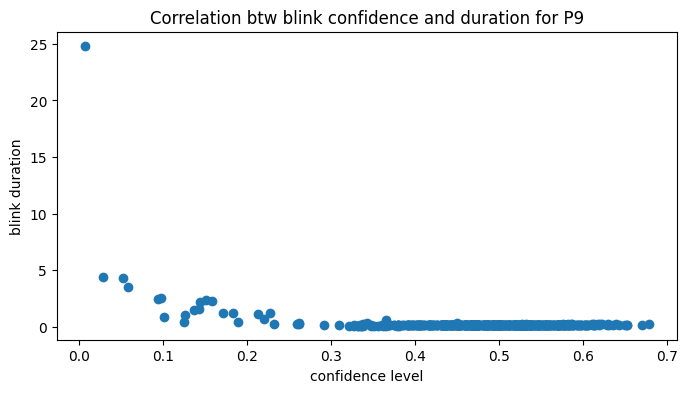

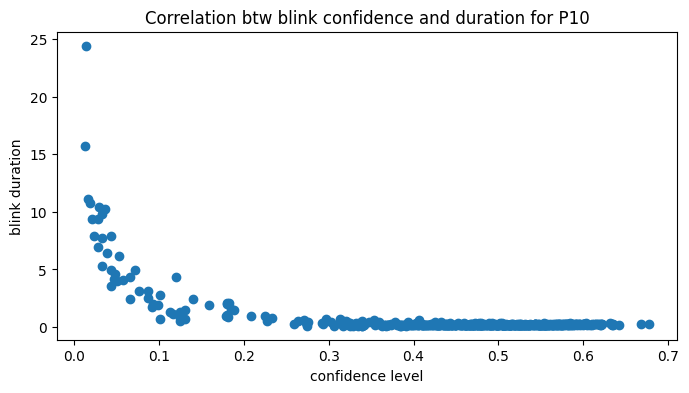

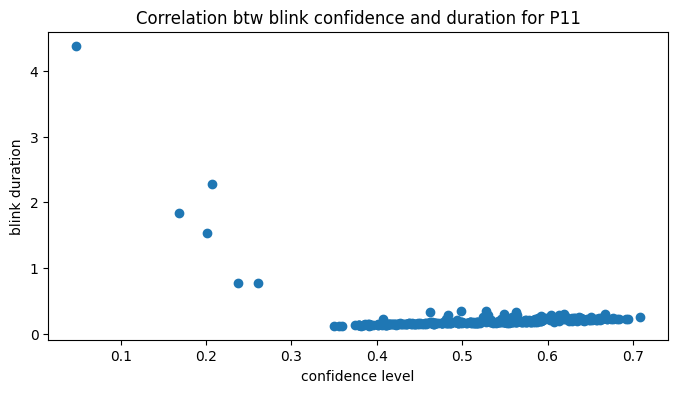

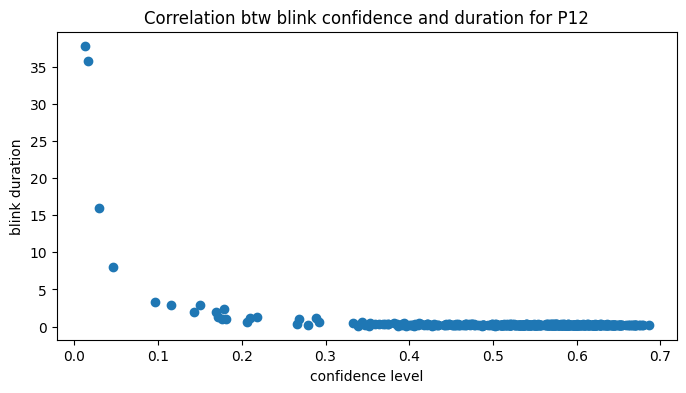

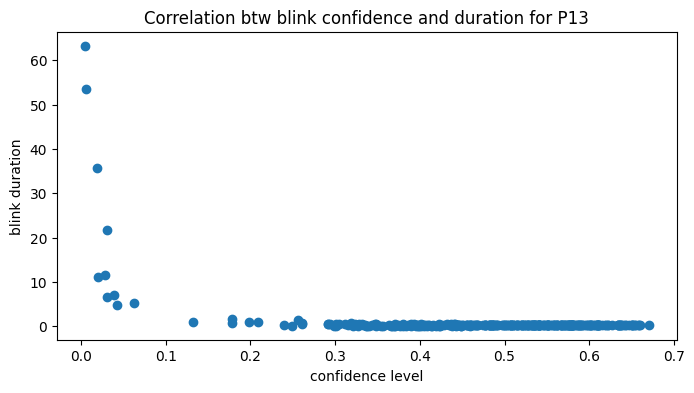

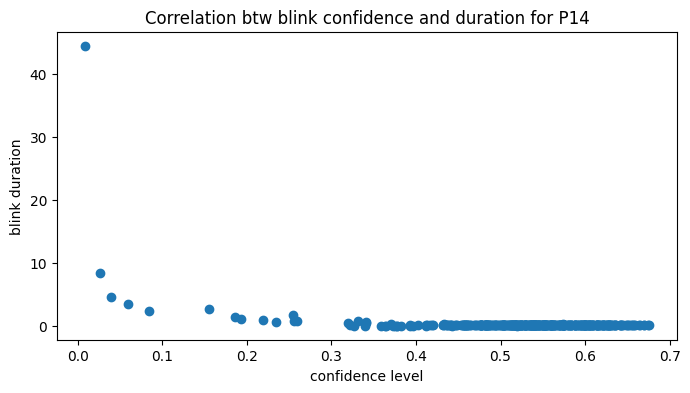

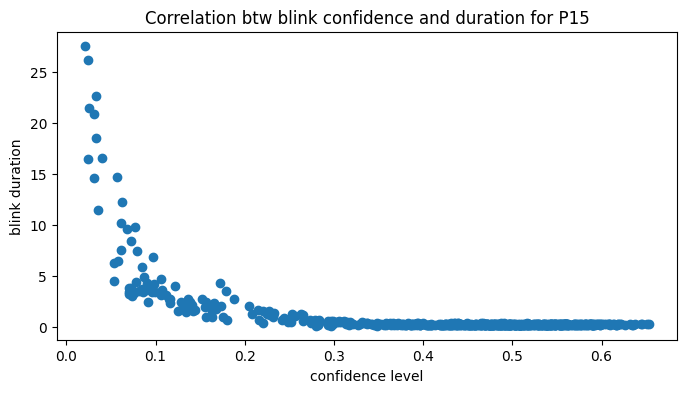

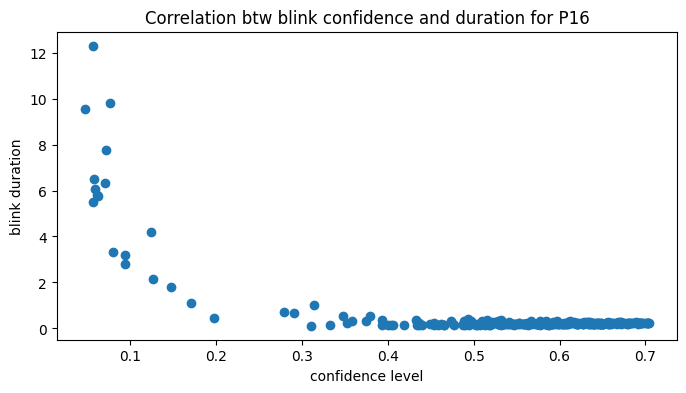

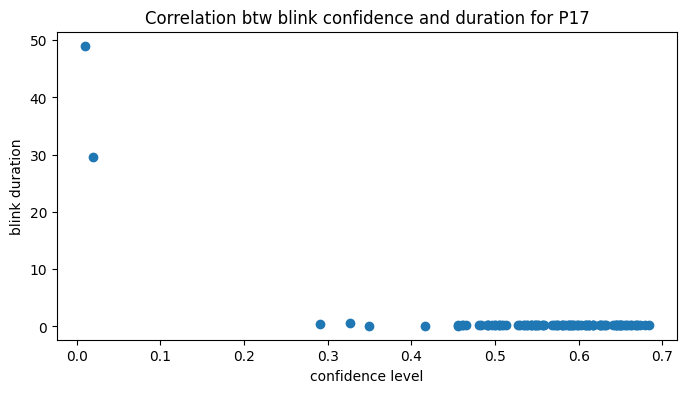

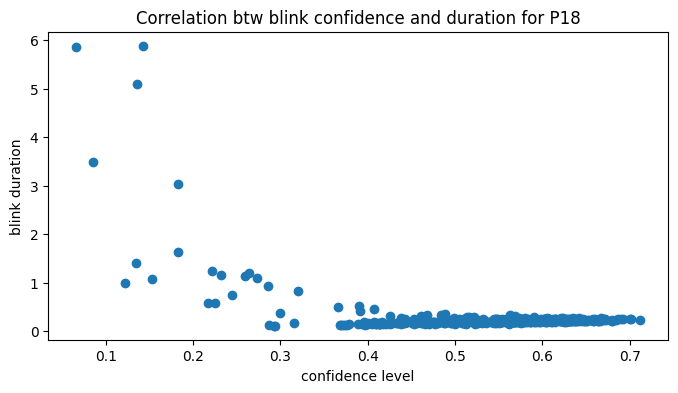

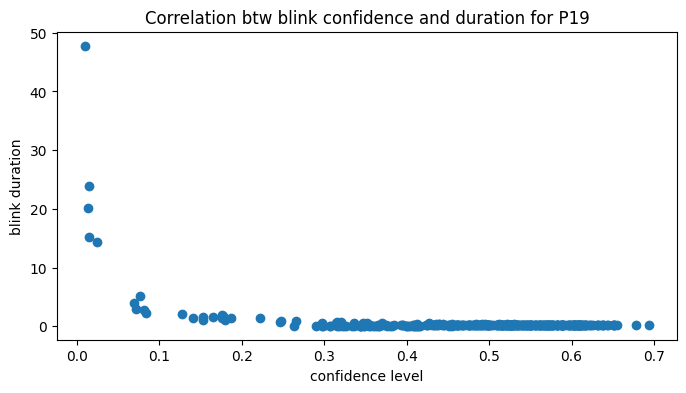

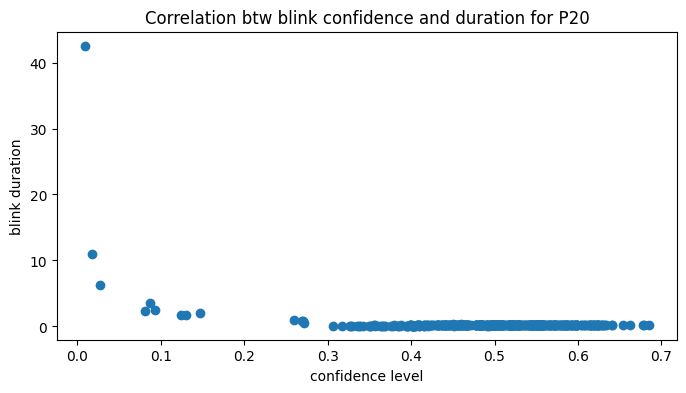

In [ ]:
for pid in participant_ids:
    participant_ddf = ddf[ddf['participant_id'] == pid]
    plt.figure(figsize=(8, 4))
    plt.scatter(participant_ddf['confidence'], participant_ddf['duration'])
    plt.title(f'Correlation btw blink confidence and duration for P{pid}')
    plt.xlabel('confidence level')
    plt.ylabel('blink duration')
    # plt.xlim(0,1)
    plt.show()

##### Duration boxplot
- P08 is skewed

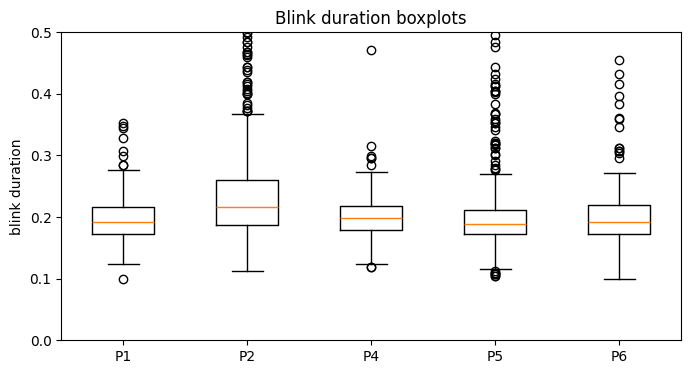

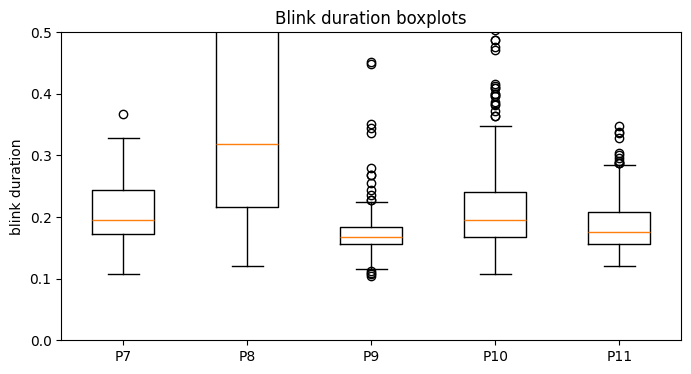

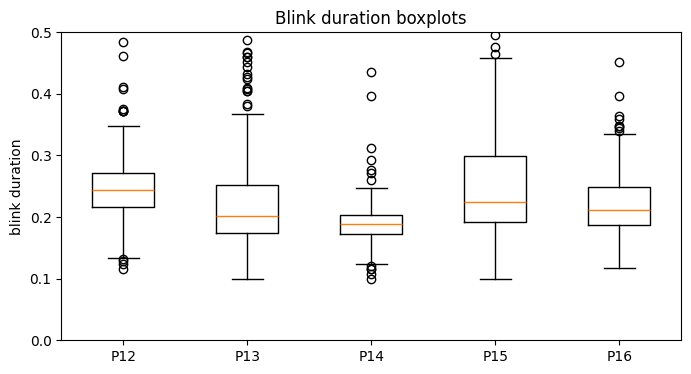

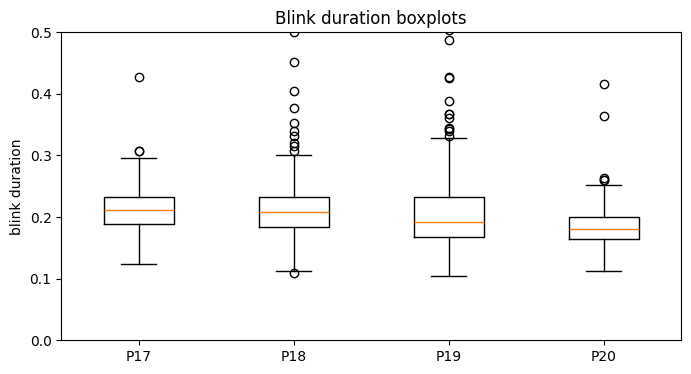

In [ ]:
grouped_ids = [participant_ids[i:i+5] for i in range(0, len(participant_ids), 5)] #group ids
for group in grouped_ids: #iterate groups
    participants_ddf = [ddf[ddf['participant_id'] == pid]['duration'] for pid in group] #get group's sub-ddfs
    plt.figure(figsize=(8, 4))
    plt.boxplot(participants_ddf, whis = 1.5)
    plt.title(f'Blink duration boxplots')
    plt.ylabel('blink duration')
    plt.ylim(0, 0.5)
    plt.xticks(range(1, len(group) + 1), [f'P{pid}' for pid in group]) #single boxplots labels
    plt.show()

### 3. Time-Series Assessment
Confidence, Duration, Occurences

##### Confidence over time
- Few blinks detected for P07 and P17
- Almost half of them goes often to low-confidence level over time (ex: P2, P4, P7, P8, P10, P15)

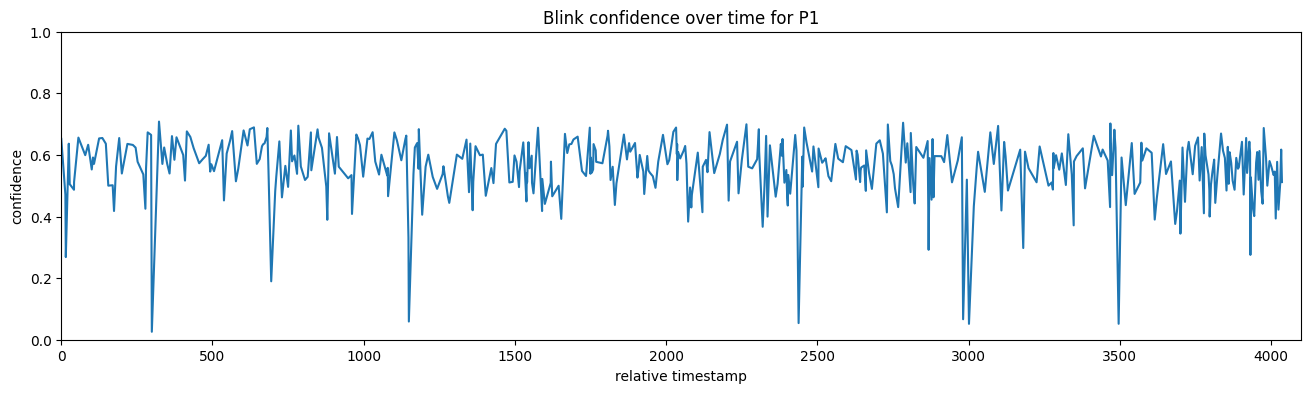

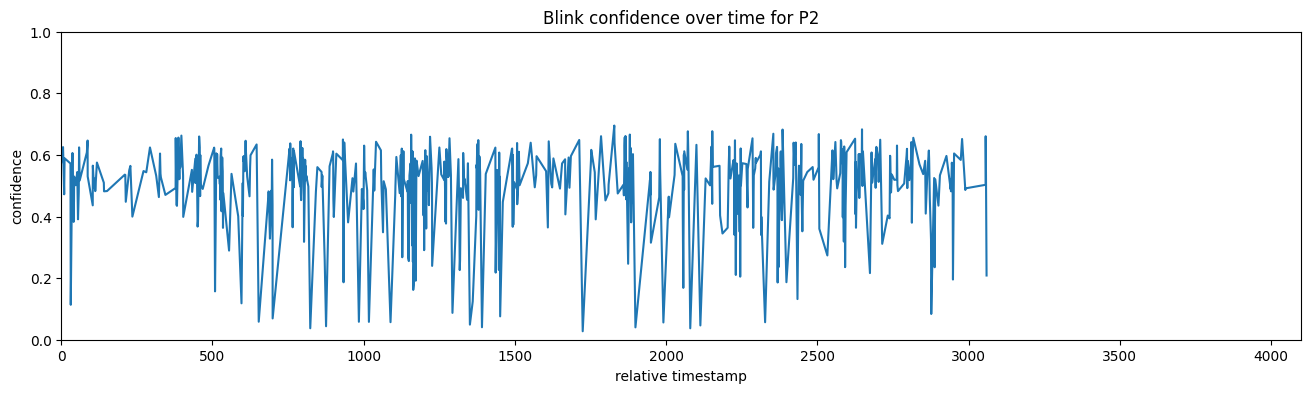

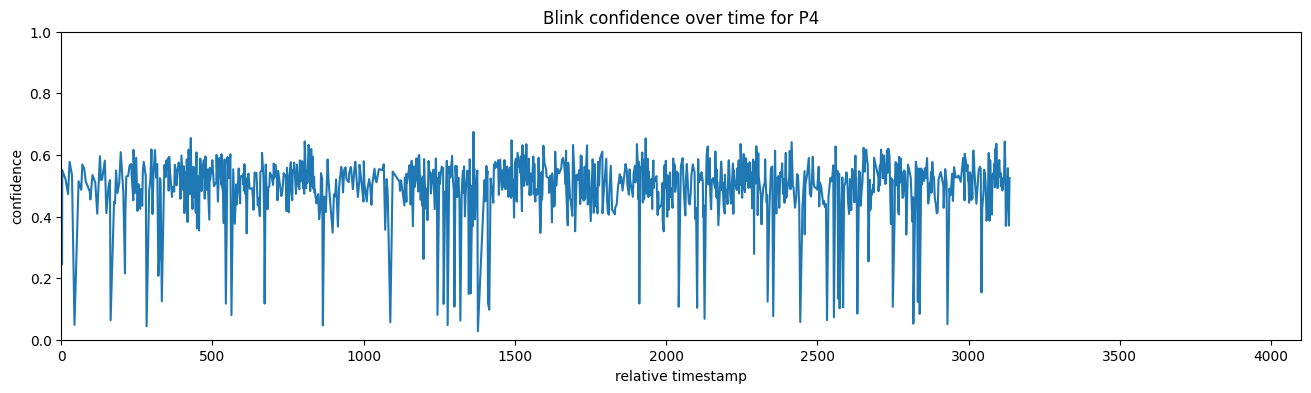

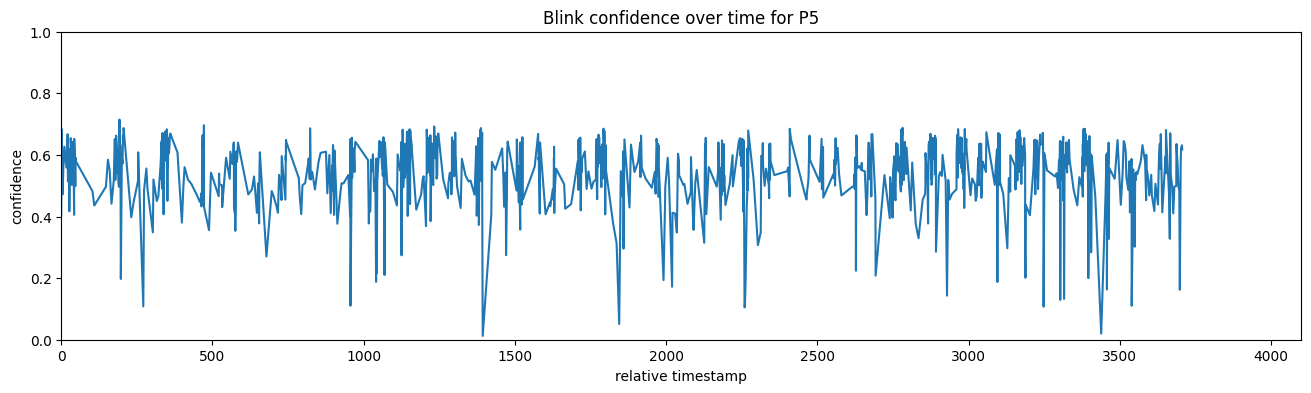

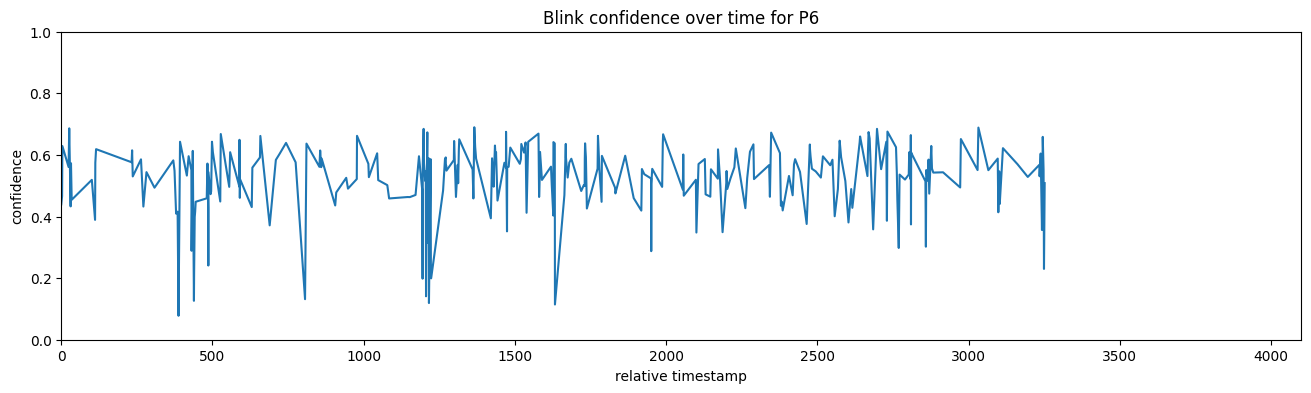

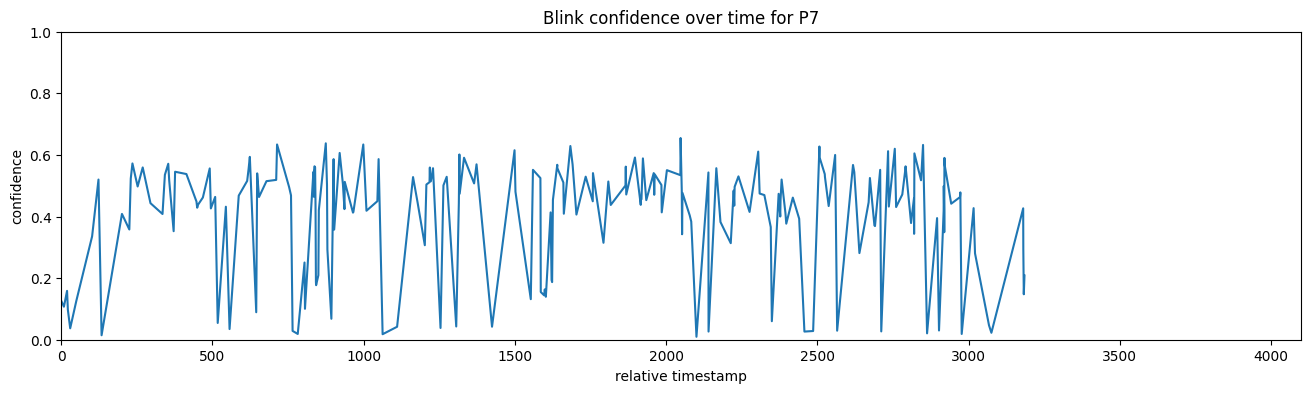

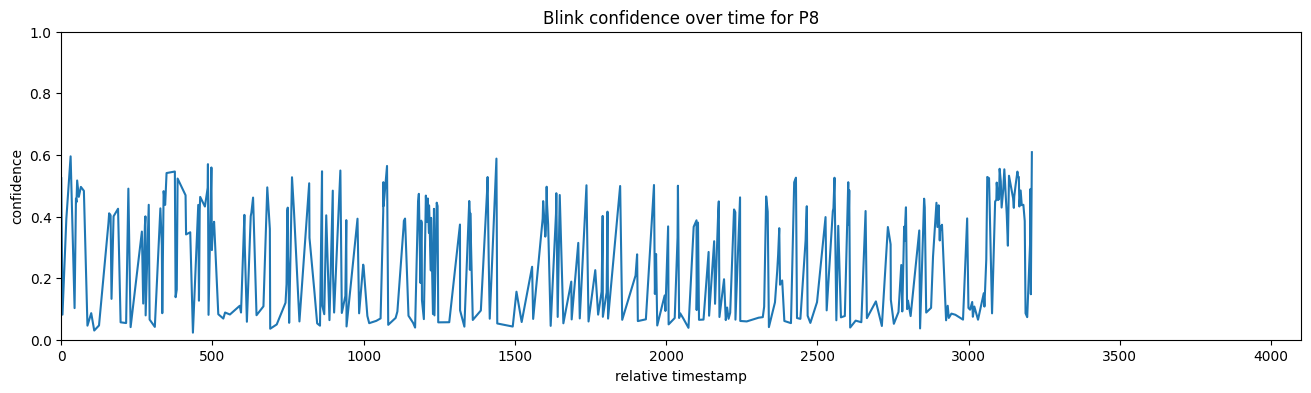

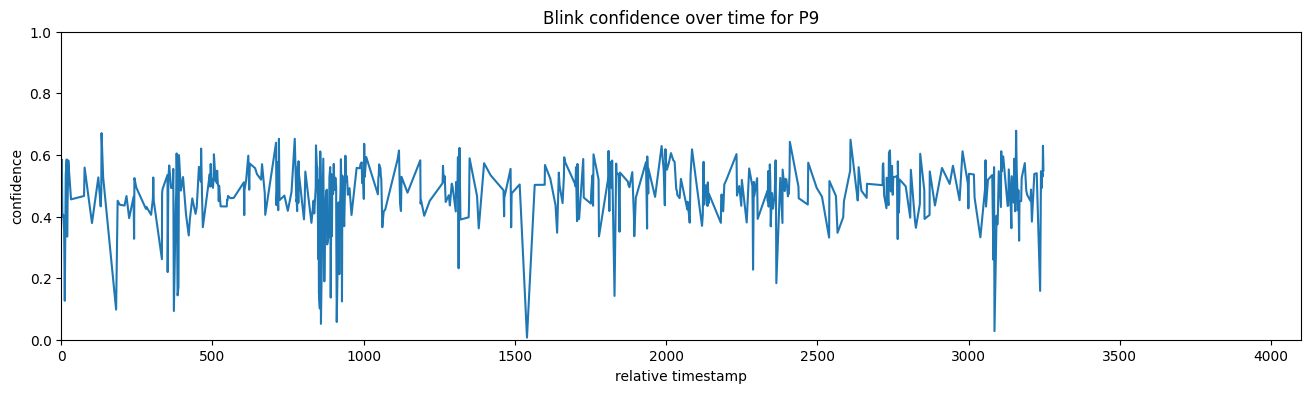

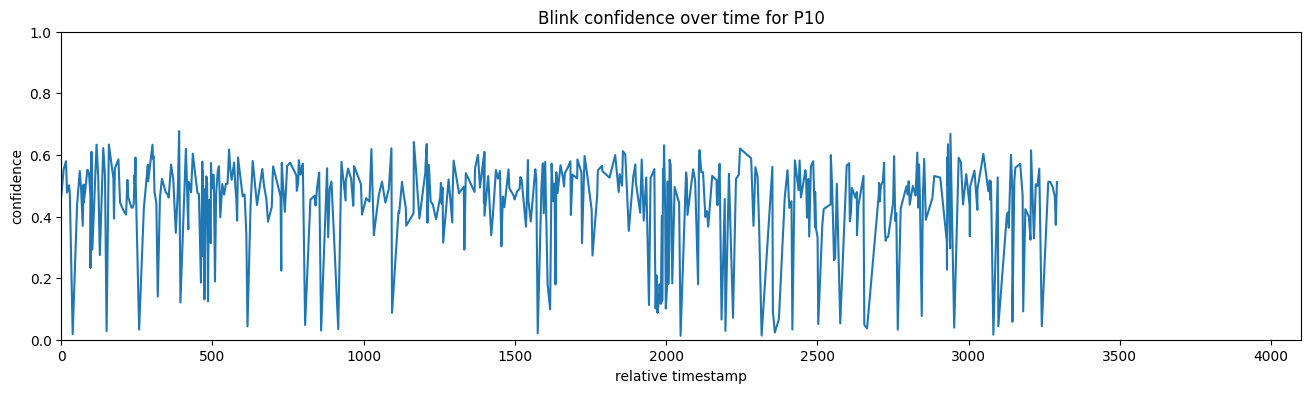

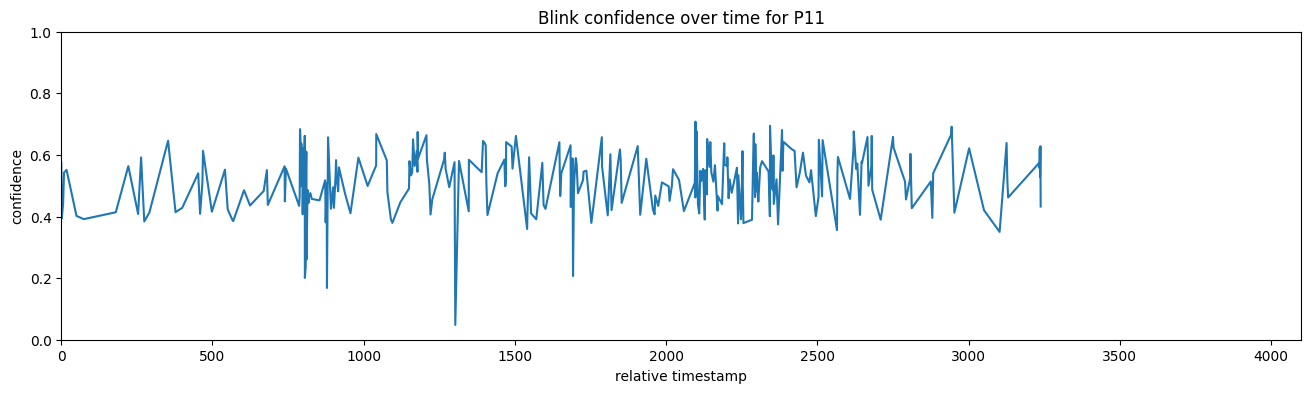

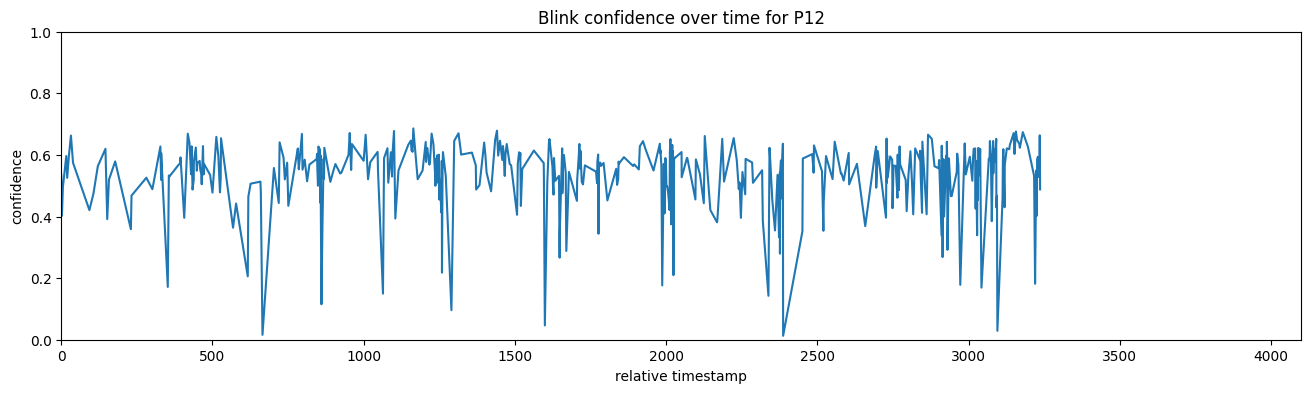

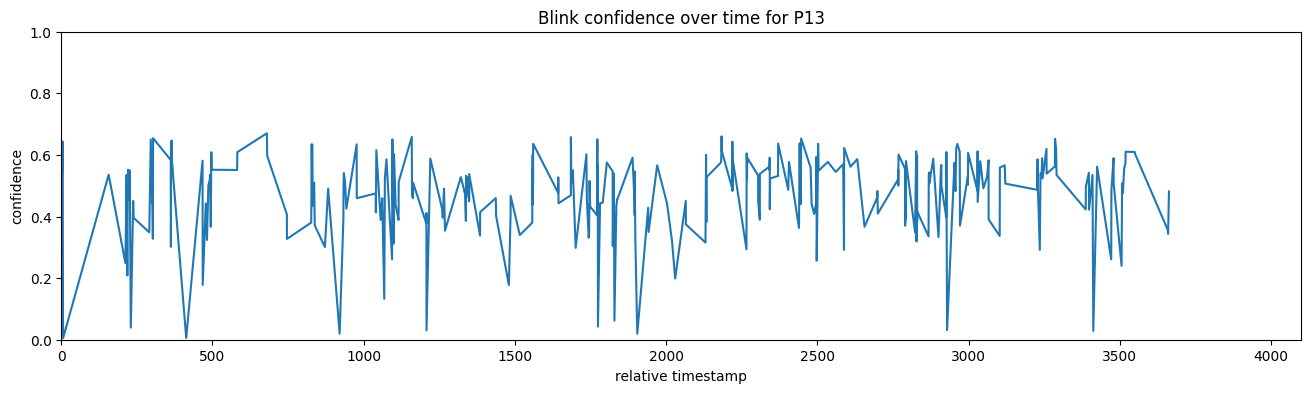

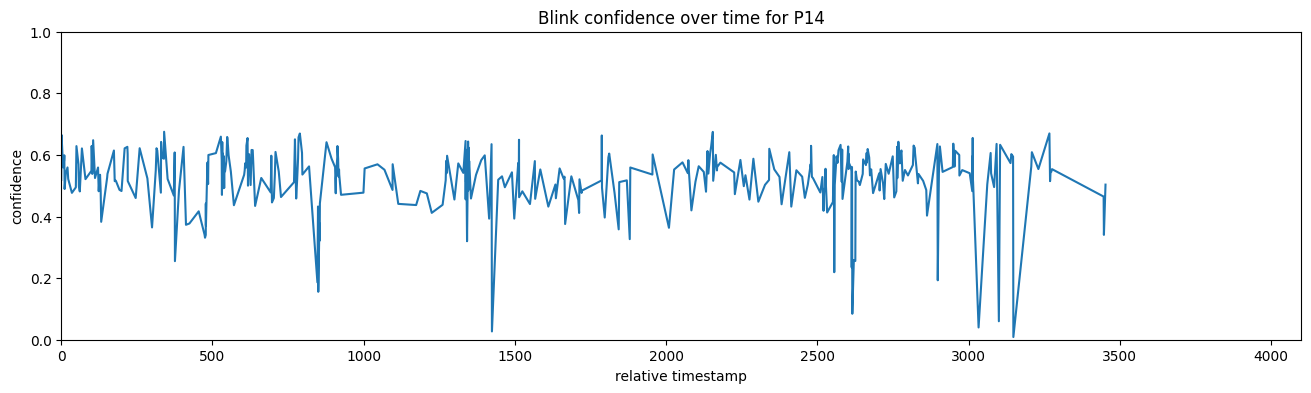

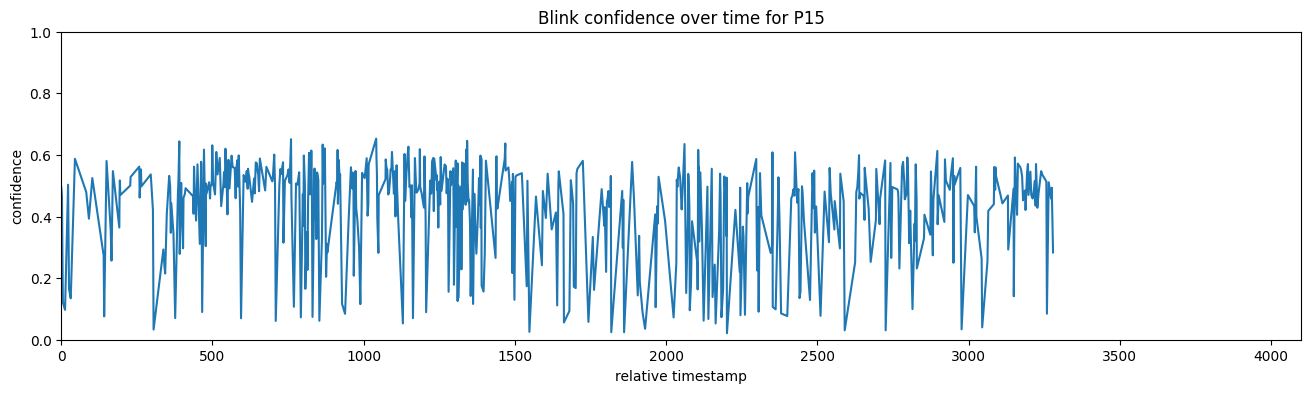

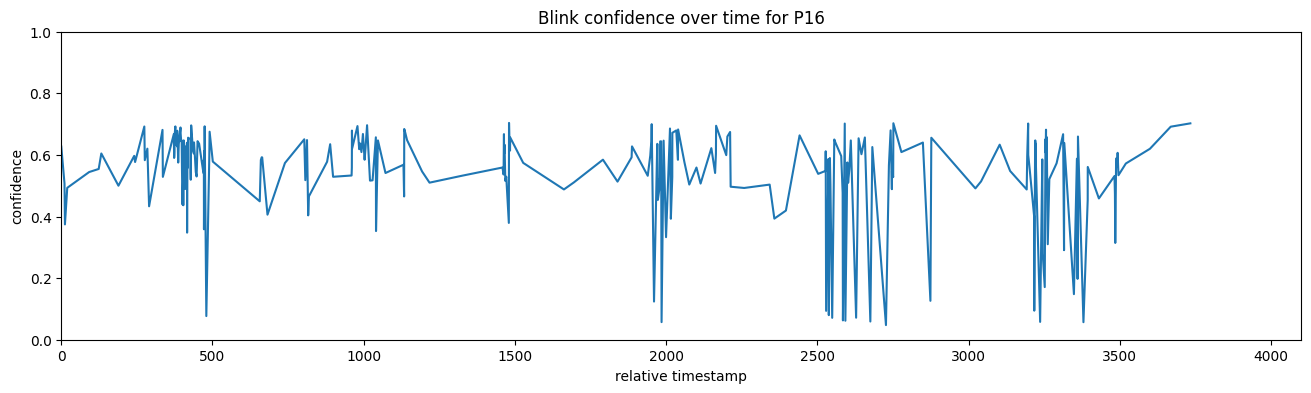

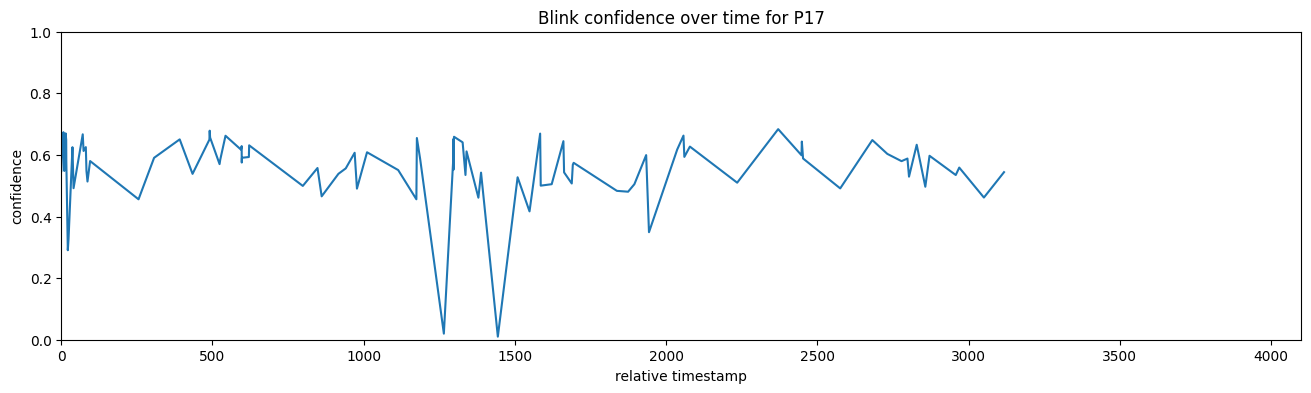

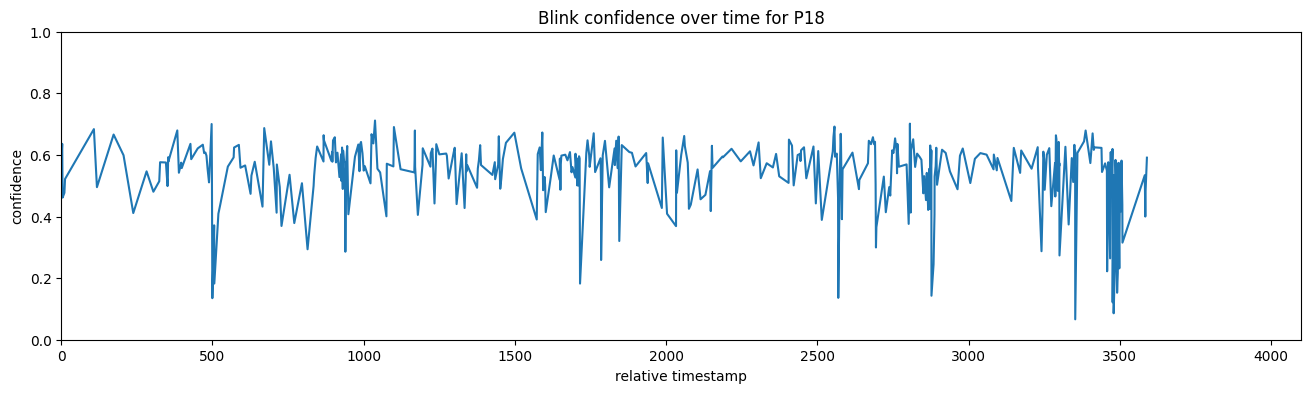

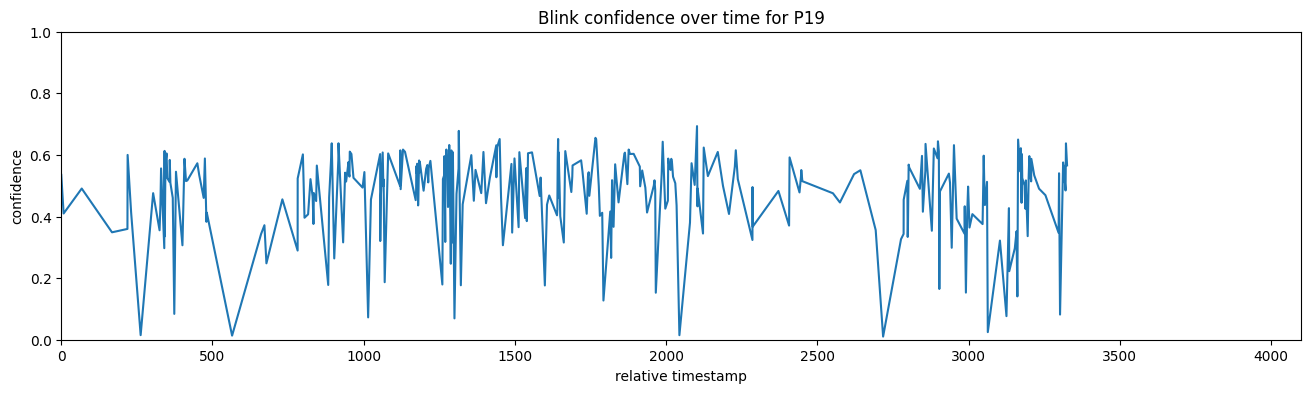

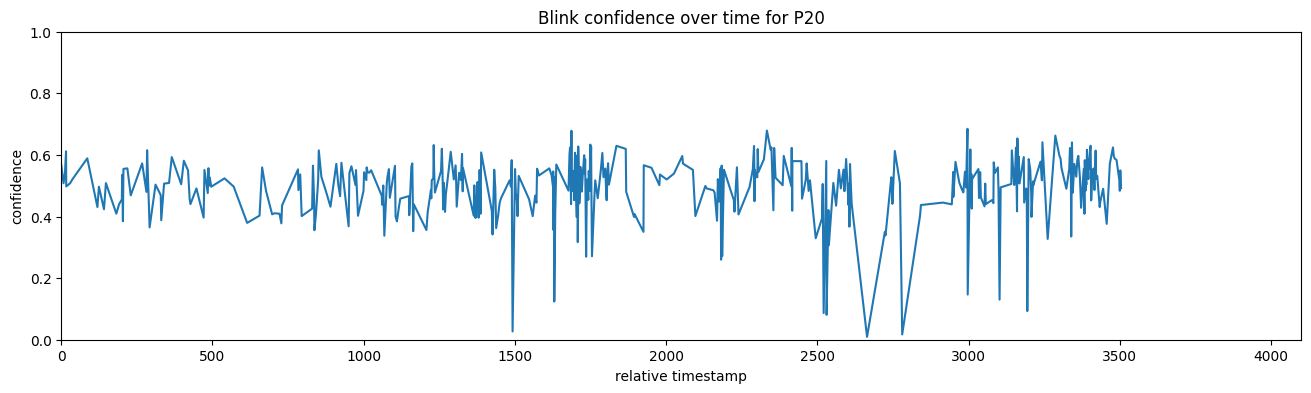

In [ ]:
df['relative_timestamp'] = df.groupby('participant_id')['start_timestamp'].transform(lambda x: x - x.min())
for pid in participant_ids:
    participant_df = df[df['participant_id'] == pid]
    plt.figure(figsize=(16, 4))
    plt.plot(participant_df['relative_timestamp'], participant_df['confidence'])
    plt.title(f'Blink confidence over time for P{pid}')
    plt.xlabel('relative timestamp')
    plt.ylabel('confidence')
    plt.xlim(0, 4100)
    plt.ylim(0, 1)
    plt.show()

##### Duration over time
- Many potential outliers (often) (especially P08 and P15)

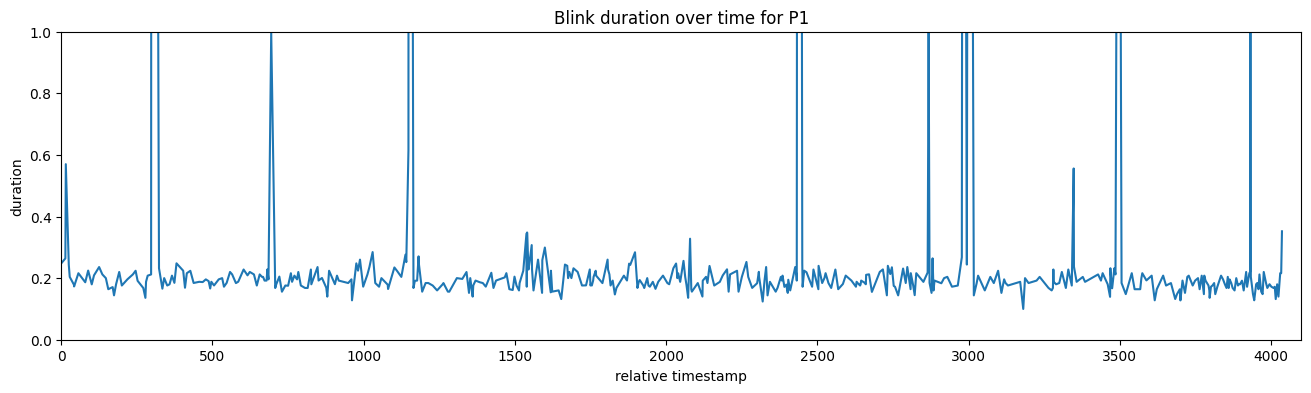

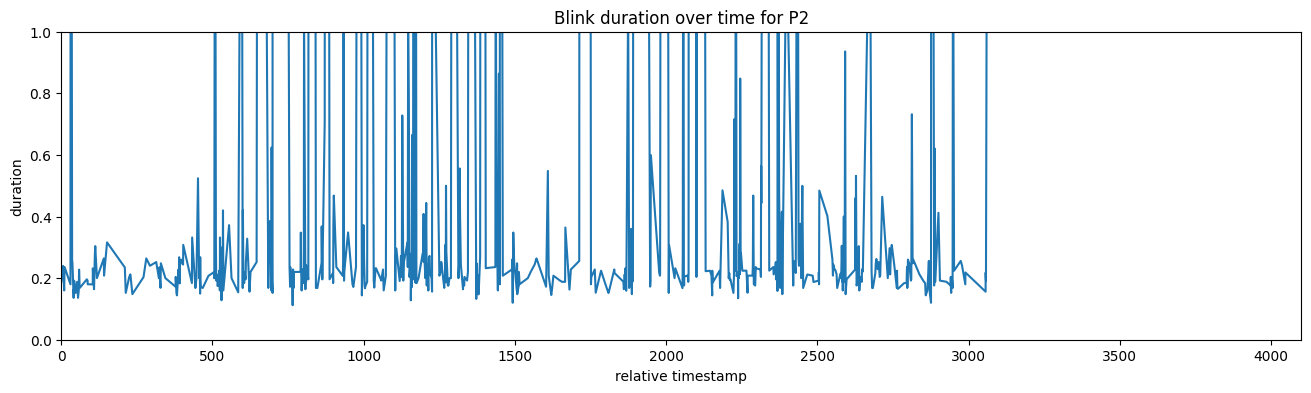

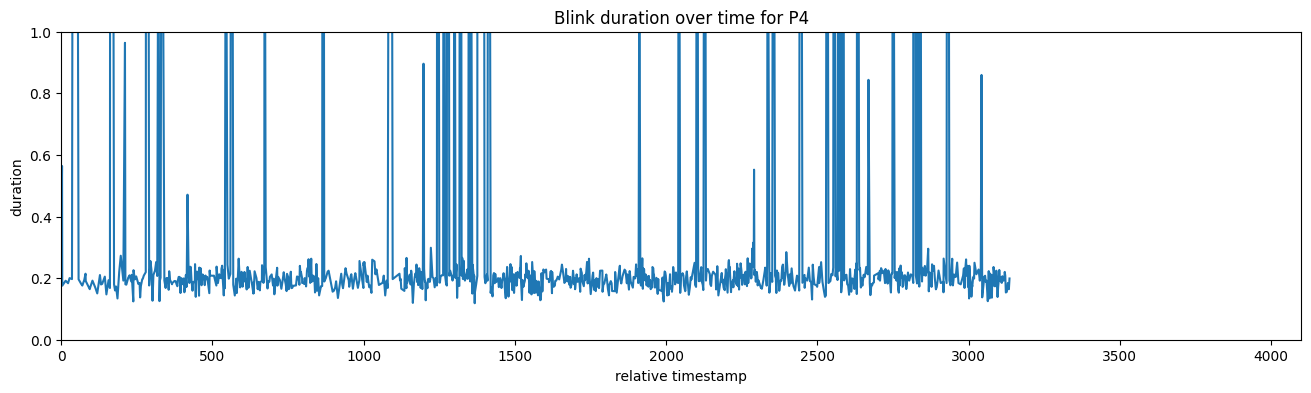

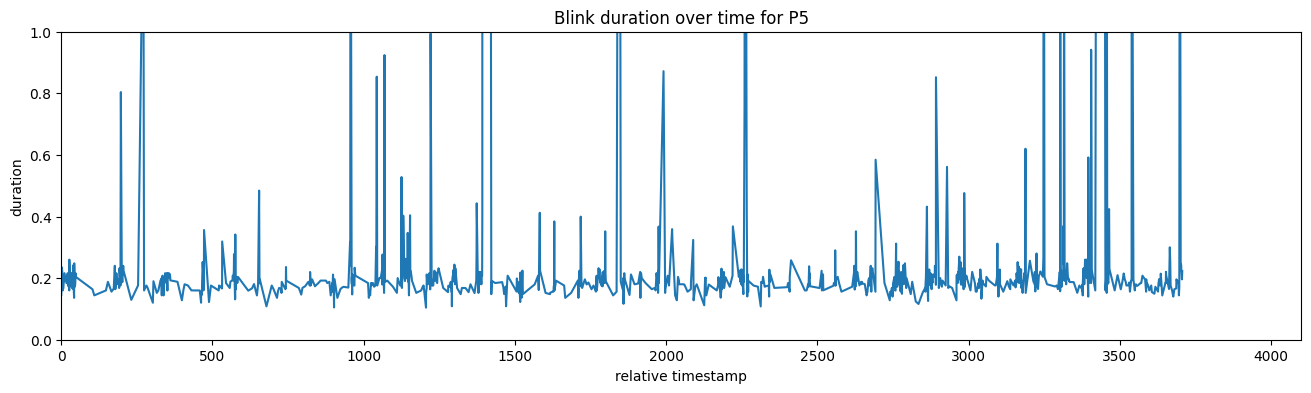

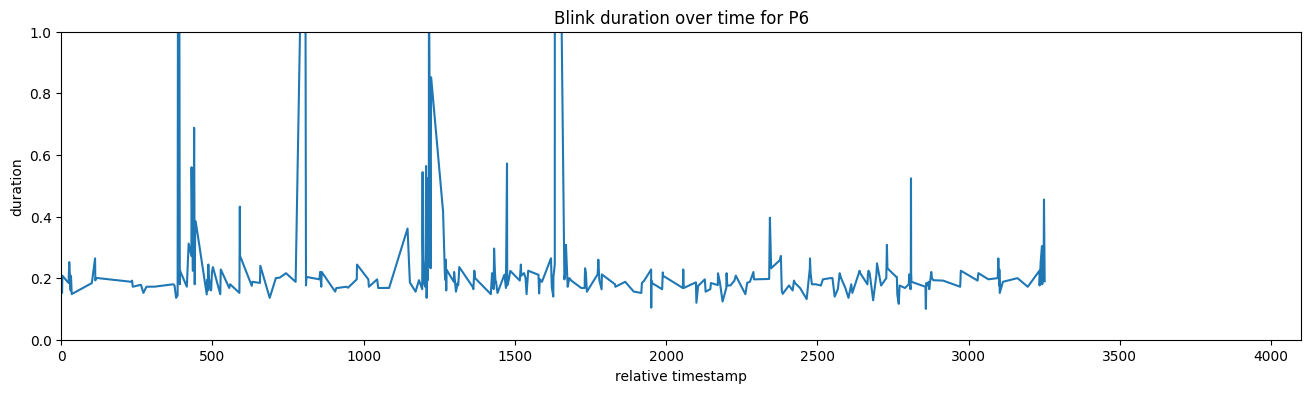

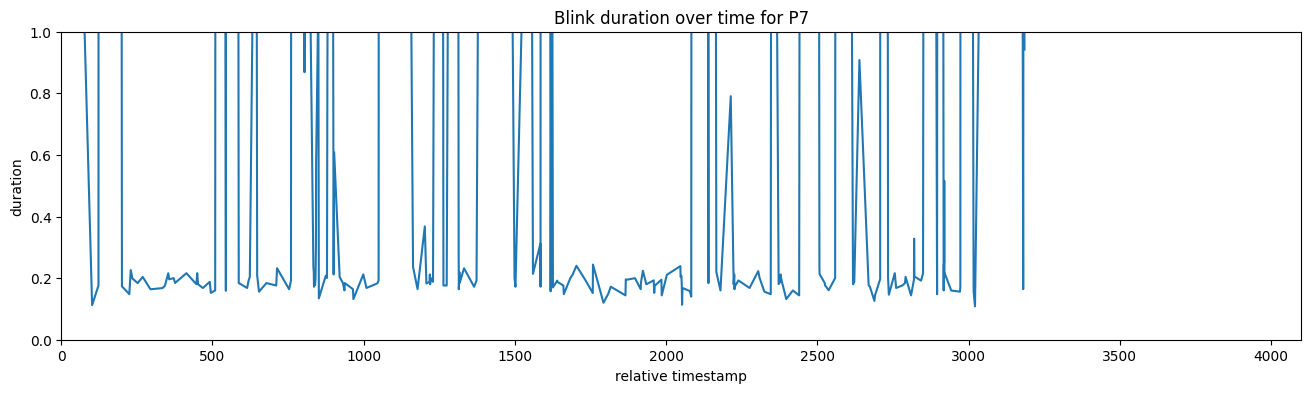

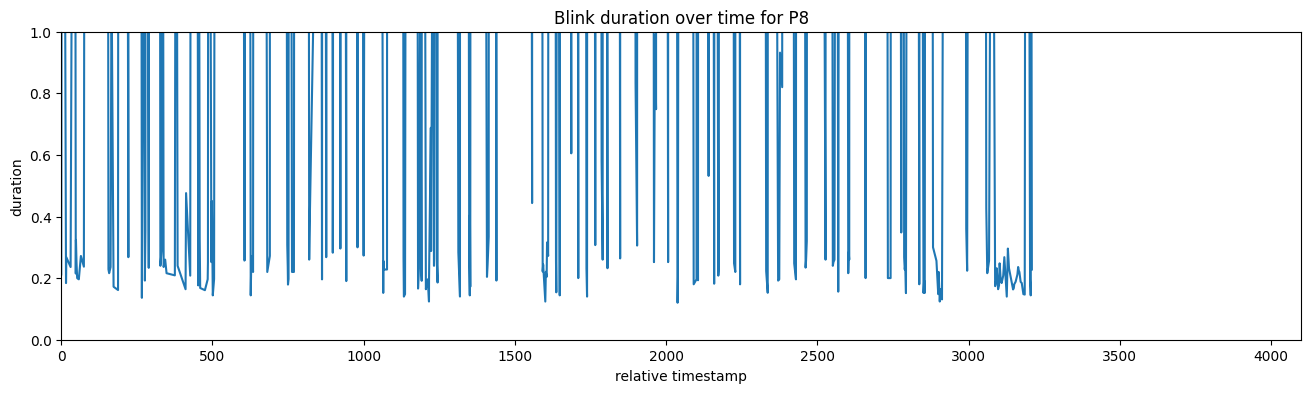

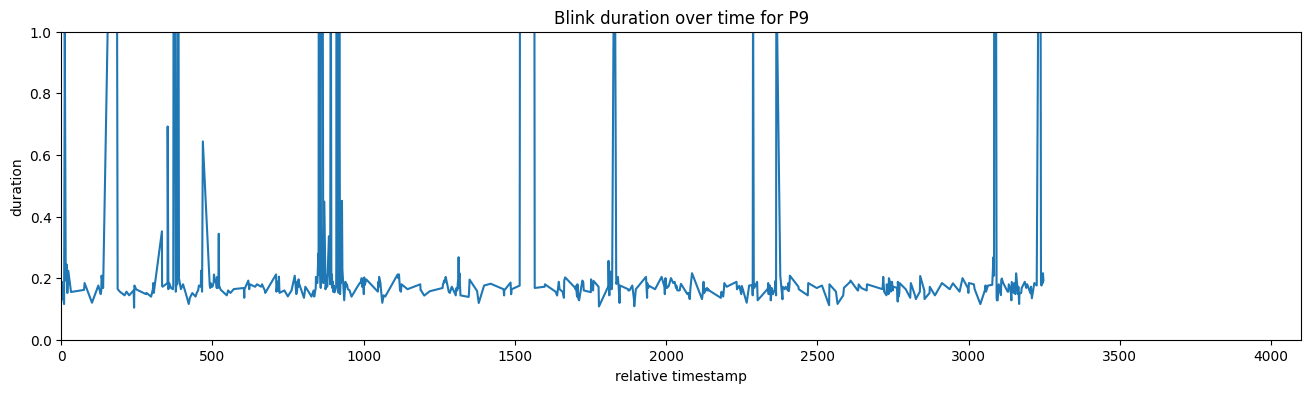

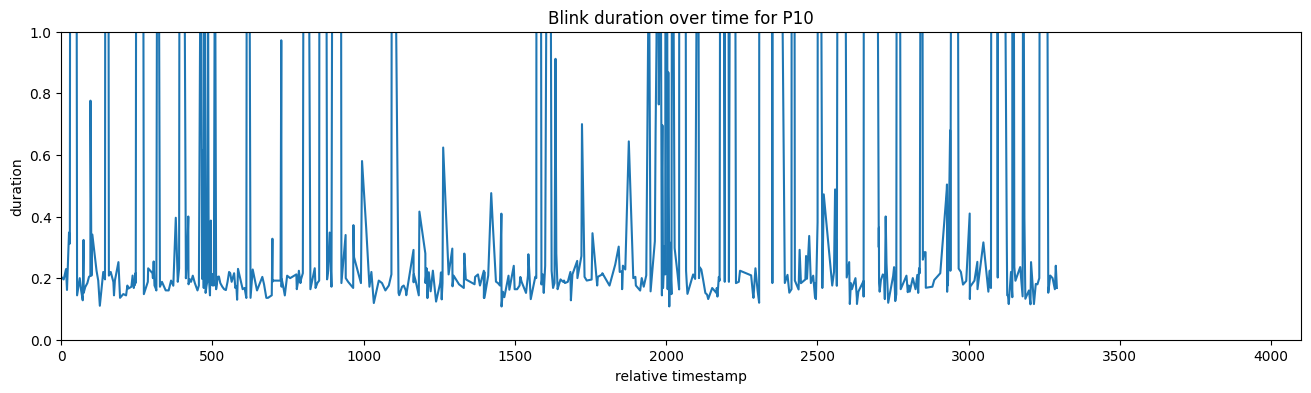

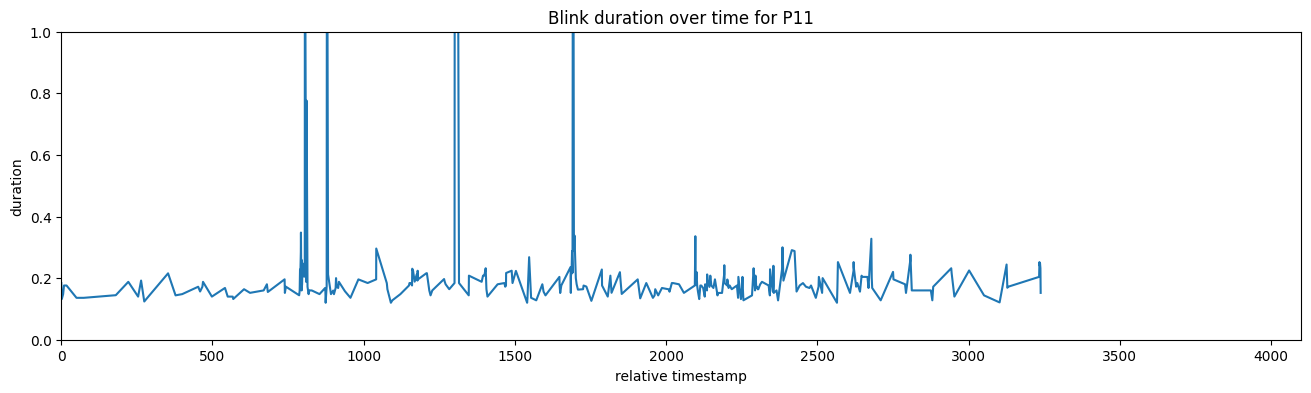

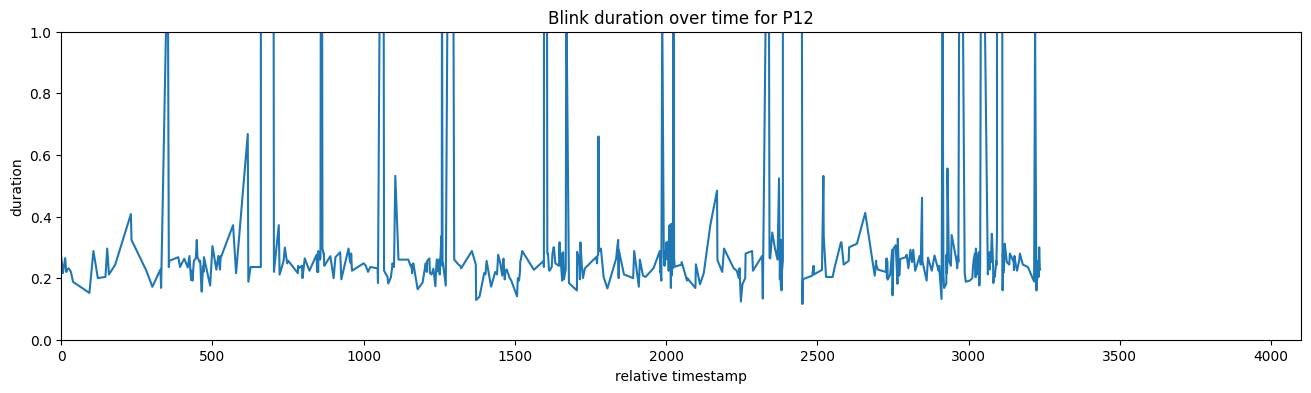

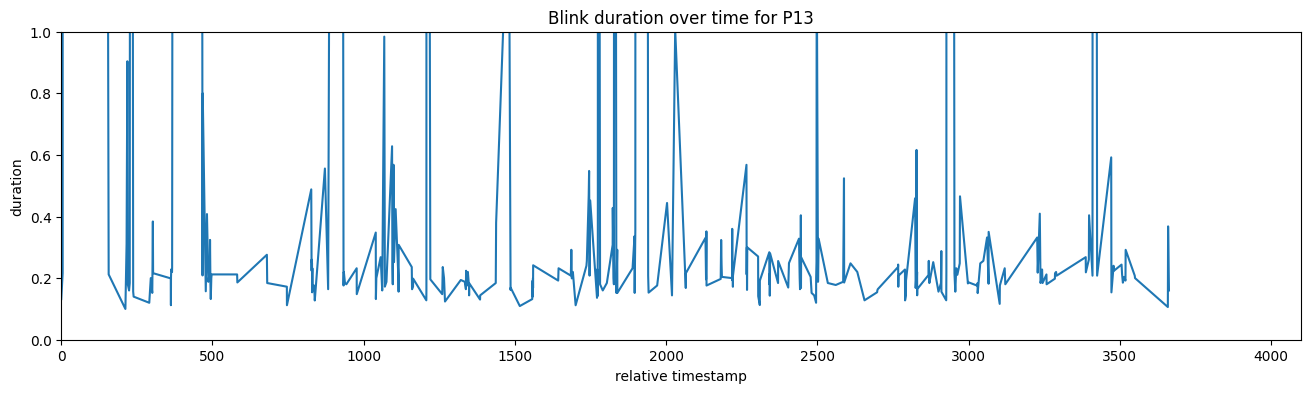

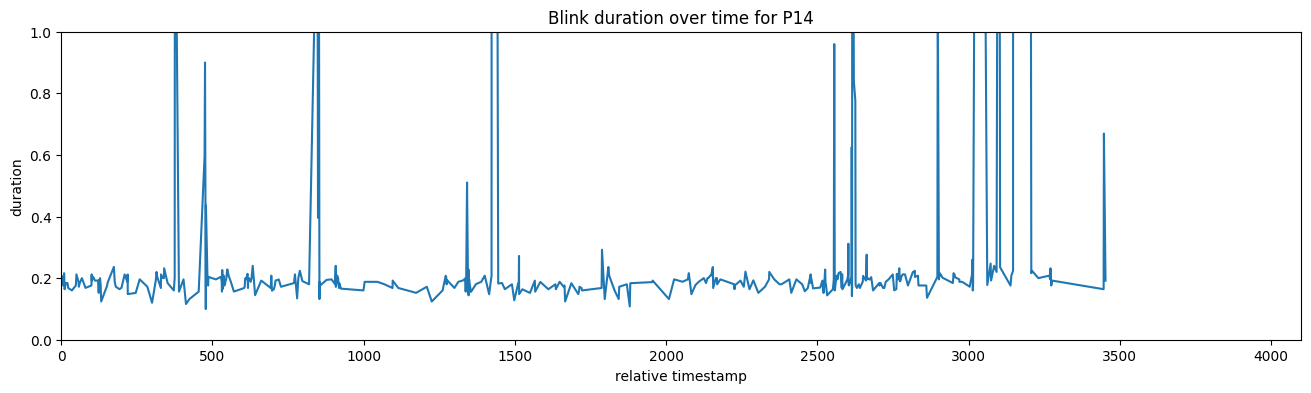

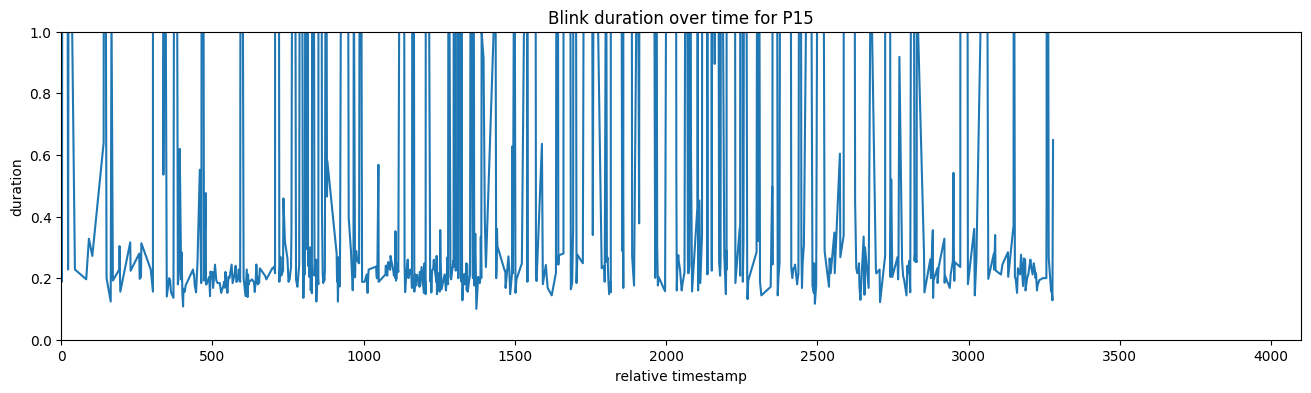

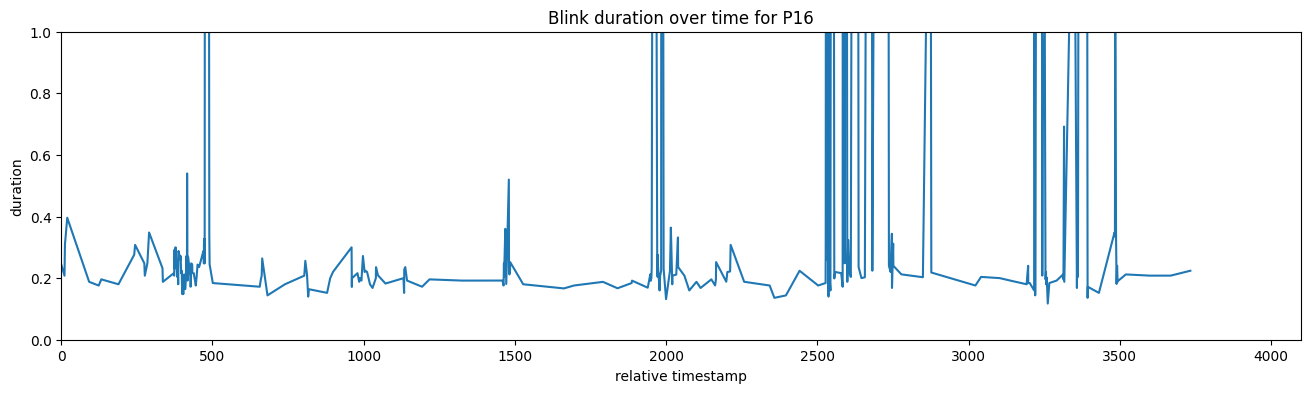

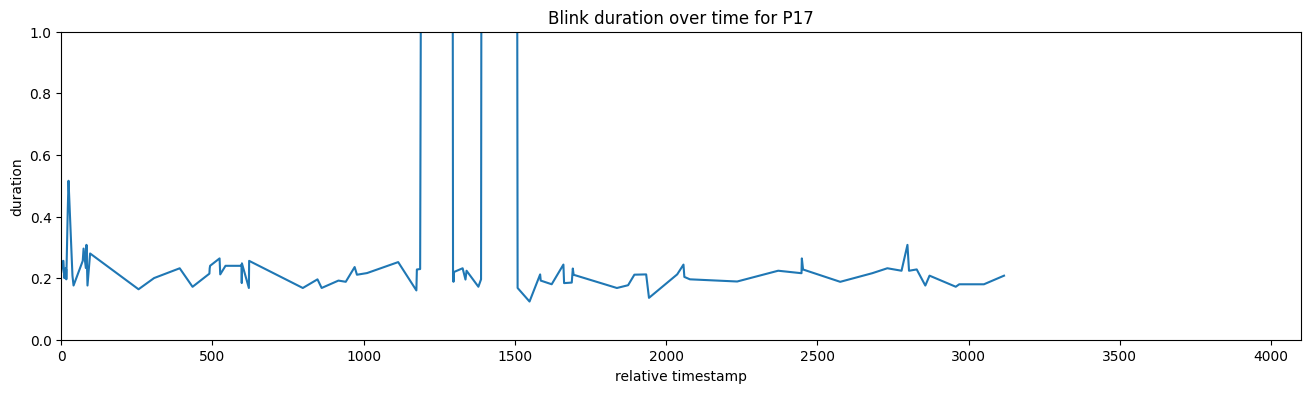

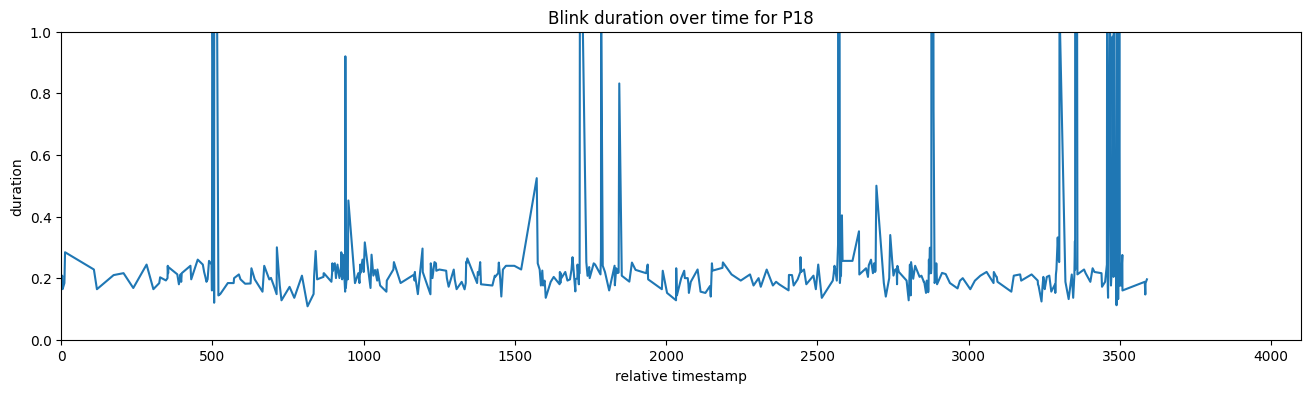

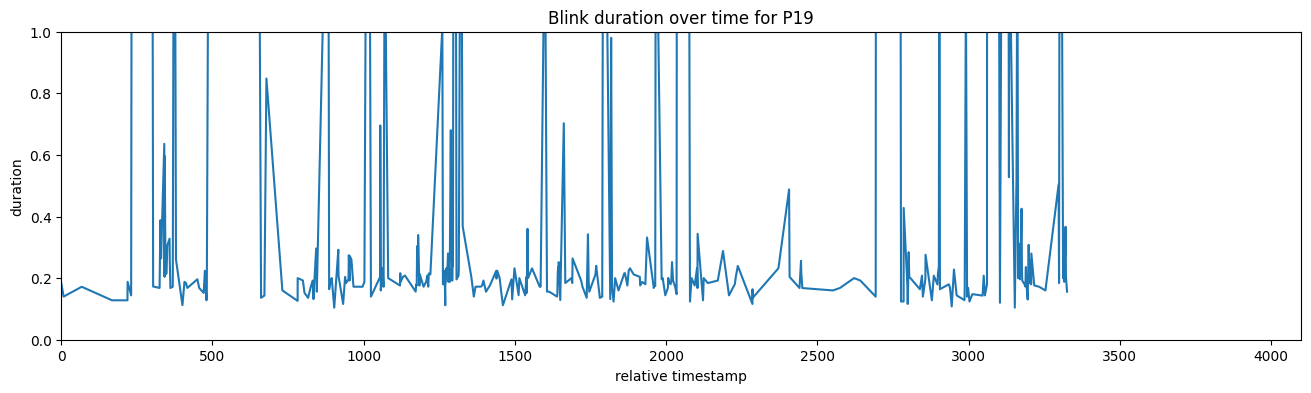

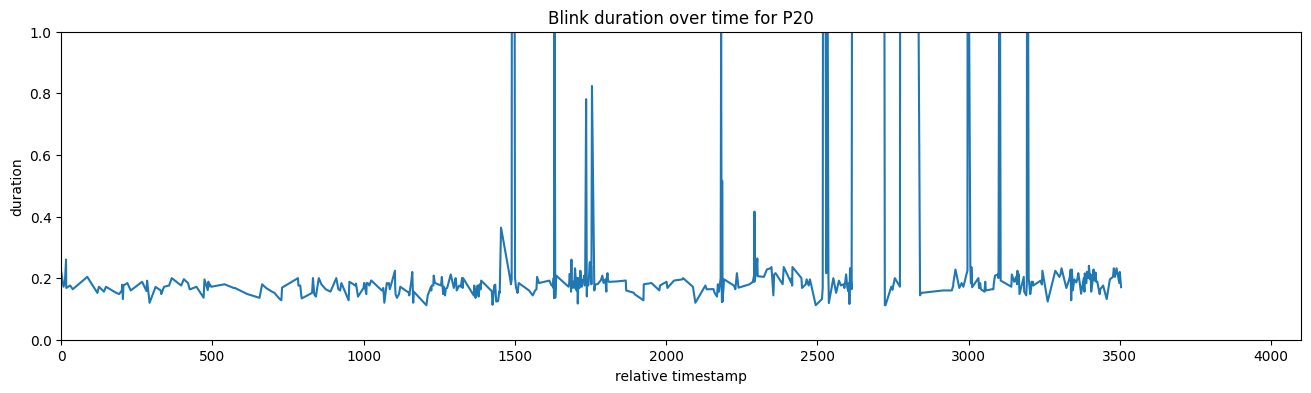

In [ ]:
for pid in participant_ids:
    participant_df = df[df['participant_id'] == pid]
    plt.figure(figsize=(16, 4))
    plt.plot(participant_df['relative_timestamp'], participant_df['duration'])
    plt.title(f'Blink duration over time for P{pid}')
    plt.xlabel('relative timestamp')
    plt.ylabel('duration')
    plt.xlim(0, 4100)
    plt.ylim(0, 1)
    plt.show()

##### Occurences
- Should be plotted with smaller time windows (ex. event-related)
- Visibly (too) longer fixations for P08
- Too large window size displays potential outliers

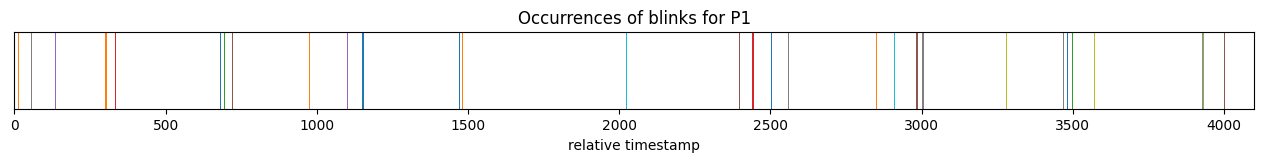

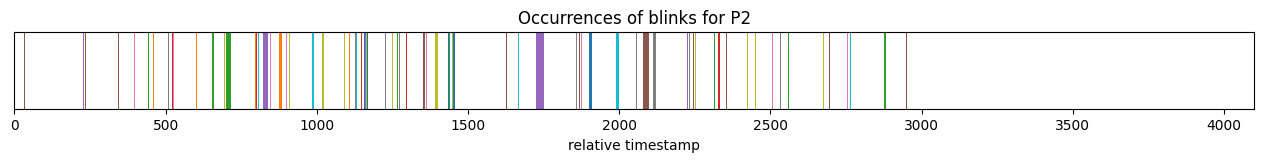

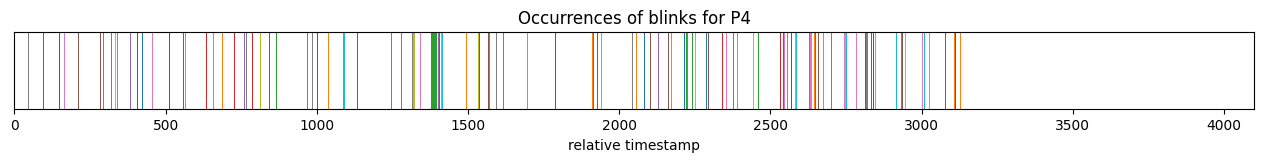

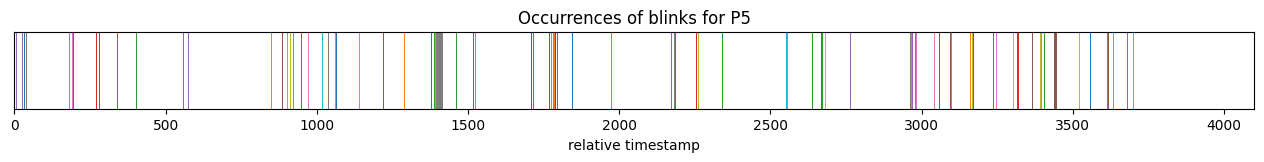

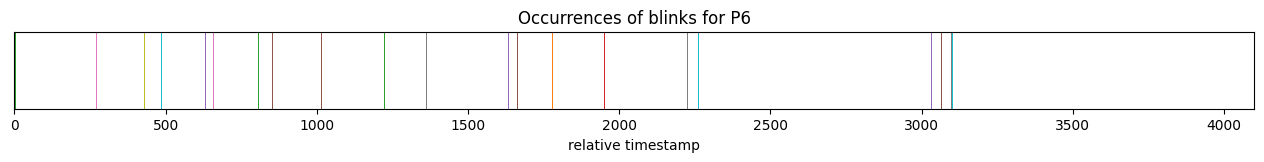

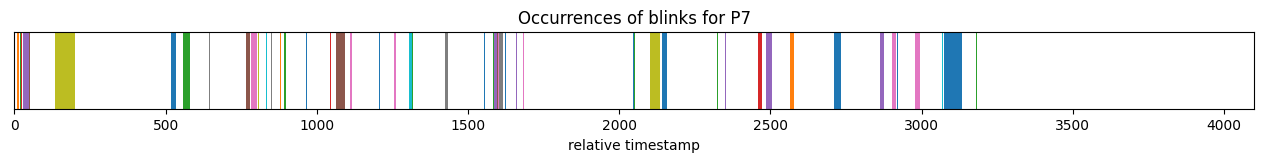

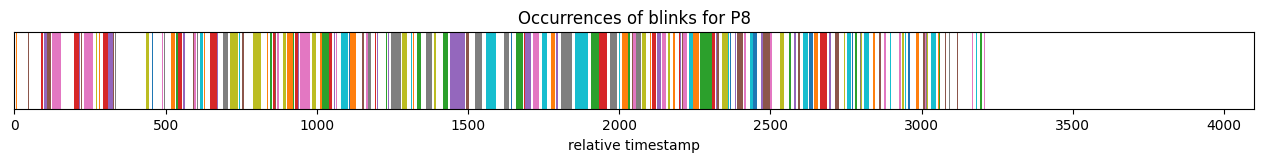

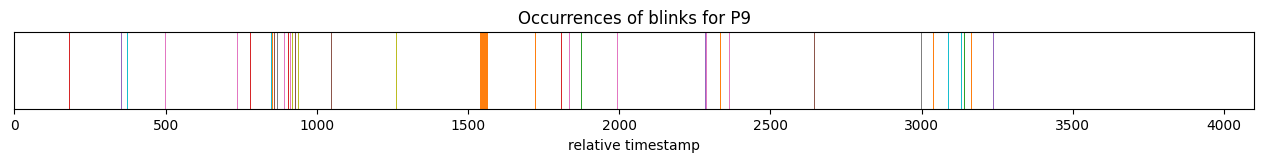

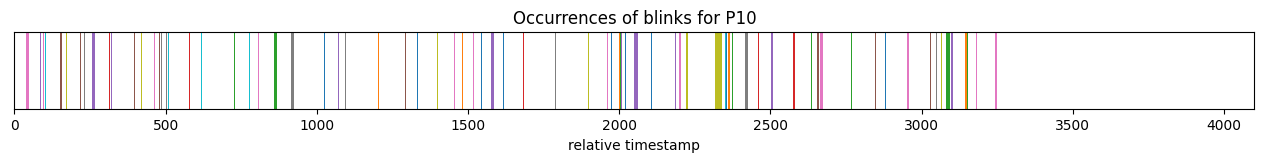

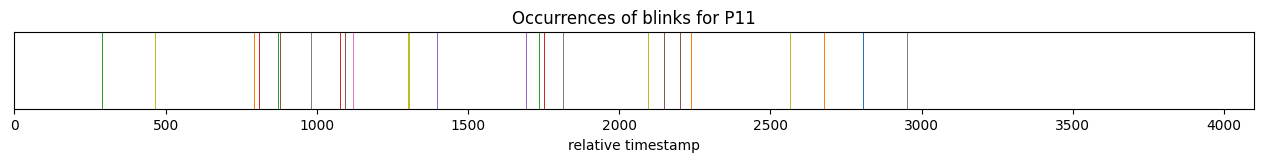

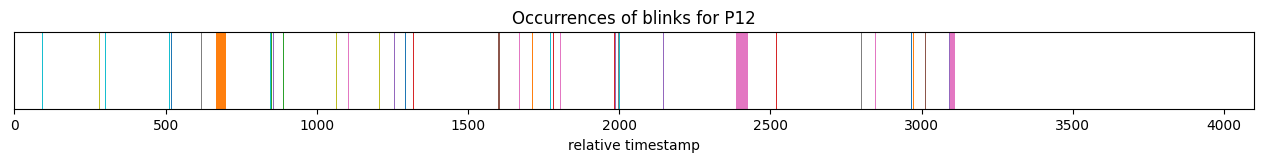

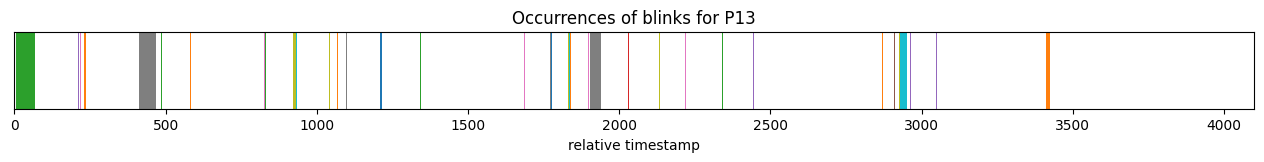

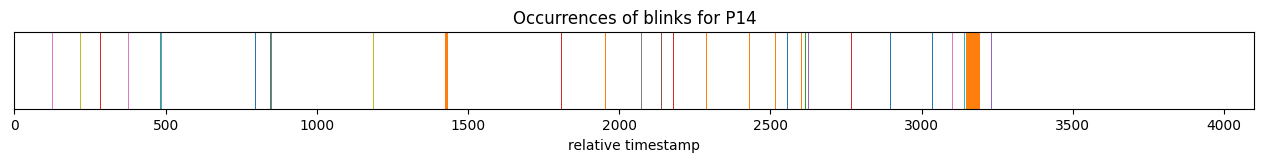

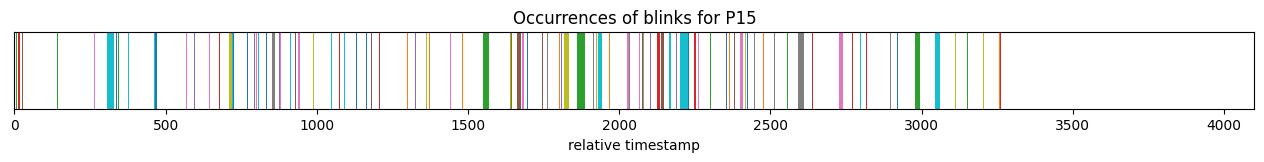

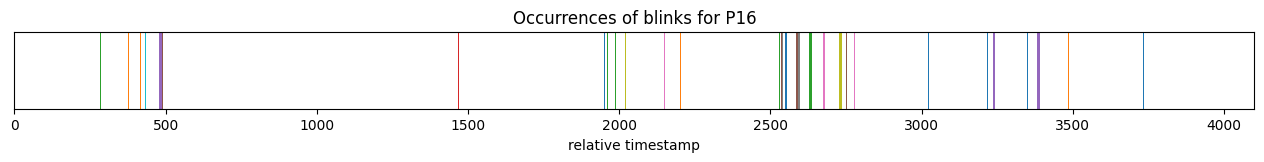

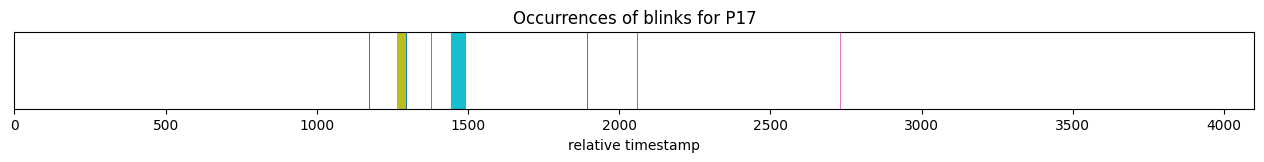

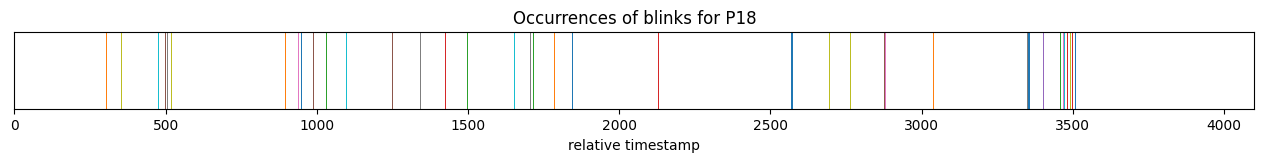

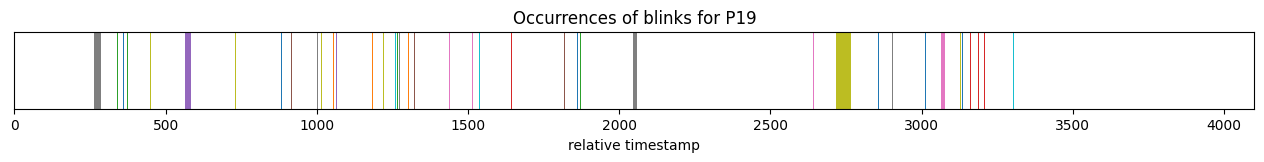

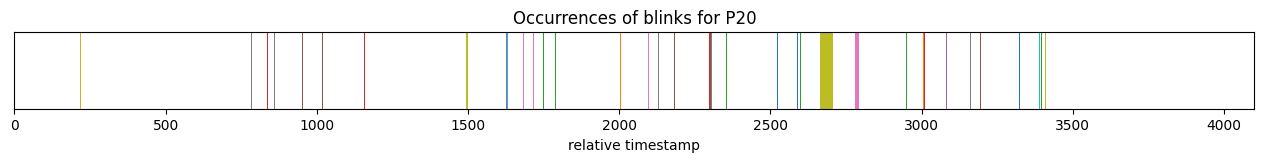

In [ ]:
for pid in participant_ids:
    participant_df = df[df['participant_id'] == pid]
    plt.figure(figsize=(16, 1))
    for _, row in participant_df.iterrows():
        start = row['relative_timestamp']
        duration = row['duration']
        plt.bar(start, 0.5, duration, align='edge')
    plt.title(f'Occurrences of blinks for P{pid}')
    plt.xlabel('relative timestamp')
    plt.xlim(0, 4100)
    plt.ylim(0, 0.5)
    plt.gca().get_yaxis().set_visible(False)
    plt.show()

### 4. Case-Specific Check-Ups

##### Long blinks frames
- two blinks, whose first slightly didn't make it to the offset_treshold
- change offset_threshold?

blink detection : 'it spikes the sharper the [pupil] confidence drop is and vice versa for confidence increases.'  
        --> blink events are then consolidated by combining detected onsets and offsets thresholds.  
filter response : array with filter responses of the blink-related timestamp points. If positive, pupil confidence decrease; if negative, pupil confidence is increasing again; magnitude is based on how much pupil confidence changes.

https://docs.pupil-labs.com/core/software/pupil-player  
https://github.com/pupil-labs/pupil/blob/634d13a4536b7b8d52e8ec55639291b899036e48/pupil_src/shared_modules/blink_detection.py

DEFAULT VALUES:
Filter length: 0.20 seconds  
Onset threshold: 0.50  
Offset threshold: 0.50  

Values are logged at 120Hz each eye (every ~0.008s, with some 'slips' up to every 0.012s)  
An average blink of 0.3s contains data of about 0.3*120*2 ~ 72 pupil timestamps

ASSUMPTION: Long blinks are instead 2 blinks in one detection, but the first one didn't properly make it to the offset threshold (close, but not past 0.5) although passing the onset one.  
Hence the algorithm waited until the next time the off_set threshold is past.
CHECK PUPIL CAMERAS (?)  

++ Some are caused by pupil confidence loss based on external factors --> high frequency flactuations

In case it is true --> Look at all the long blinks and check how much close to the offset_hreshold they get. Then change the offset_threshold (and the onset, too?) to a more adequate number (0.45?)

In [4]:
p1_ddf = df[df['participant_id'] == 1]

In [5]:
pp_ddf = data['all_pupil_positions'][['participant_id', 'pupil_timestamp', 'confidence', 'eye_id']]

In [6]:
pp_ts_diff = pp_ddf[(pp_ddf['participant_id'] == 13) & (pp_ddf['eye_id'] == 1)]['pupil_timestamp'].compute().diff()
pp_ts_diff = pp_ts_diff[pp_ts_diff > 0]

In [7]:
pp_ts_diff

68125    0.008077
68129    0.007966
68133    0.007929
68137    0.010364
68141    0.005828
           ...   
43826    0.008005
43830    0.012019
43834    0.008020
43838    0.007944
43842    0.008017
Name: pupil_timestamp, Length: 453933, dtype: float64

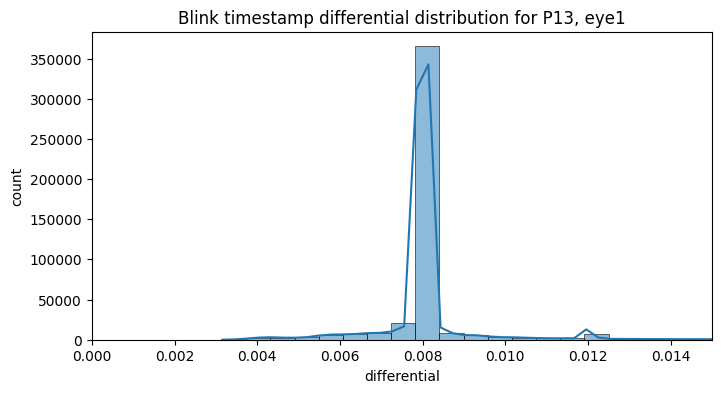

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(pp_ts_diff, bins=100, kde=True)
plt.title('Blink timestamp differential distribution for P13, eye1')
plt.xlabel('differential')
plt.ylabel('count')
plt.xlim(0, 0.015)
plt.show()

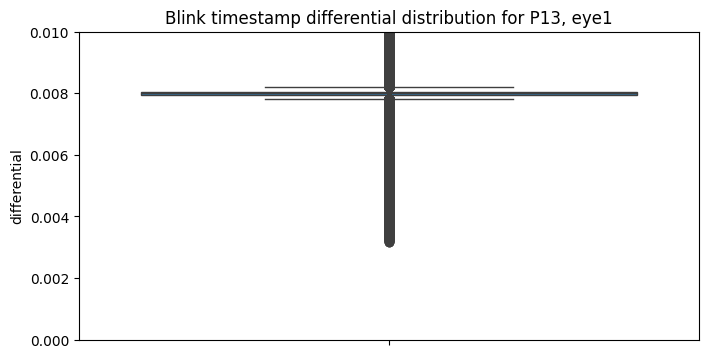

In [9]:
plt.figure(figsize=(8, 4))
sns.boxplot(pp_ts_diff)
plt.title('Blink timestamp differential distribution for P13, eye1')
plt.ylabel('differential')
plt.ylim(0, 0.01)
plt.show()

In [10]:
p1_ddf.head(1)

participant_id  id  start_timestamp  duration  end_timestamp  \
0               1   1   -672839.469037  0.247916 -672839.221121   

   start_frame_index  index  end_frame_index  confidence  \
0                 93     96              100     0.65211   

                                     filter_response  \
0  0.543644181950052 0.5880886263944963 0.6325330...   

                                           base_data  
0  -672839.469037 -672839.461 -672839.460985 -672...

In [11]:
# Normal blink
p1_ddf['filter_response'][1].split()

['0.5328988110790137',
 '0.5773432555234581',
 '0.6217876999679026',
 '0.6662321444123472',
 '0.7121891348662791',
 '0.7566335793107236',
 '0.8012129792673207',
 '0.8456574237117652',
 '0.8901018681562095',
 '0.934546312600654',
 '0.9792899397250165',
 '0.9817301962676462',
 '0.9372857518232017',
 '0.9646298294633114',
 '0.9861443357503563',
 '0.9180168260277721',
 '0.8749908025868814',
 '0.830546358142437',
 '0.8205934958195464',
 '0.7761490513751023',
 '0.7317046069306579',
 '0.6872601624862134',
 '0.6428157180417687',
 '0.5994253539246764',
 '0.5549809094802319',
 '0.5107525490922179',
 '0.4663081046477734',
 '0.395665023129301',
 '0.3512205786848566',
 '0.3067761342404121',
 '0.26233168979596766',
 '0.21788724535152332',
 '0.12944280090707883',
 '0.08499835646263443',
 '0.019386772805899448',
 '-0.024613227194100445',
 '-0.06249980967463702',
 '-0.06249980967463691',
 '-0.07407685384374509',
 '-0.1034459581762311',
 '-0.056079827619951624',
 '-0.0886273365425032',
 '-0.088627336542

In [12]:
# Anomalous blink
anomaly_ex = p1_ddf[p1_ddf['duration'] >= 5].iloc[1,:]
anomaly_ex['filter_response'].split()

['0.5221728689859554',
 '0.5248699977057091',
 '0.4884649986085207',
 '0.49689848363964867',
 '0.5013358358562889',
 '0.4671076805082531',
 '0.43486012657691075',
 '0.45489929220459124',
 '0.4249708755285997',
 '0.4701381905809418',
 '0.5022122143302298',
 '0.4708044024236273',
 '0.4413005642023951',
 '0.41201226432395677',
 '0.46849535207555715',
 '0.43725978964506945',
 '0.4069982545303573',
 '0.38047211071457493',
 '0.35220617884337274',
 '0.3209570980794499',
 '0.260654066616489',
 '0.31052221400140284',
 '0.2930272295335785',
 '0.26606847255692107',
 '0.24804997387129615',
 '0.2156705722022856',
 '0.16723451601631495',
 '0.16723451601631495',
 '0.14465541297032156',
 '0.12341367606335638',
 '0.09167518980628046',
 '0.09167518980628044',
 '0.03149209764676926',
 '0.03149209764676931',
 '-0.007403095449758297',
 '-0.04208801781337873',
 '-0.0420880178133787',
 '-0.07267349421758108',
 '-0.07267349421758114',
 '-0.1482480962664457',
 '-0.18568749429715237',
 '-0.1856874942971523',
 '

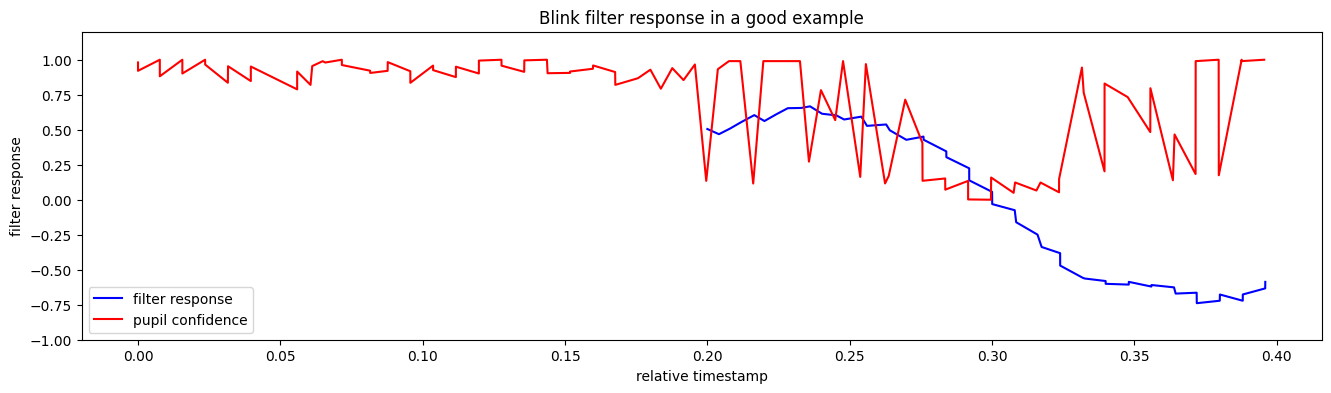

In [39]:
# Filter response
good_ex = p1_ddf.iloc[4,:]
x = good_ex['base_data'].split()
x = [float(num) for num in x]
x_rel = [(num - min(x) + 0.2) for num in x]
y = good_ex['filter_response'].split()
y = [float(num) for num in y]
start = min(x) - 0.2
end = max(x)

# Pupil
good_ex_pp = pp_ddf[(pp_ddf['pupil_timestamp'] >= start) & (pp_ddf['pupil_timestamp'] <= end)].compute()
good_ex_pp = good_ex_pp.groupby('pupil_timestamp', as_index=False).mean()
x_pp = good_ex_pp['pupil_timestamp']
x_rel_pp = [num - min(x_pp) for num in x_pp]
y_pp = good_ex_pp['confidence']

plt.figure(figsize=(16, 4))
plt.plot(x_rel, y, color='blue', label= 'filter response')
plt.plot(x_rel_pp, y_pp, color='red', label = 'pupil confidence')
plt.title(f'Blink filter response in a good example')
plt.xlabel('relative timestamp')
plt.ylabel('filter response')
plt.ylim(-1, 1.2)
# plt.xlim(-0.2,6.2)
plt.legend(loc='lower left')
plt.show()

In [14]:
display(len(p1_ddf[p1_ddf['duration'] >= 5].iloc[1,:]['filter_response'].split()))
display(len(p1_ddf[p1_ddf['duration'] >= 5].iloc[1,:]['base_data'].split()))

1607

1607

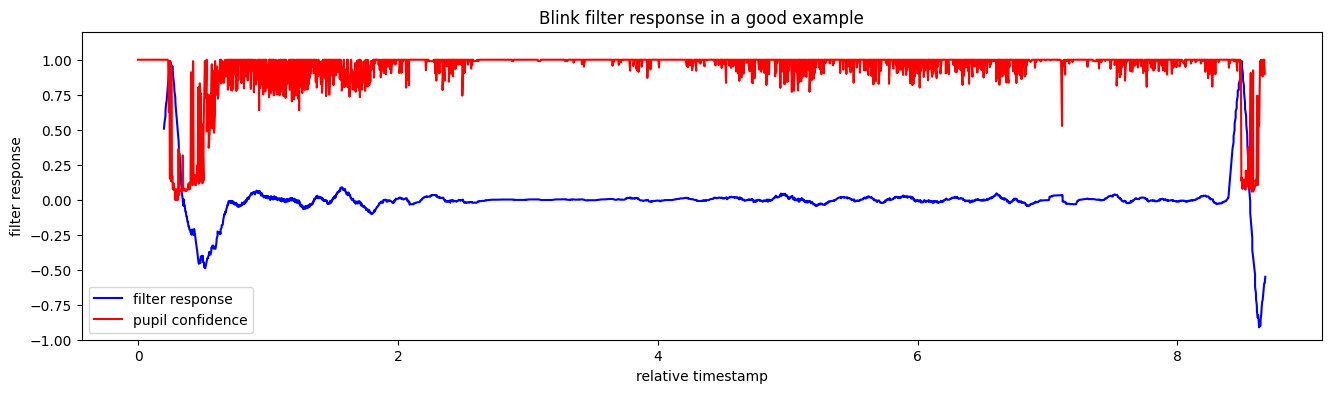

In [15]:
# Filter response
anomaly_ex = p1_ddf[p1_ddf['duration'] >= 5].iloc[2,:]
x = anomaly_ex['base_data'].split()
x = [float(num) for num in x]
x_rel = [(num - min(x) + 0.2) for num in x]
y = anomaly_ex['filter_response'].split()
y = [float(num) for num in y]
start = min(x) - 0.2
end = max(x)

# Pupil
anomaly_ex_pp = pp_ddf[(pp_ddf['pupil_timestamp'] >= start) & (pp_ddf['pupil_timestamp'] <= end) & (pp_ddf['participant_id'] == 1)].compute()
anomaly_ex_pp = anomaly_ex_pp.groupby('pupil_timestamp', as_index=False).mean()
x_pp = anomaly_ex_pp['pupil_timestamp']
x_rel_pp = [num - min(x_pp) for num in x_pp]
y_pp = anomaly_ex_pp['confidence']

plt.figure(figsize=(16, 4))
plt.plot(x_rel, y, color='blue', label= 'filter response')
plt.plot(x_rel_pp, y_pp, color='red', label = 'pupil confidence')
plt.title(f'Blink filter response in a good example')
plt.xlabel('relative timestamp')
plt.ylabel('filter response')
plt.ylim(-1, 1.2)
# plt.xlim(-0.2,6.2)
plt.legend(loc='lower left')
plt.show()

In [51]:
anomaly_ex = p1_ddf[p1_ddf['duration'] >= 5].iloc[2,:]
anomaly_ex['timestamp'] = [float(num) for num in anomaly_ex['base_data'].split()]
anomaly_ex['relative_timestamp'] = [ts - min(anomaly_ex['timestamp']) for ts in anomaly_ex['timestamp']]
anomaly_ex = pd.DataFrame({
    'timestamp': anomaly_ex['timestamp'],
    'relative_timestamp': anomaly_ex['relative_timestamp'],
    'filter_response': [float(num) for num in anomaly_ex['filter_response'].split()]
})
anomaly_ex_blink1 = anomaly_ex[anomaly_ex['relative_timestamp'] <= .5]
anomaly_ex_blink1['filter_response'].min()

-0.48920546557914585

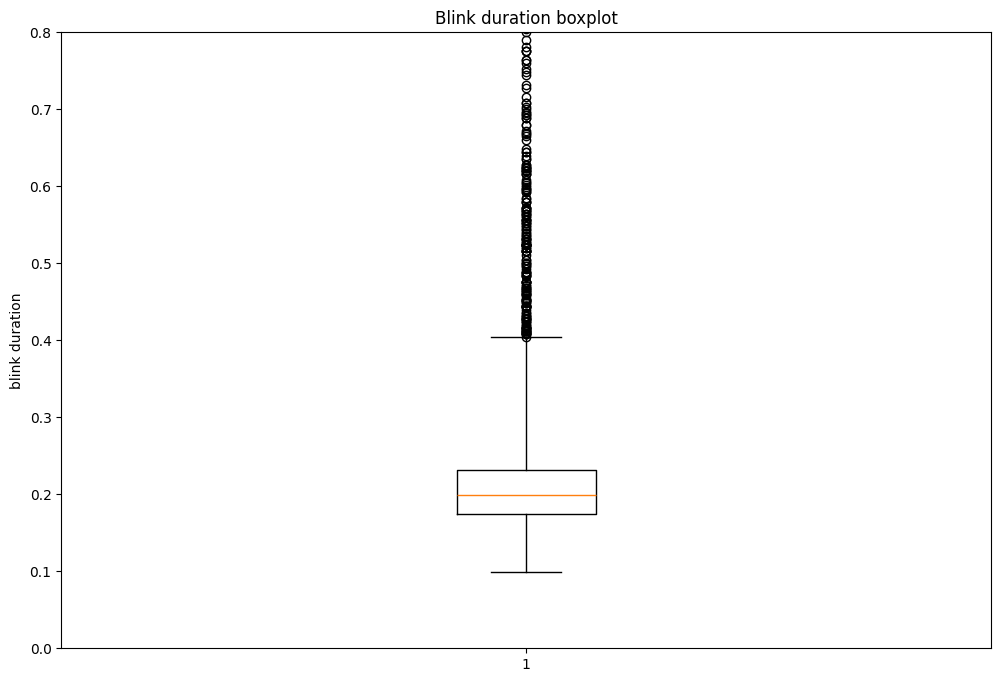

In [ ]:
plt.figure(figsize=(12, 8))
plt.boxplot(ddf['duration'], whis = 3)
plt.title(f'Blink duration boxplot')
plt.ylabel('blink duration')
plt.ylim(0, 0.8)
plt.show()

In [ ]:
len(df[df['duration'] > 60])

2

In [ ]:
display(len(df[df['duration'] >= 60].iloc[1,:]['filter_response'].split()))
display(len(df[df['duration'] >= 60].iloc[1,:]['base_data'].split()))

15664

15664

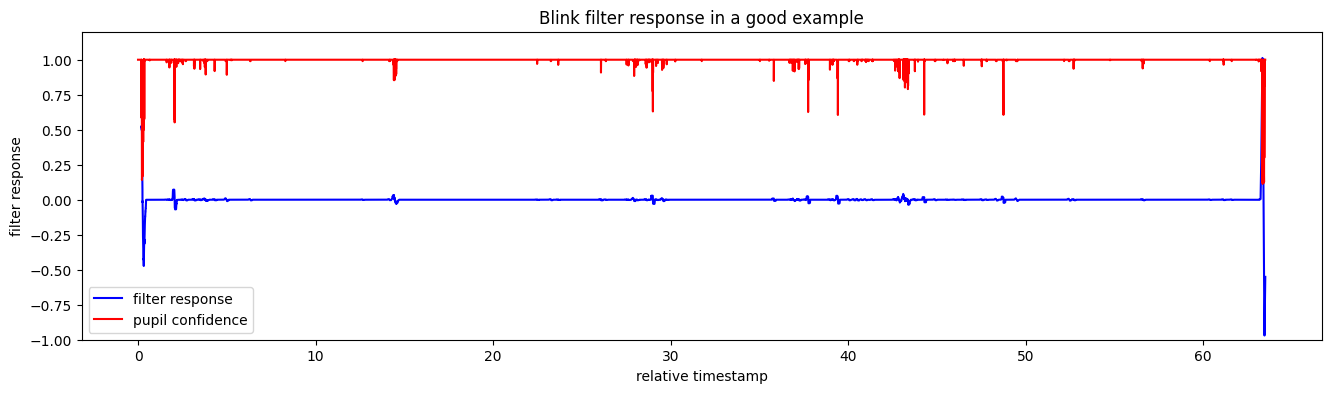

In [ ]:
# Filter response
very_anomaly_ex = df[df['duration'] >= 60].iloc[1,:]
x = very_anomaly_ex['base_data'].split()
x = [float(num) for num in x]
x_rel = [(num - min(x) + 0.2) for num in x]
y = very_anomaly_ex['filter_response'].split()
y = [float(num) for num in y]
start = min(x) - 0.2
end = max(x)

# Pupil
anomaly_ex_pp = pp_ddf[(pp_ddf['pupil_timestamp'] >= start) & (pp_ddf['pupil_timestamp'] <= end)].compute()
anomaly_ex_pp = anomaly_ex_pp.groupby('pupil_timestamp', as_index=False).mean()
x_pp = anomaly_ex_pp['pupil_timestamp']
x_rel_pp = [num - min(x_pp) for num in x_pp]
y_pp = anomaly_ex_pp['confidence']

plt.figure(figsize=(16, 4))
plt.plot(x_rel, y, color='blue', label= 'filter response')
plt.plot(x_rel_pp, y_pp, color='red', label = 'pupil confidence')
plt.title(f'Blink filter response in a good example')
plt.xlabel('relative timestamp')
plt.ylabel('filter response')
plt.ylim(-1, 1.2)
# plt.xlim(-0.2,6.2)
plt.legend(loc='lower left')
plt.show()

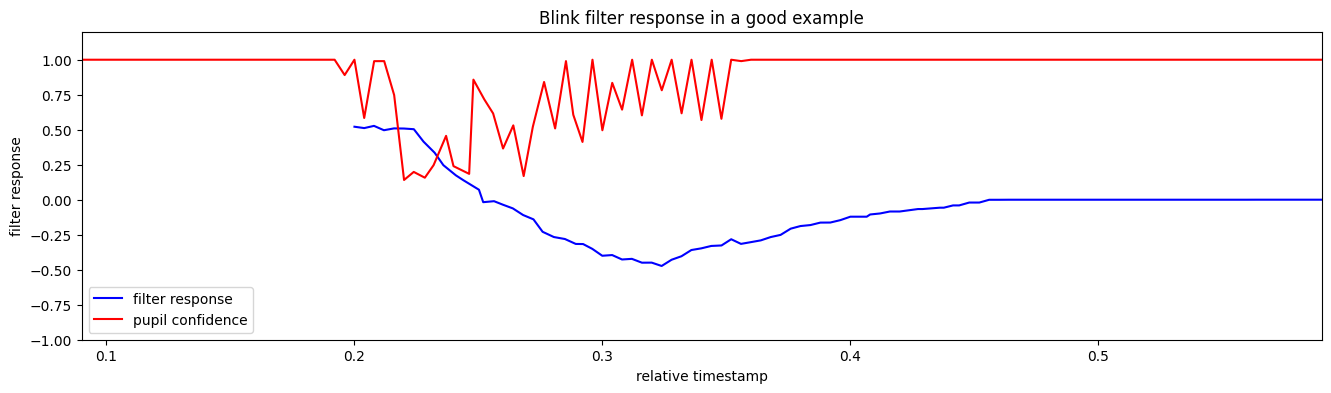

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(x_rel, y, color='blue', label= 'filter response')
plt.plot(x_rel_pp, y_pp, color='red', label = 'pupil confidence')
plt.title(f'Blink filter response in a good example')
plt.xlabel('relative timestamp')
plt.ylabel('filter response')
plt.ylim(-1, 1.2)
plt.xlim(0.09,.59)
plt.legend(loc='lower left')
plt.show()

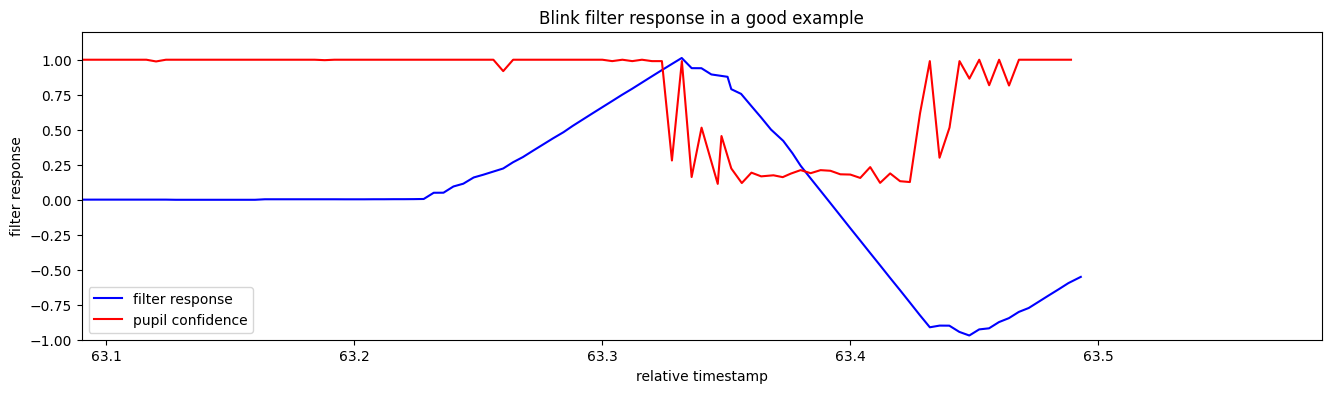

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(x_rel, y, color='blue', label= 'filter response')
plt.plot(x_rel_pp, y_pp, color='red', label = 'pupil confidence')
plt.title(f'Blink filter response in a good example')
plt.xlabel('relative timestamp')
plt.ylabel('filter response')
plt.ylim(-1, 1.2)
plt.xlim(63.09,63.59)
plt.legend(loc='lower left')
plt.show()

In [55]:
p1_ddf.head()

participant_id  id  start_timestamp  duration  end_timestamp  \
0               1   1   -672839.469037  0.247916 -672839.221121   
1               1   2   -672825.921111  0.264075 -672825.657036   
2               1   3   -672824.491118  0.569989 -672823.921129   
3               1   4   -672814.665124  0.243734 -672814.421390   
4               1   5   -672811.529058  0.204014 -672811.325044   

   start_frame_index  index  end_frame_index  confidence  \
0                 93     96              100    0.652110   
1                484    487              491    0.471345   
2                526    534              543    0.268321   
3                803    806              809    0.636428   
4                884    887              890    0.505138   

                                     filter_response  \
0  0.543644181950052 0.5880886263944963 0.6325330...   
1  0.5328988110790137 0.5773432555234581 0.621787...   
2  0.5450027240248031 0.5005582795803586 0.522338...   
3  0.5131102095020842 0.5575546539465286 0.601999...   
4  0.5051881264661553 0.4680740413746704 0.508370...   

                                           base_data  
0  -672839.469037 -672839.461 -672839.460985 -672...  
1  -672825.921111 -672825.9210890001 -672825.9131...  
2  -672824.491118 -672824.485088 -672824.484739 -...  
3  -672814.665124 -672814.665115 -672814.657122 -...  
4  -672811.529058 -672811.524979 -672811.521075 -...

In [102]:
offset = 1

In [103]:
# Function to calculate early minimum filter response
def calculate_early_minima(row):
    timestamps = [float(num) for num in row['base_data'].split()]
    relative_timestamps = [ts - min(timestamps) for ts in timestamps]
    filter_responses = [float(num) for num in row['filter_response'].split()]
    
    early_minimum = min([fr for rt, fr in zip(relative_timestamps, filter_responses) if rt <= offset])
    return early_minimum

In [104]:
# Check minima within the first [offset] for long blinks (>[offset]s)
long_blinks = ddf[ddf['duration'] >= offset][['participant_id', 'id', 'duration', 'confidence', 'filter_response', 'base_data']].compute()
early_minima = [calculate_early_minima(row) for idx, row in long_blinks.iterrows()]
long_blinks['early_minima'] = early_minima

In [105]:
len(long_blinks)

557

In [11]:
(557/len(ddf))*100

6.37445639734493

In [106]:
len(long_blinks[long_blinks['early_minima'] <= -.5])

10

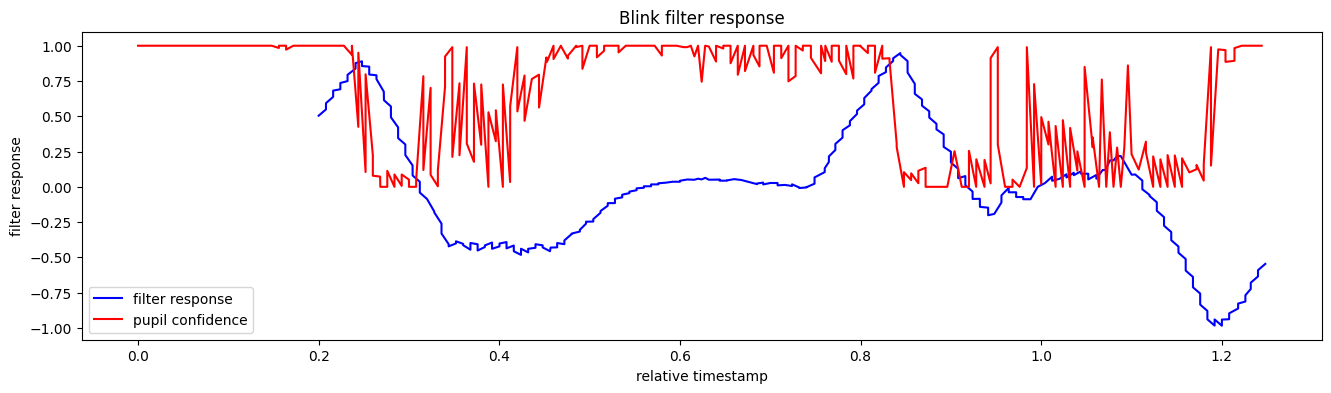

In [107]:
a = long_blinks[long_blinks['early_minima'] <= -.5].iloc[1,:]
x = a['base_data'].split()
x = [float(num) for num in x]
x_rel = [(num - min(x) + 0.2) for num in x]
y = a['filter_response'].split()
y = [float(num) for num in y]
start = min(x) - 0.2
end = max(x)

# Pupil
a_pp = pp_ddf[(pp_ddf['pupil_timestamp'] >= start) & (pp_ddf['pupil_timestamp'] <= end)].compute()
a_pp = a_pp.groupby('pupil_timestamp', as_index=False).mean()
x_pp = a_pp['pupil_timestamp']
x_rel_pp = [num - min(x_pp) for num in x_pp]
y_pp = a_pp['confidence']

plt.figure(figsize=(16, 4))
plt.plot(x_rel, y, color='blue', label= 'filter response')
plt.plot(x_rel_pp, y_pp, color='red', label = 'pupil confidence')
plt.title(f'Blink filter response')
plt.xlabel('relative timestamp')
plt.ylabel('filter response')
plt.legend(loc='lower left')
plt.show()

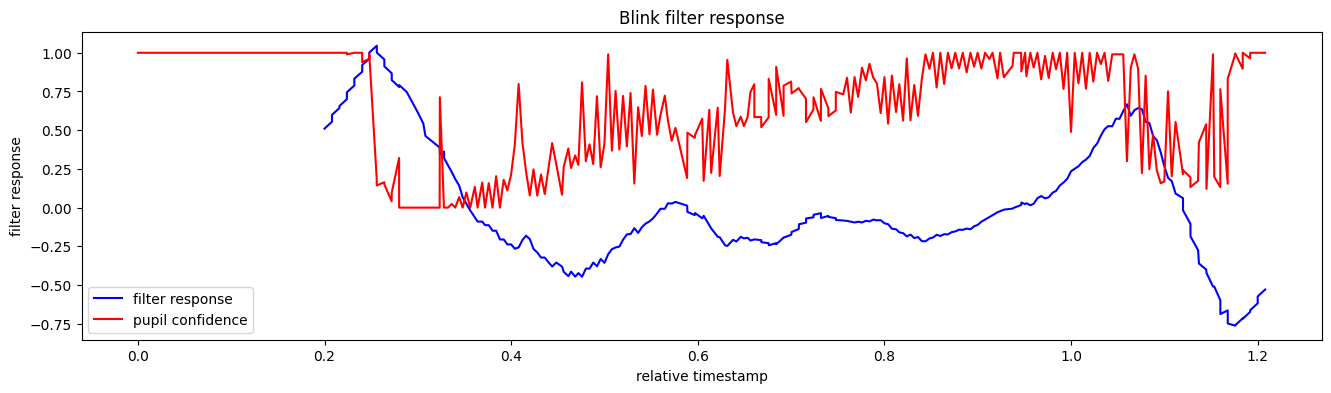

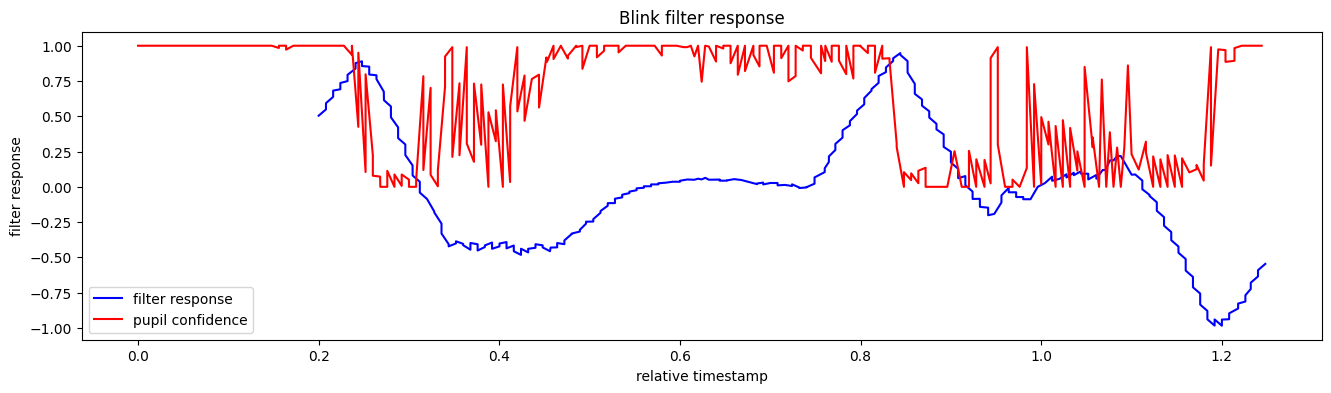

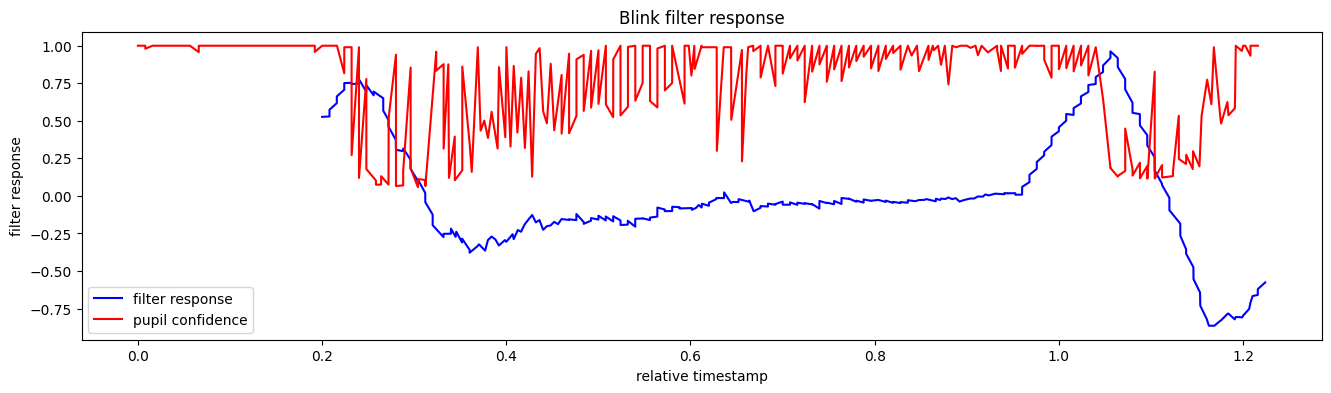

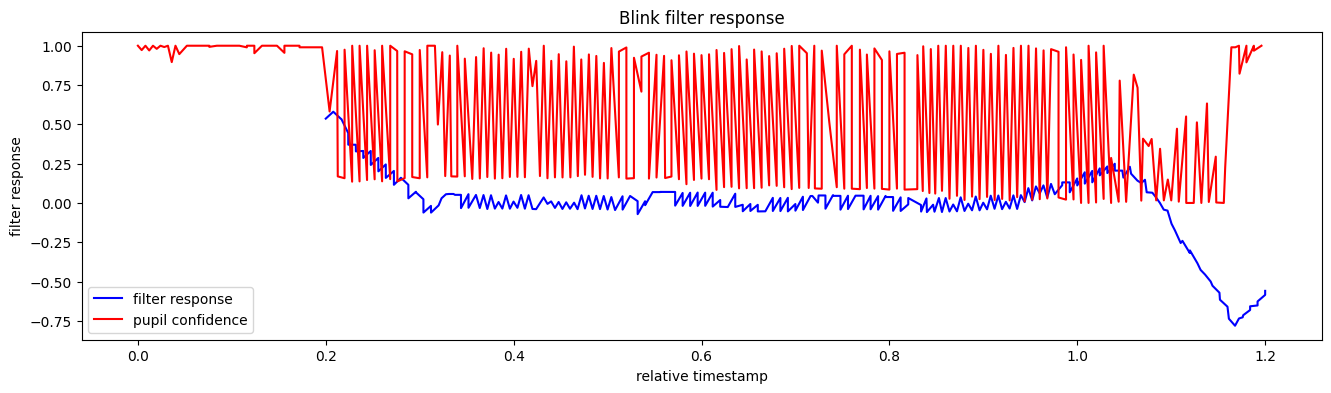

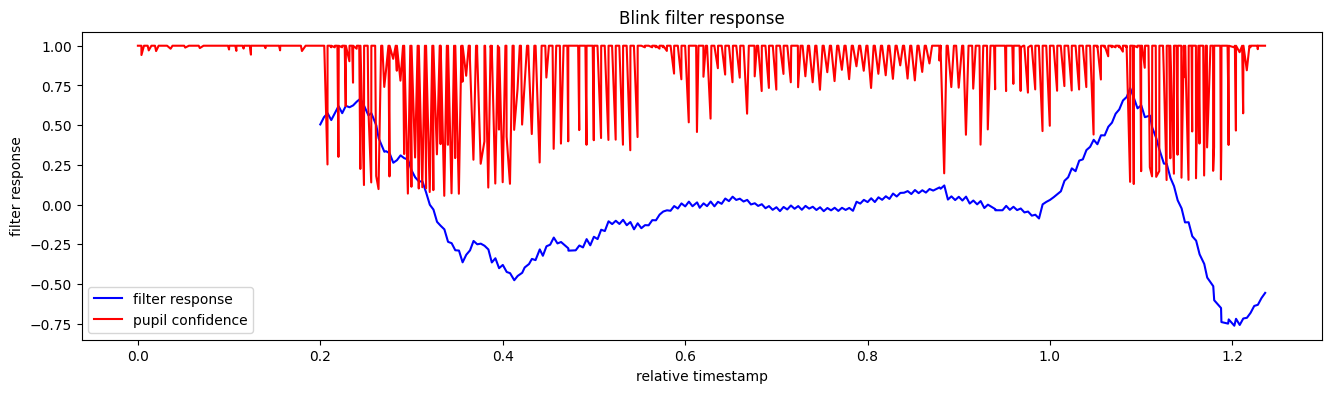

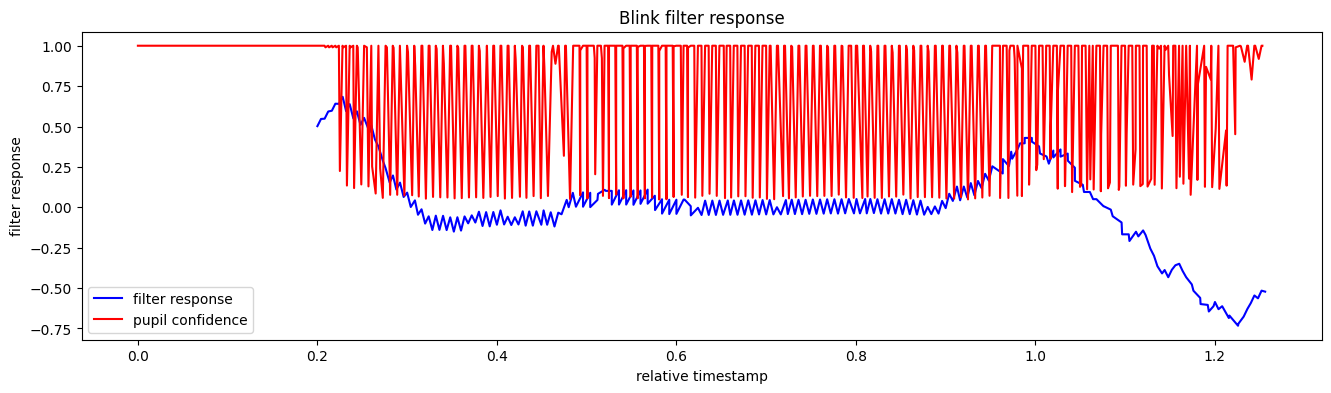

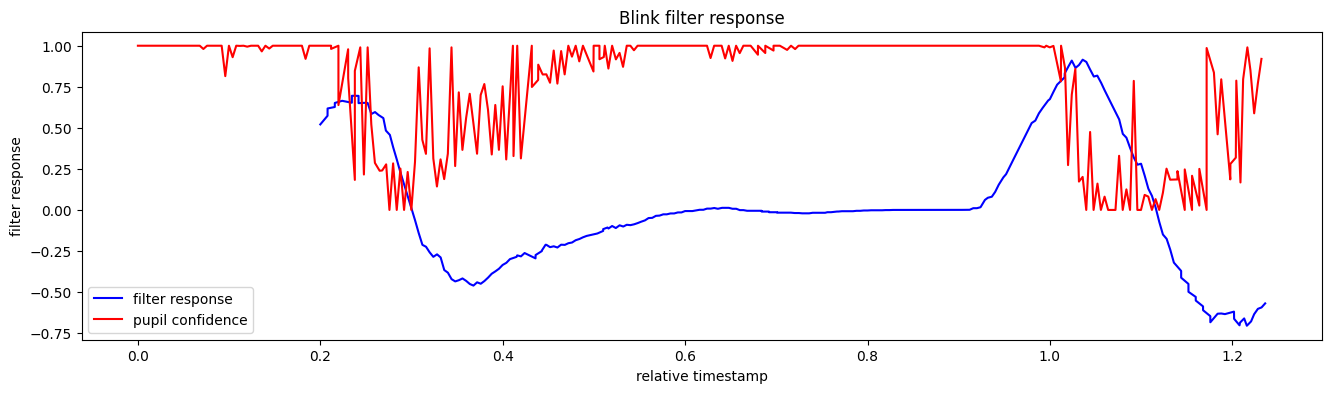

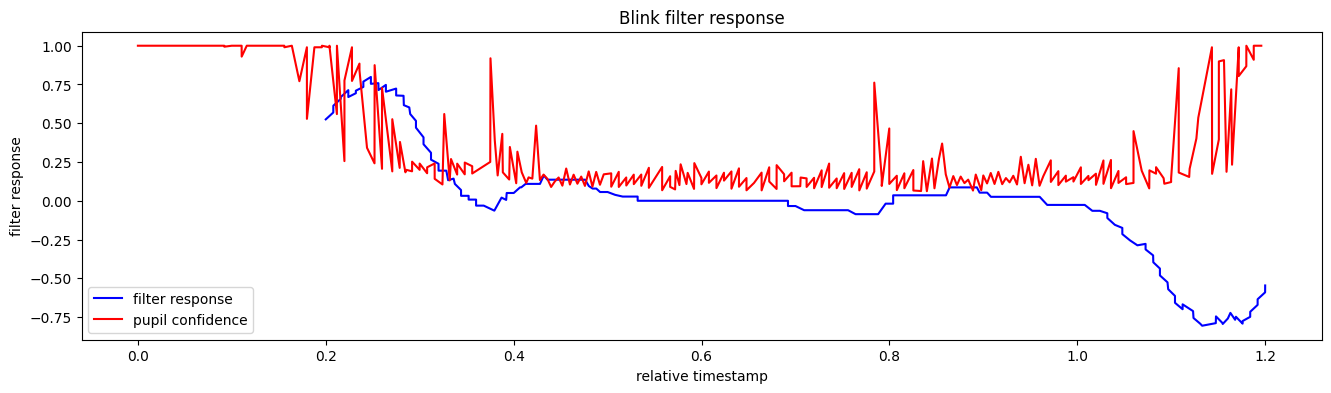

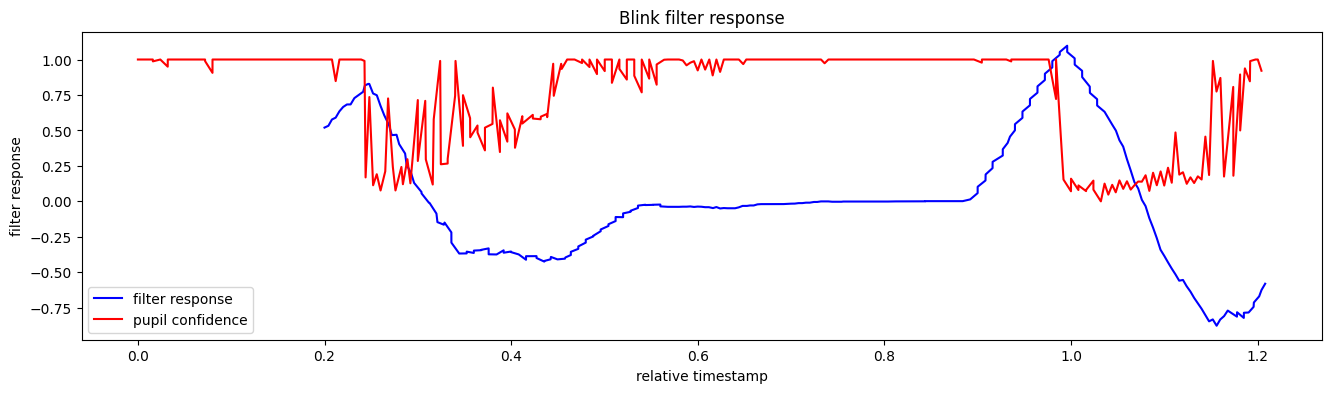

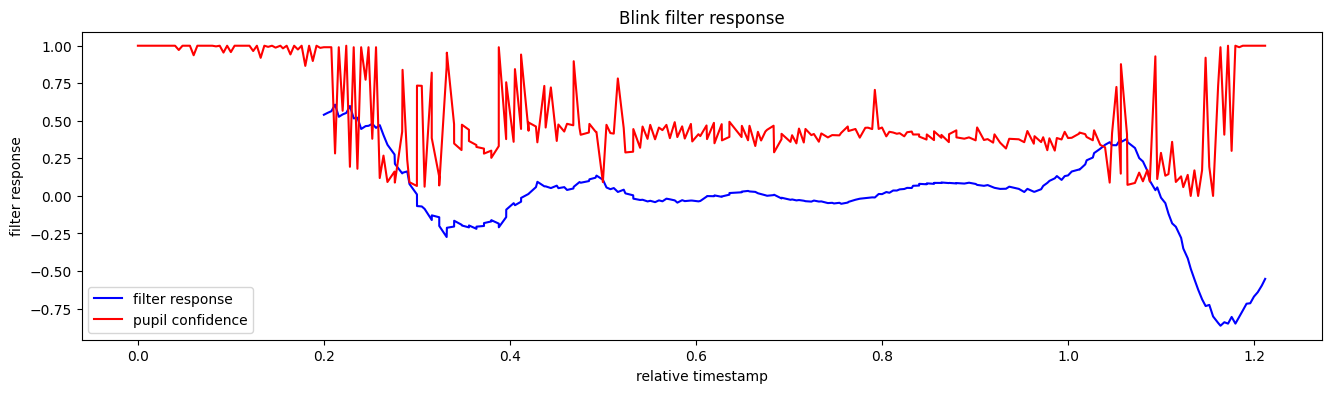

In [110]:
for idx, a in long_blinks[long_blinks['early_minima'] <= -0.5].iterrows():
    x = a['base_data'].split()
    x = [float(num) for num in x]
    x_rel = [(num - min(x) + 0.2) for num in x]
    y = a['filter_response'].split()
    y = [float(num) for num in y]
    start = min(x) - 0.2
    end = max(x)

    # Pupil
    a_pp = pp_ddf[(pp_ddf['pupil_timestamp'] >= start) & (pp_ddf['pupil_timestamp'] <= end)].compute()
    a_pp = a_pp.groupby('pupil_timestamp', as_index=False).mean()
    x_pp = a_pp['pupil_timestamp']
    x_rel_pp = [num - min(x_pp) for num in x_pp]
    y_pp = a_pp['confidence']

    plt.figure(figsize=(16, 4))
    plt.plot(x_rel, y, color='blue', label= 'filter response')
    plt.plot(x_rel_pp, y_pp, color='red', label = 'pupil confidence')
    plt.title(f'Blink filter response')
    plt.xlabel('relative timestamp')
    plt.ylabel('filter response')
    plt.legend(loc='lower left')
    plt.show()

These are all long blinks which are slightly longer than the offset (1s).